In [ ]:
import random
import math

class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.wins = 0
        self.visits = 0
        self.untried_actions = self.state.get_legal_actions()

    def UCB1(self, explore_param=1.414):
        "Upper Confidence Bound for tree selection"
        if self.visits == 0:
            return float('inf')  # to ensure unvisited nodes are selected
        return self.wins / self.visits + explore_param * math.sqrt(math.log(self.parent.visits) / self.visits)

    def expand(self):
        "Expand tree by creating a new child"
        action = self.untried_actions.pop()
        next_state = self.state.move(action)
        child_node = Node(next_state, parent=self)
        self.children.append(child_node)
        return child_node

    def simulate(self):
        "Simulate a random playout from this node"
        current_simulation_state = self.state
        while not current_simulation_state.is_game_over():
            possible_moves = current_simulation_state.get_legal_actions()
            action = random.choice(possible_moves)
            current_simulation_state = current_simulation_state.move(action)
        return current_simulation_state.get_result()

    def backpropagate(self, result):
        "Update this node and its parent nodes with the simulation result"
        self.visits += 1
        if result == self.state.current_player():
            self.wins += 1
        if self.parent:
            self.parent.backpropagate(result)

def mcts(root, iterations):
    for _ in range(iterations):
        node = root
        # Selection
        while node.untried_actions == [] and node.children != []:
            node = max(node.children, key=lambda x: x.UCB1())
        
        # Expansion
        if node.untried_actions != []:
            node = node.expand()

        # Simulation
        result = node.simulate()

        # Backpropagation
        node.backpropagate(result)

# Define game-specific logic (TicTacToe in this case) and run MCTS
# You would need to implement game-specific classes and methods:
# - GameState.get_legal_actions()
# - GameState.move(action)
# - GameState.is_game_over()
# - GameState.get_result()
# - GameState.current_player()

# Start MCTS from a particular game state
# initial_state = TicTacToeGameState()
# root = Node(initial_state)
# mcts(root, 1000)
# best_move = max(root.children, key=lambda x: x.visits)


In [4]:
import re

def recognize_numbers_and_operators(input_string):
    # Regex pattern to find numbers, operators, and brackets
    pattern = r'[+-]?\d*\.?\d+|[+\-*/^()]'
    
    # Find all occurrences that match the pattern
    items = re.findall(pattern, input_string)
    
    # Dictionary to store the results
    result = {}
    
    # Process each item, categorizing it appropriately
    for item in items:
        if re.match(r'[+-]?\d*\.?\d+', item):  # It's a number
            result[item] = 'number'
        elif item == '+':
            result[item] = 'addition'
        elif item == '-':
            result[item] = 'subtraction'
        elif item == '*':
            result[item] = 'multiplication'
        elif item == '/':
            result[item] = 'division'
        elif item == '^':
            result[item] = 'exponentiation'
        elif item == '(':
            result[item] = 'left_bracket'
        elif item == ')':
            result[item] = 'right_bracket'
    
    return result

# Example usage:
input_string = "23 + (42.5 * 2) - 3.14 / 7 ^ 2"
result = recognize_numbers_and_operators(input_string)
print(result)


{'23': 'number', '+': 'addition', '(': 'left_bracket', '42.5': 'number', '*': 'multiplication', '2': 'number', ')': 'right_bracket', '-': 'subtraction', '3.14': 'number', '/': 'division', '7': 'number', '^': 'exponentiation'}


In [6]:
for key, value in result.items():
    print(value)

number
addition
left_bracket
number
multiplication
number
right_bracket
subtraction
number
division
number
exponentiation


In [8]:
rule_list = ["bracket", "exponentiation", "division", "multiplication", "addition" "substraction"]


In [ ]:
for seq in rule_list:
    for key, value in result.items():
        if seq in value:
            

In [9]:
import json 

In [10]:


# author yoyoismee
# inspired by SOURRABBIT's Pretty ARC Visualisation
import matplotlib.pyplot as plt
import json
# New colormap including gridline color
colors = ['#000000', '#1E93FF', '#F93C31', '#4FCC30', '#FFDC00',
          '#999999', '#E53AA3', '#FF851B', '#87D8F1', '#921231', '#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)


def show_train_pair(train, save_path=None, task_id=None):
    """
    Show the input-output pair of a training task
    train: list of dict, each dict contains 'input' and 'output' keys
    save_path: str, path to save the figure. if None, show the figure
    task_id: str, task id for title
    """
    nrows, ncols = 2, max(5, len(train))
    fig = plt.figure()
    # grids_io = [(input, output), ...]
    for i, gs in enumerate(train):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(
            gs['input'], edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Input {i+1}')
        ax = fig.add_subplot(nrows, ncols, i+1+ncols)
        ax.pcolormesh(
            gs['output'], edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Output {i+1}')
    fig.tight_layout()
    if task_id:
        fig.suptitle(f'Task {task_id}')
    else:
        fig.suptitle('A task :)')
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


def show_task(tasks, save_path=None, task_id=None):
    """
    Show the input-output pair of a training task
    tasks: dict, contains 'train' and 'test' keys, each key contains a list of dict
    save_path: str, path to save the figure. if None, show the figure
    task_id: str, task id for title
    """
    nrows, ncols = 4, max(5, len(tasks['train']))
    train = tasks['train']
    test = tasks['test']

    fig = plt.figure()
    # grids_io = [(input, output), ...]
    for i, gs in enumerate(train):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(
            gs['input'], edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Input {i+1}')
        ax = fig.add_subplot(nrows, ncols, i+1+ncols)
        ax.pcolormesh(
            gs['output'], edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Output {i+1}')

    for i, gs in enumerate(test):
        ax = fig.add_subplot(nrows, ncols, i+1+2*ncols)
        ax.pcolormesh(
            gs['input'], edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Test Input {i+1}')

    if task_id:
        fig.suptitle(f'Task {task_id}')
    else:
        fig.suptitle('A task :)')
    fig.tight_layout()
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


def show_steps(steps, save_path=None):
    """
    Show list of 2D numpy array. intended for showing solution steps
    steps: list of 2D numpy array
    save_path: str, path to save the figure. if None, show the figure
    """
    nrows, ncols = int((len(steps)-1)//5+1), min(5, len(steps))
    fig = plt.figure()
    for i, gs in enumerate(steps):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(
            gs, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Step {i+1}')
    fig.tight_layout()
    fig.suptitle('steps')
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


def show_steps_multiple(steps, save_path=None):
    """
    Show list of 2D numpy array. intended for showing solution steps
    steps: list of list of 2D numpy array
    save_path: str, path to save the figure. if None, show the figure
    """
    n_task = len(steps)
    len_steps = len(steps[0])
    nrows, ncols = n_task, len_steps
    fig = plt.figure()
    for i, task in enumerate(steps):
        for j, gs in enumerate(task):
            ax = fig.add_subplot(nrows, ncols, i*len_steps+j+1)
            ax.pcolormesh(
                gs, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
            ax.invert_yaxis()
            ax.set_aspect('equal')
            ax.axis('off')
            ax.set_title(f'Task {i+1} Step {j+1}')
    fig.suptitle('steps')
    fig.tight_layout()
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()



In [12]:
train_challenge = json.load(open('/home/deepak/Downloads/arc-agi_training_challenges.json'))
train_solution = json.load(open('/home/deepak/Downloads/arc-agi_training_solutions.json'))

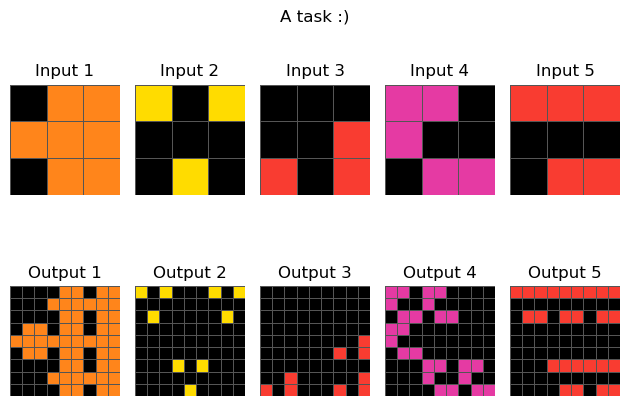

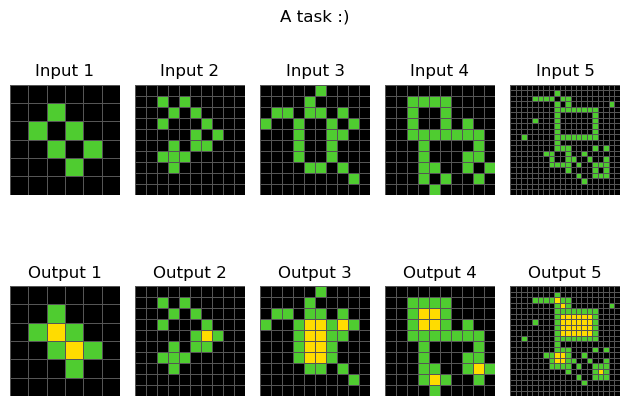

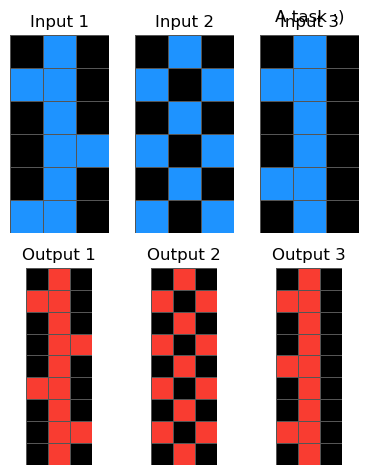

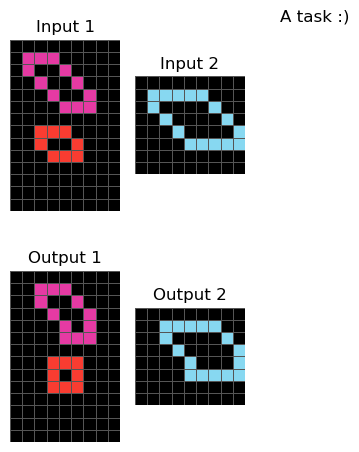

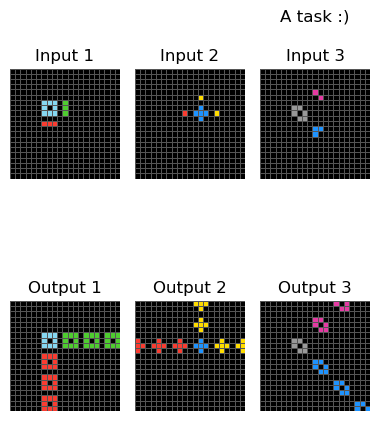

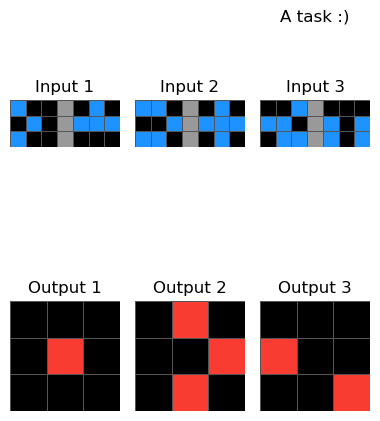

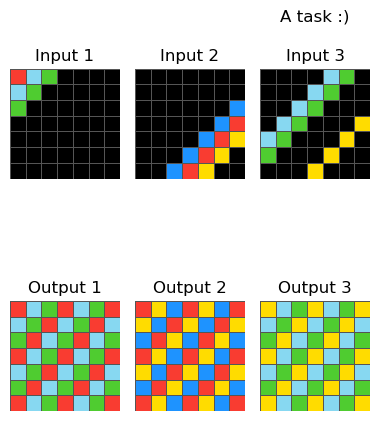

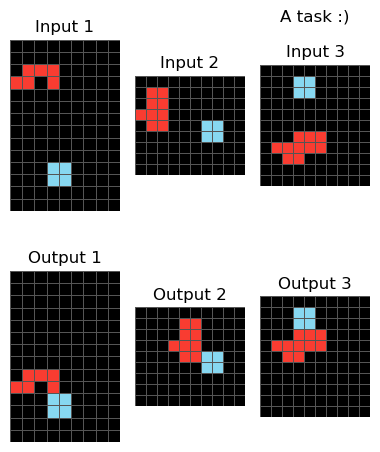

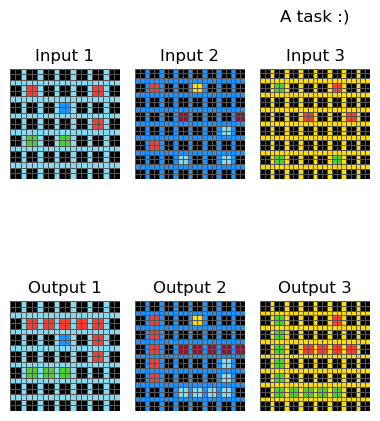

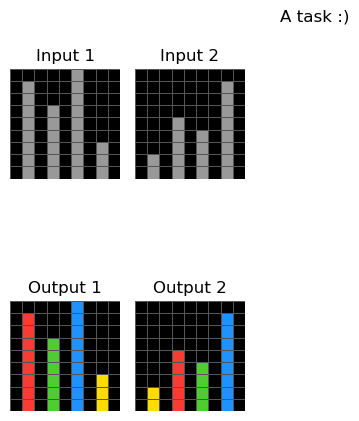

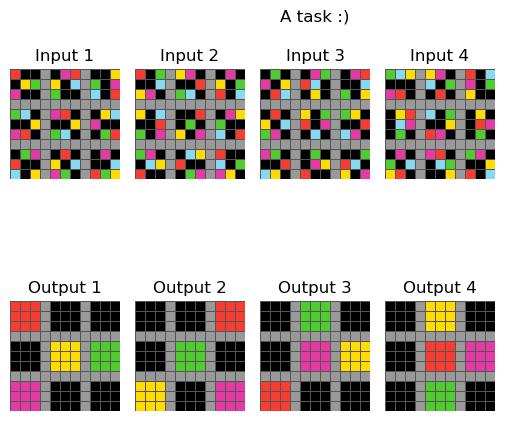

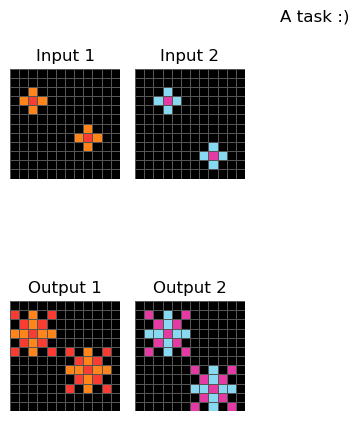

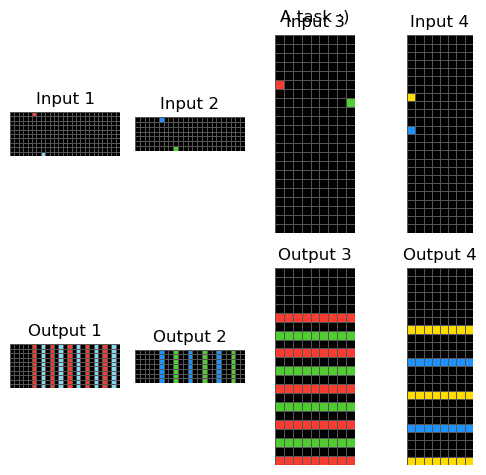

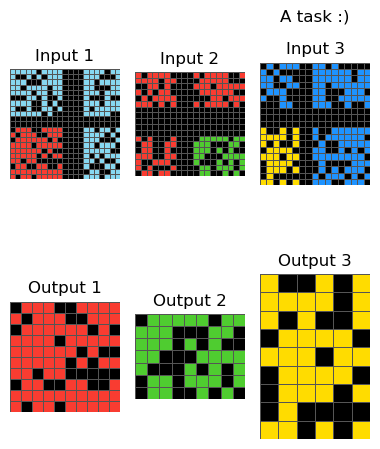

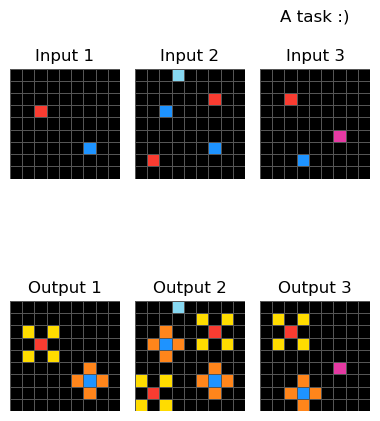

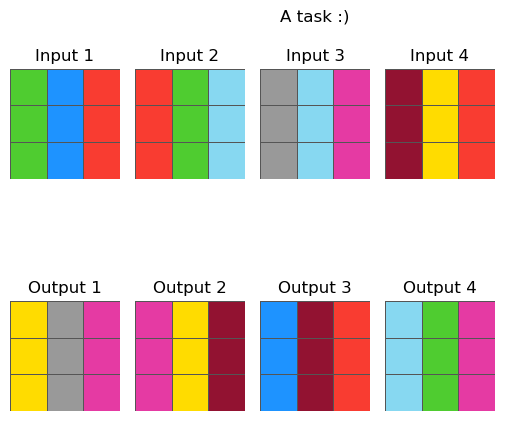

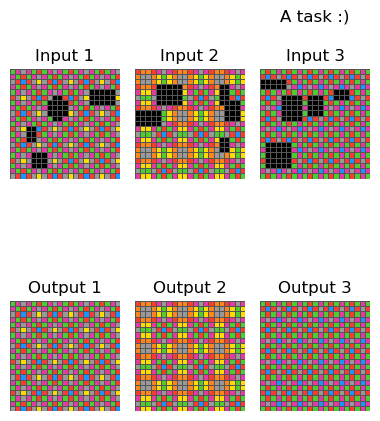

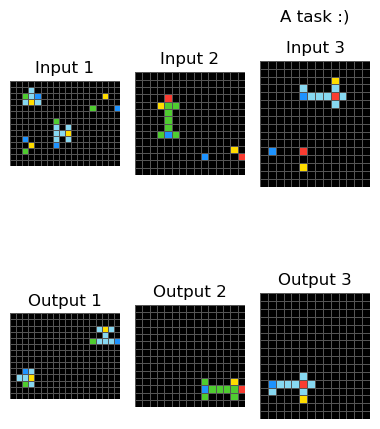

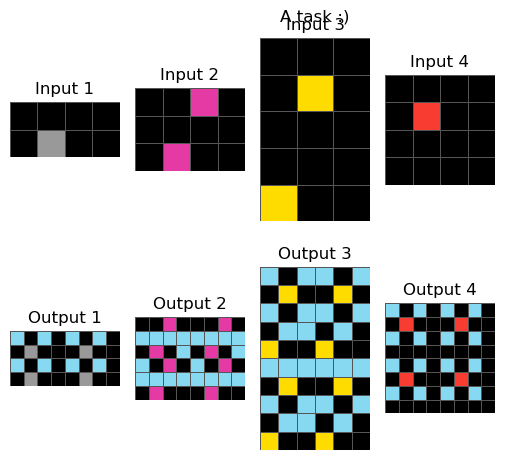

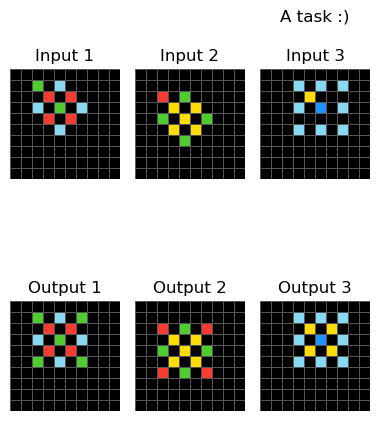

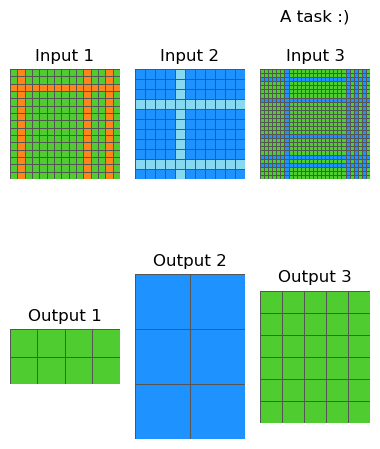

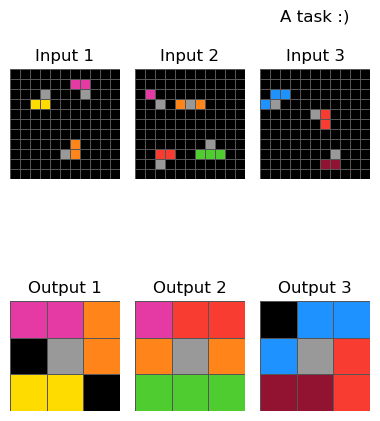

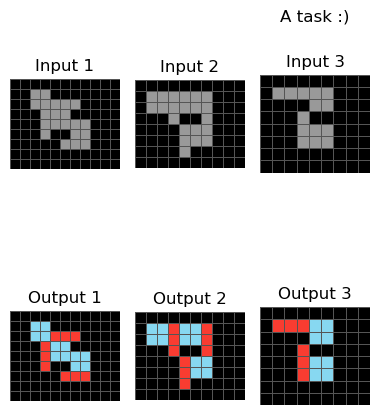

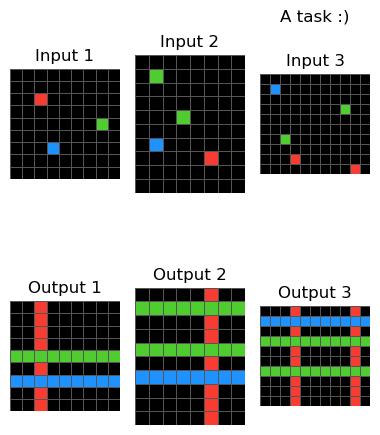

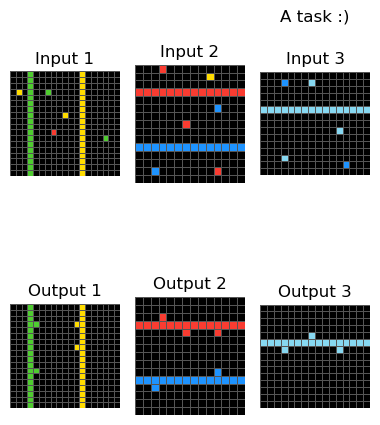

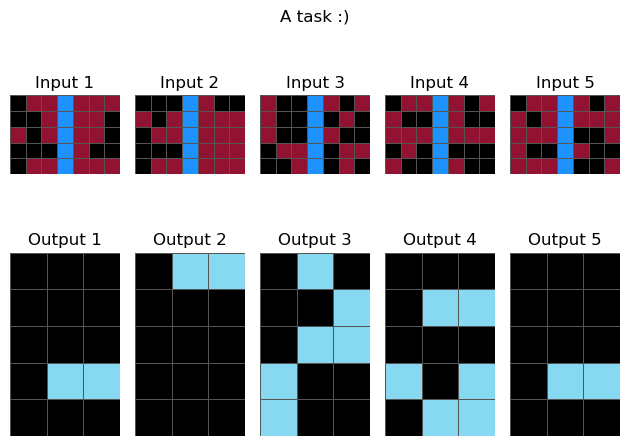

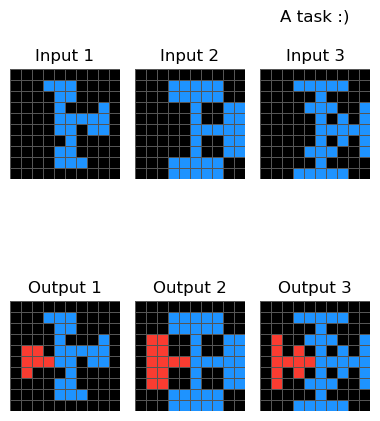

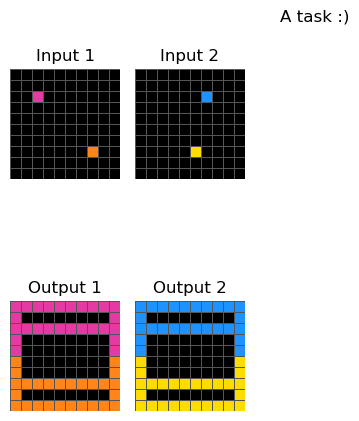

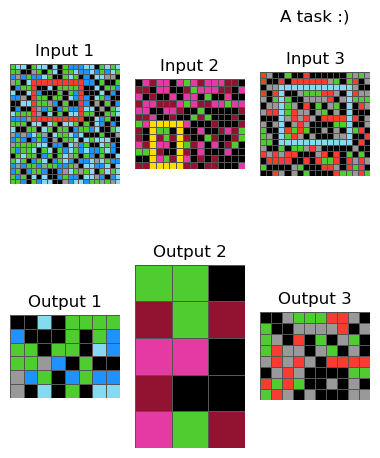

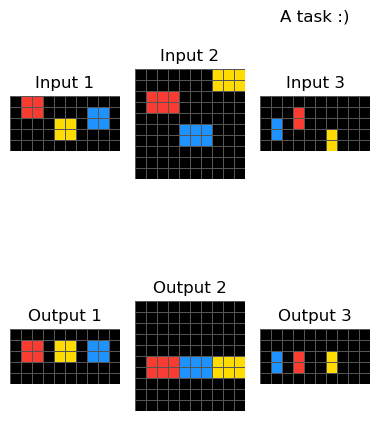

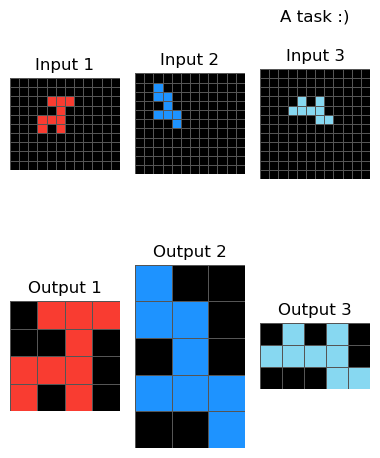

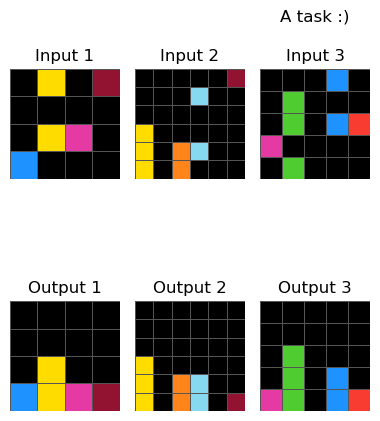

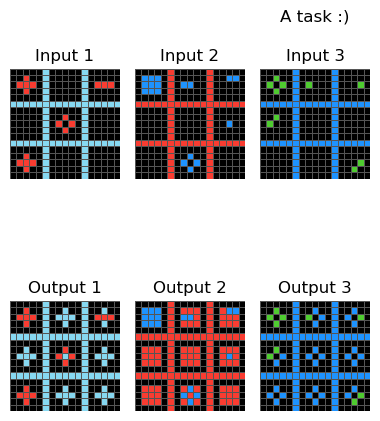

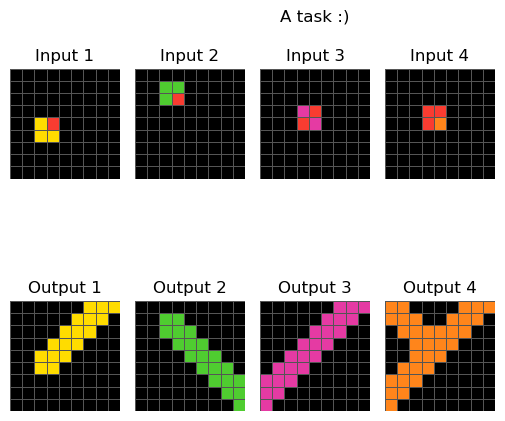

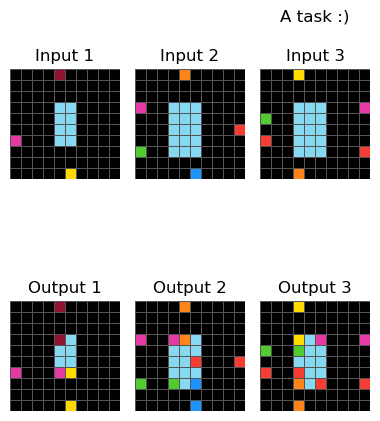

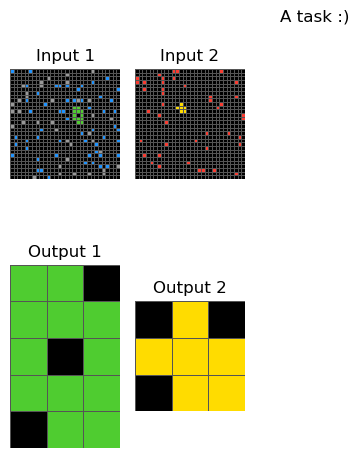

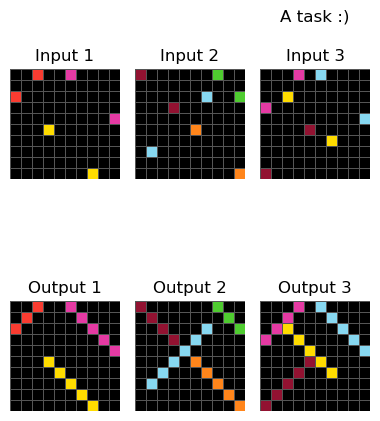

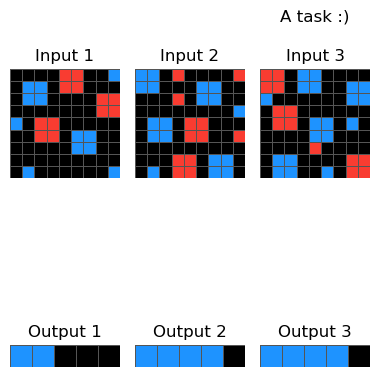

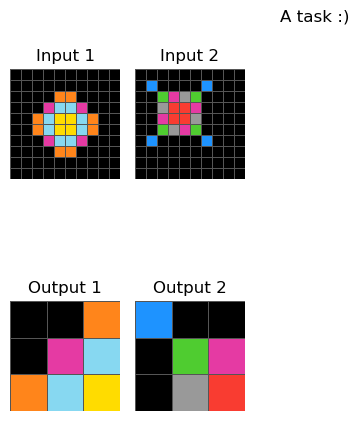

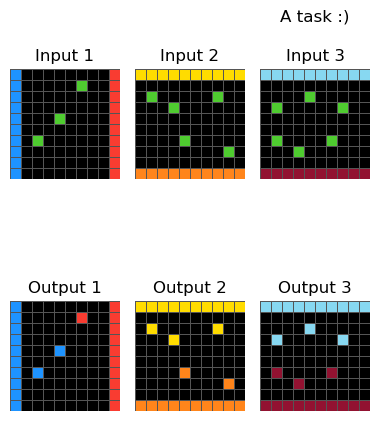

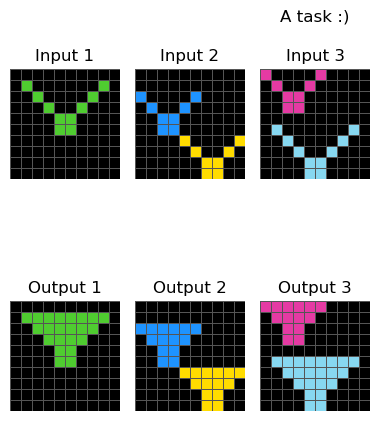

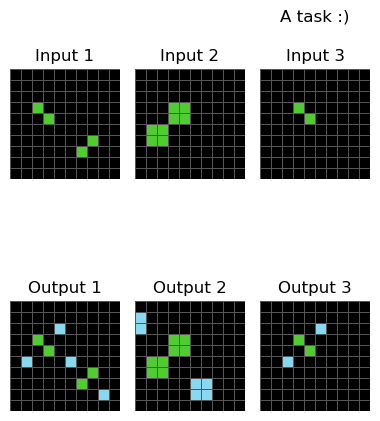

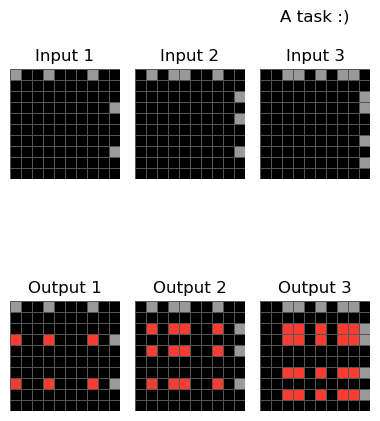

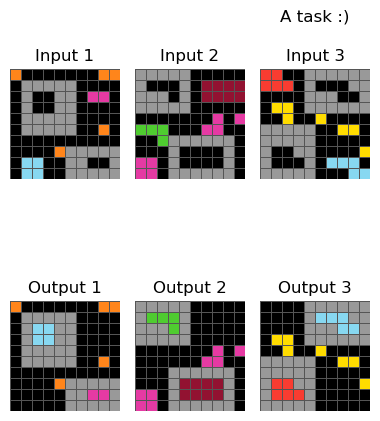

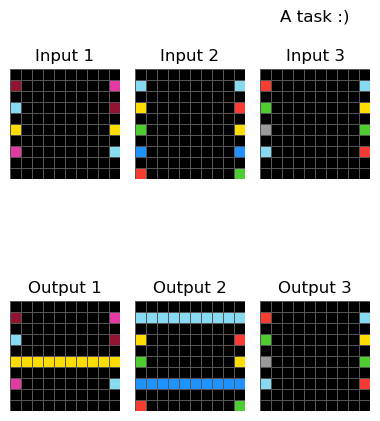

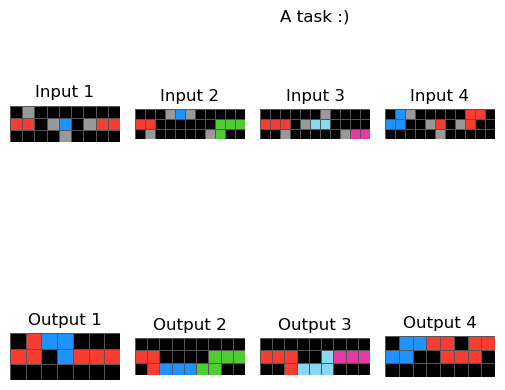

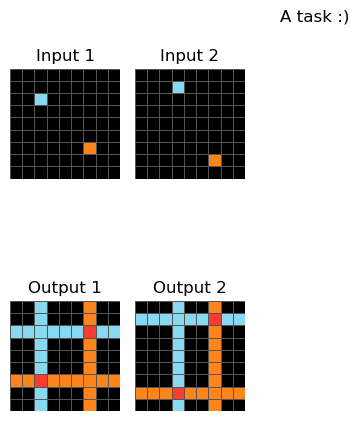

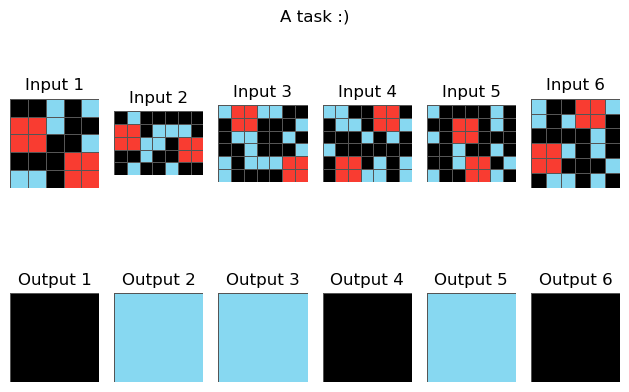

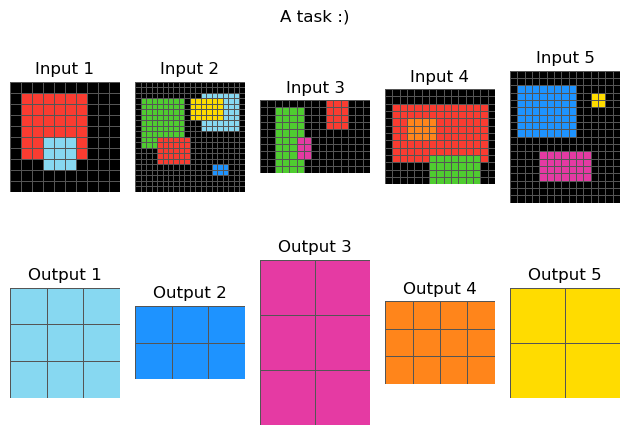

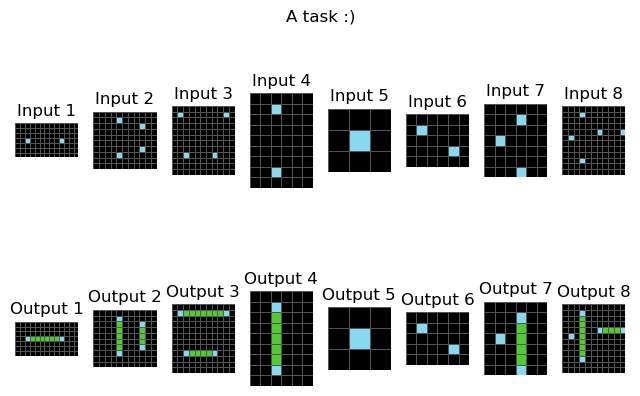

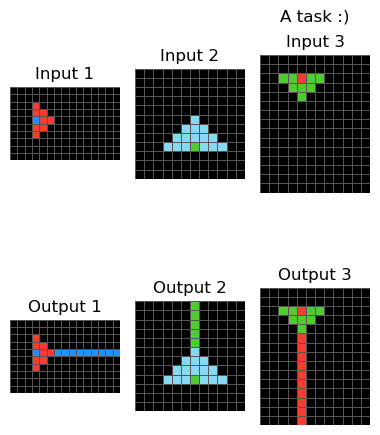

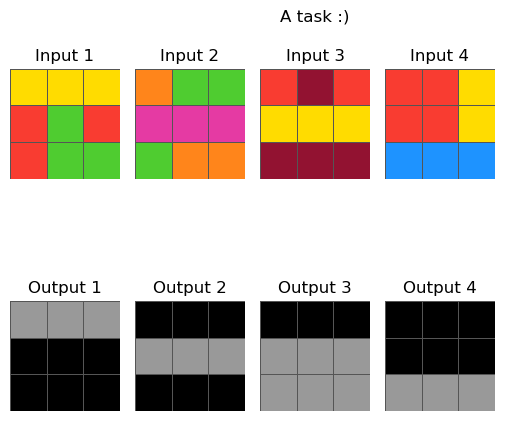

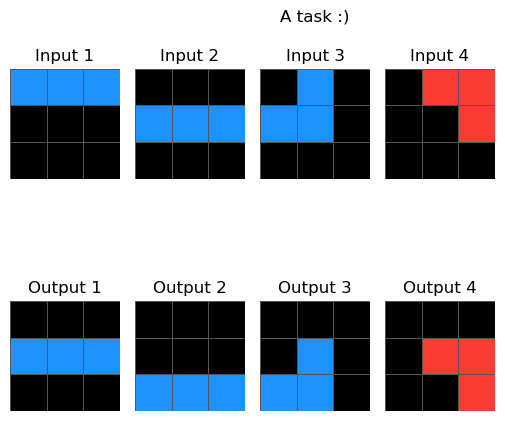

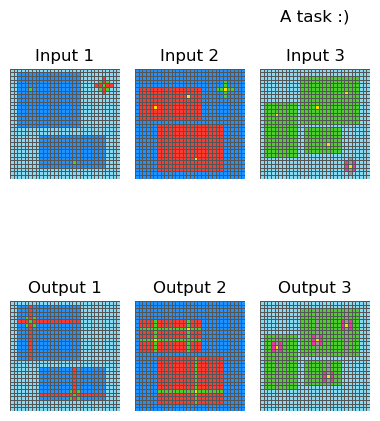

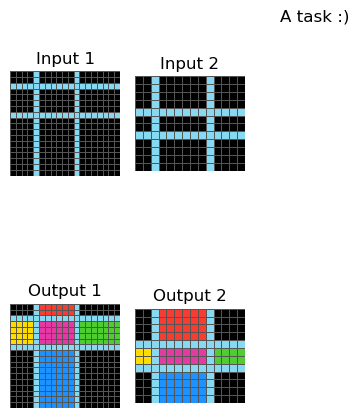

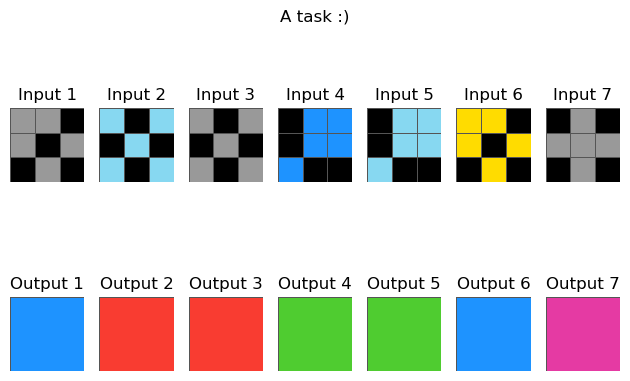

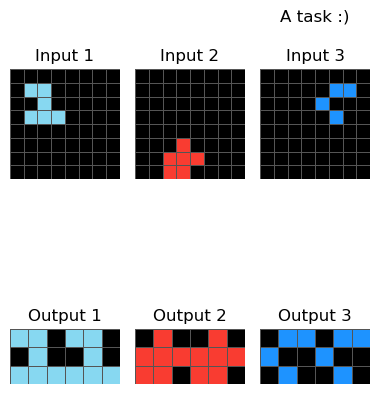

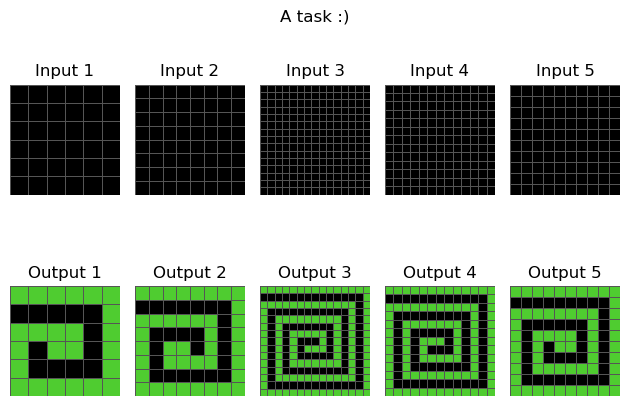

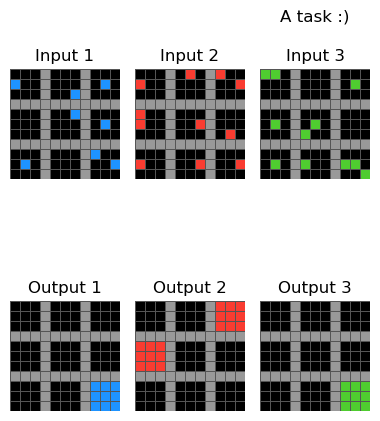

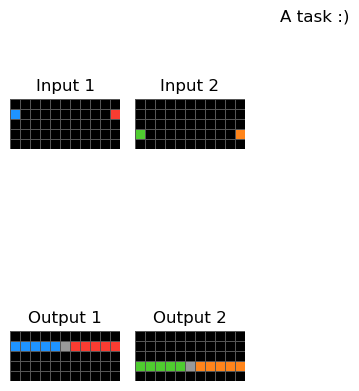

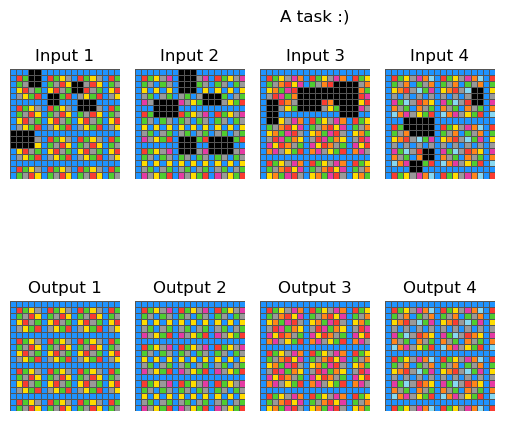

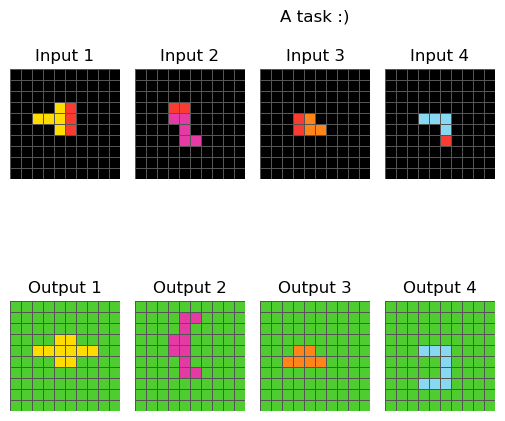

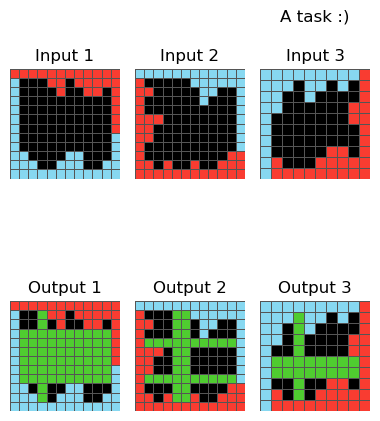

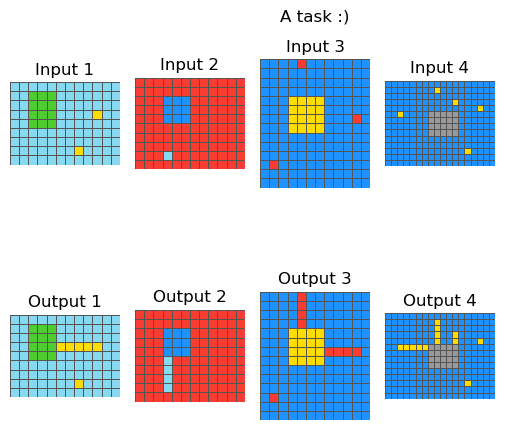

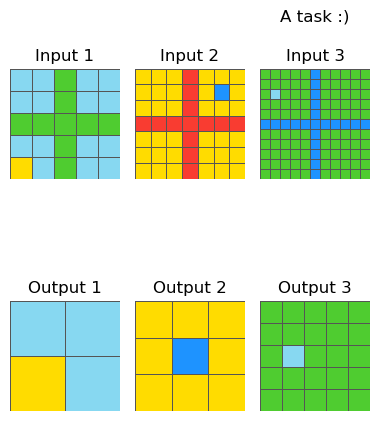

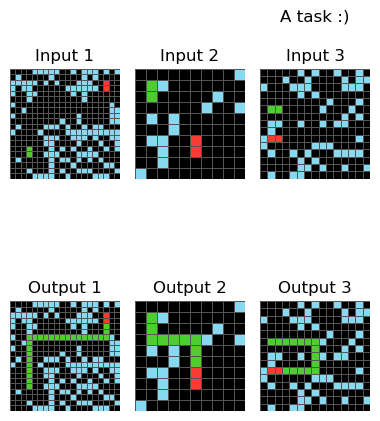

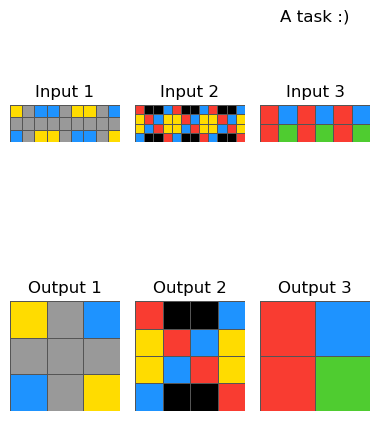

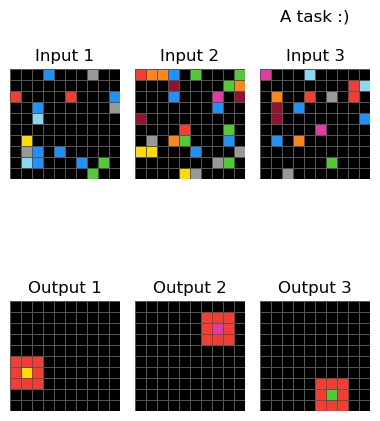

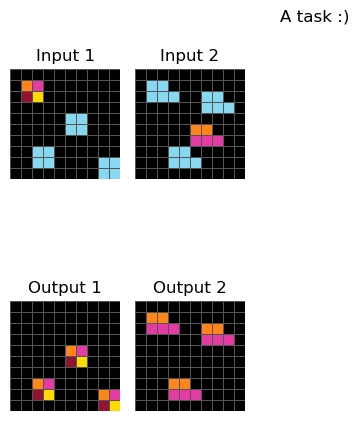

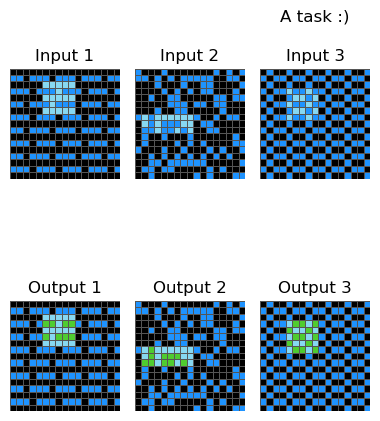

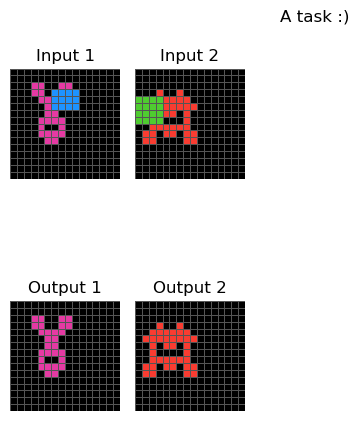

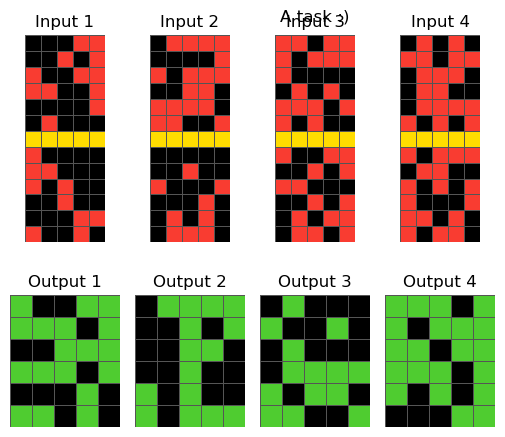

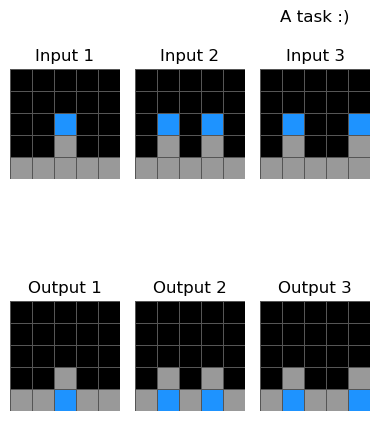

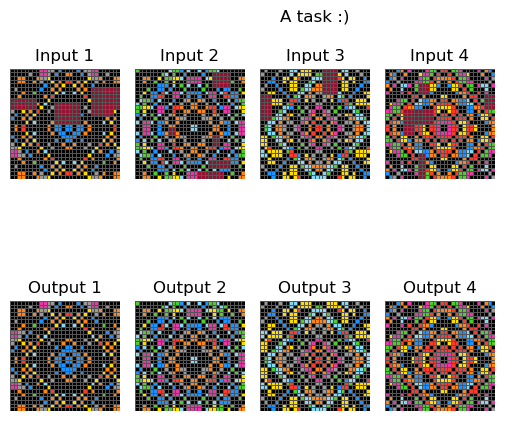

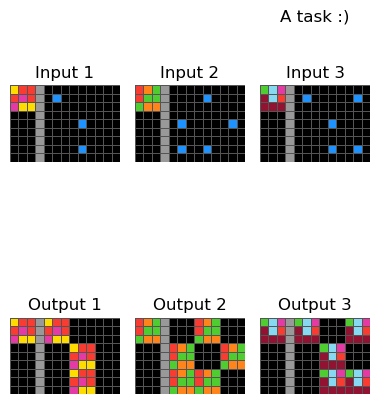

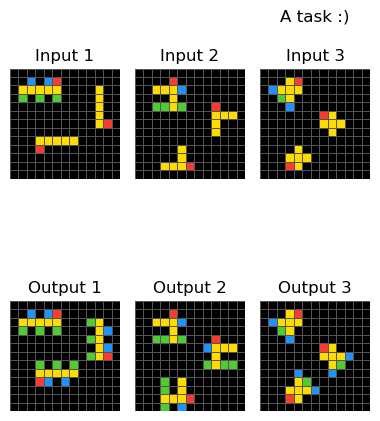

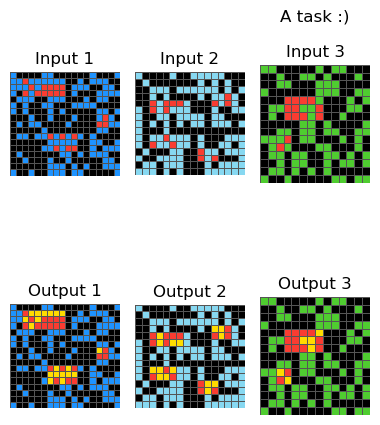

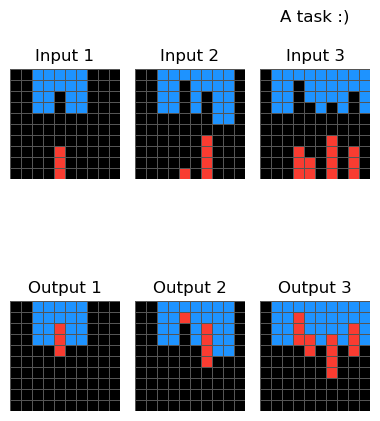

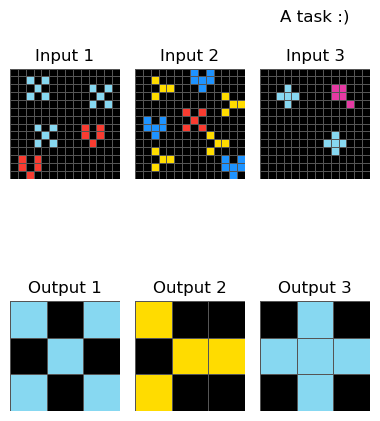

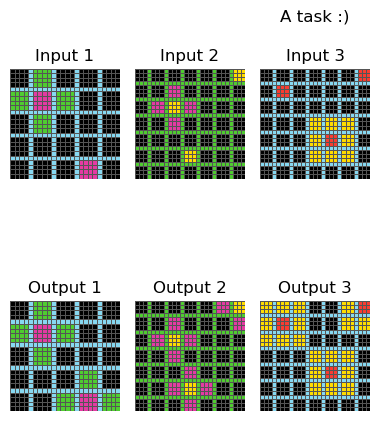

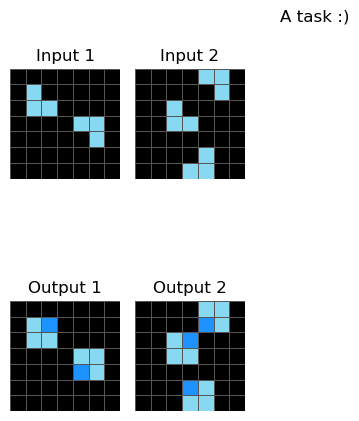

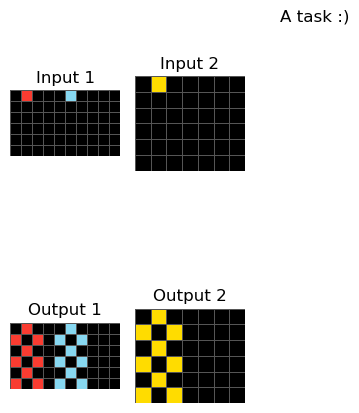

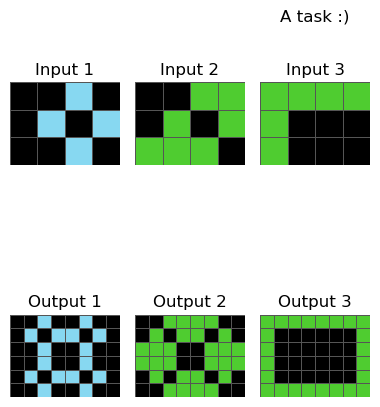

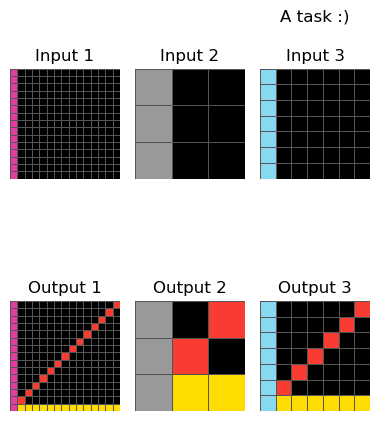

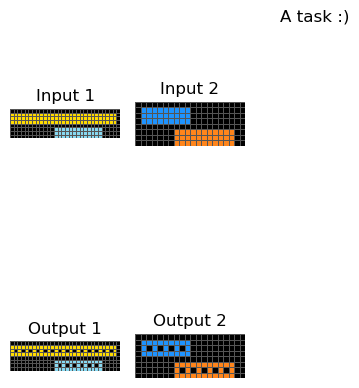

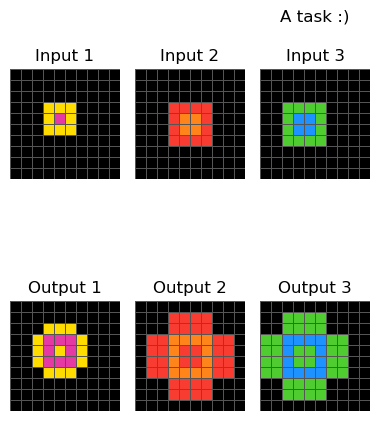

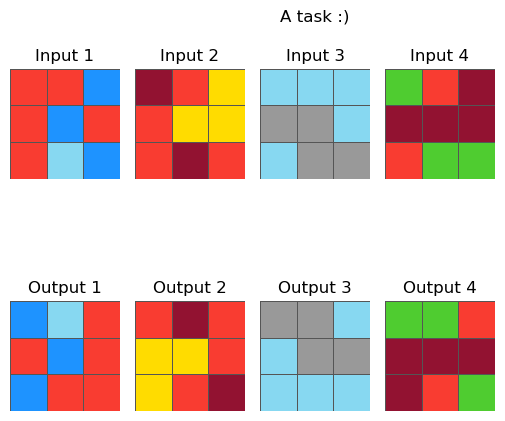

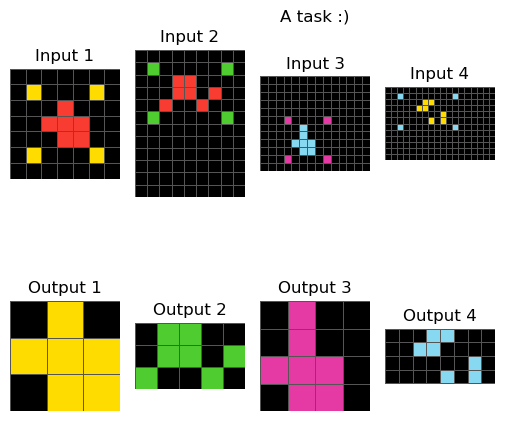

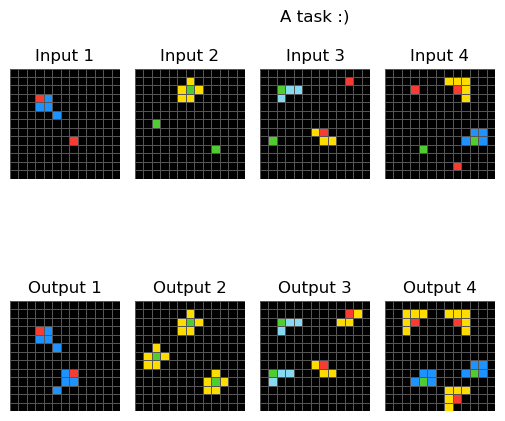

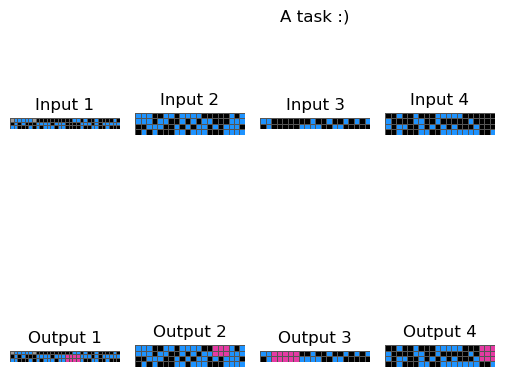

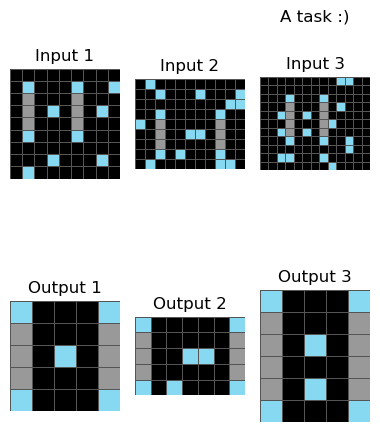

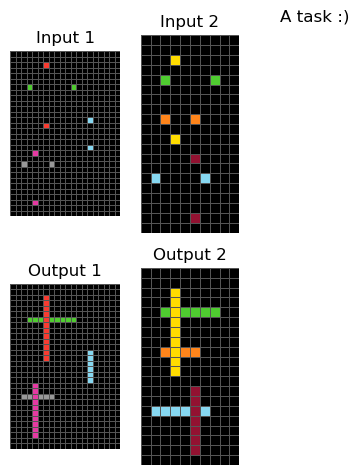

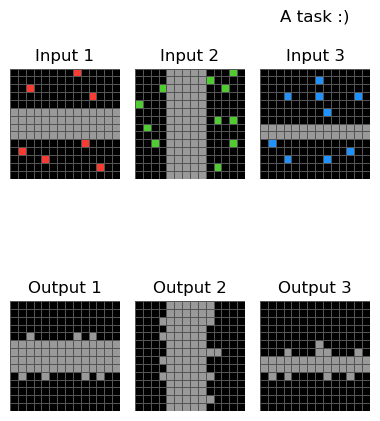

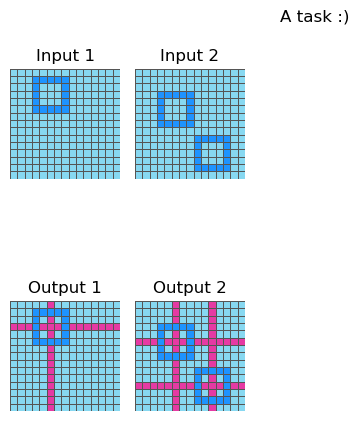

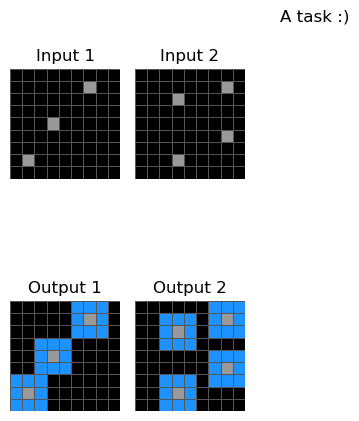

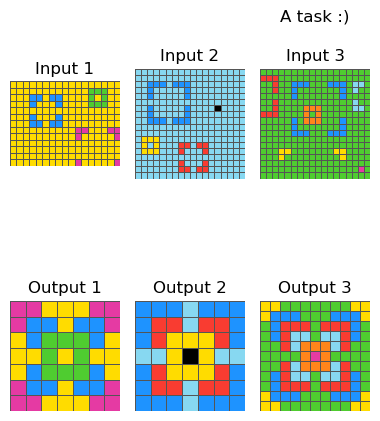

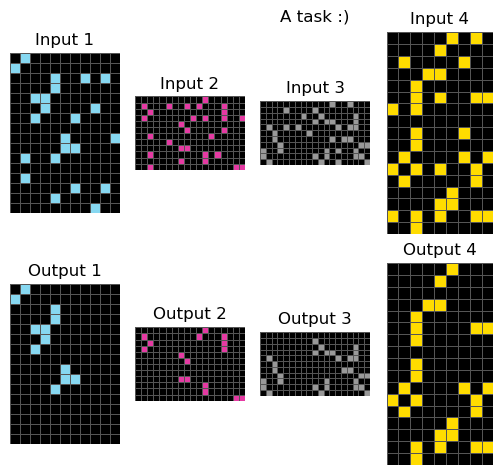

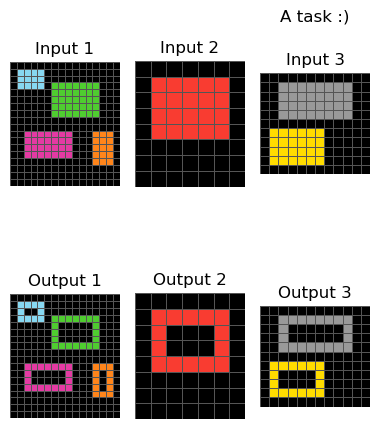

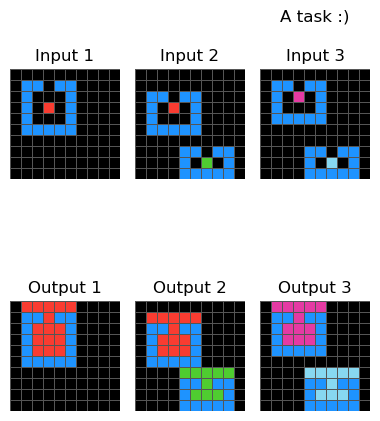

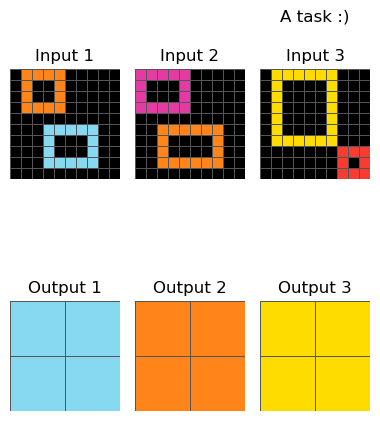

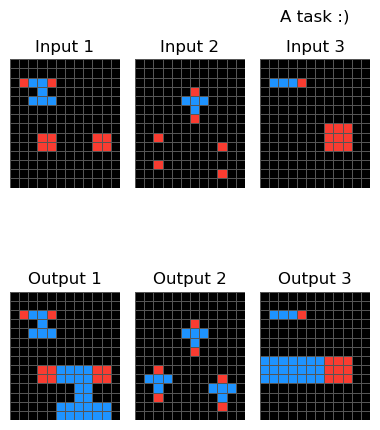

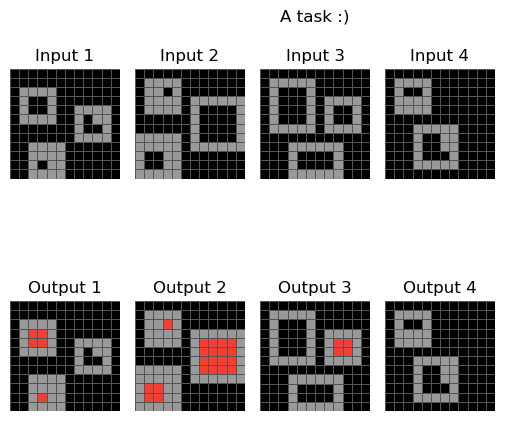

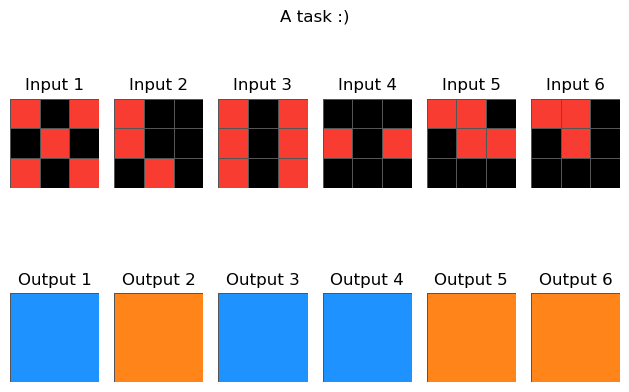

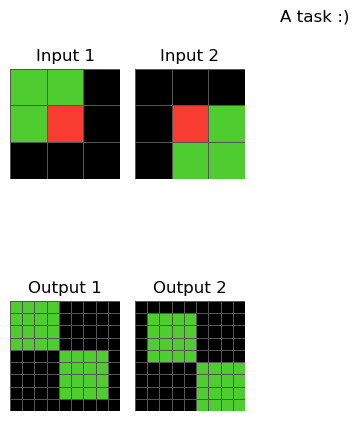

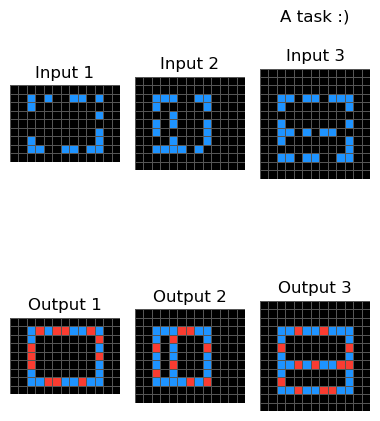

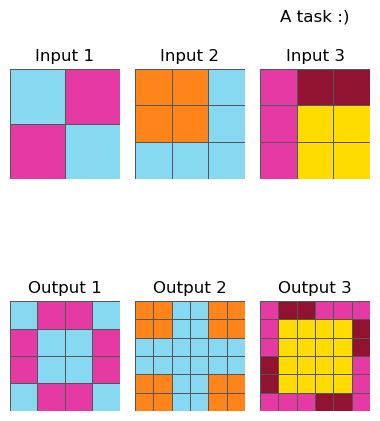

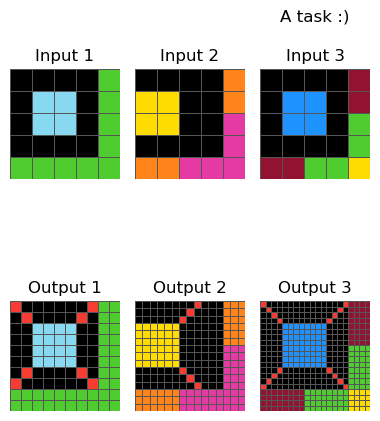

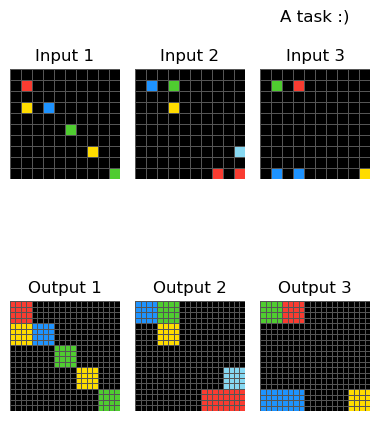

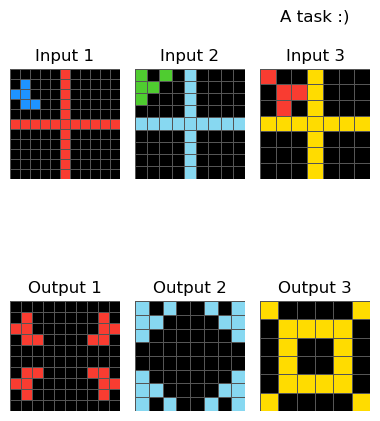

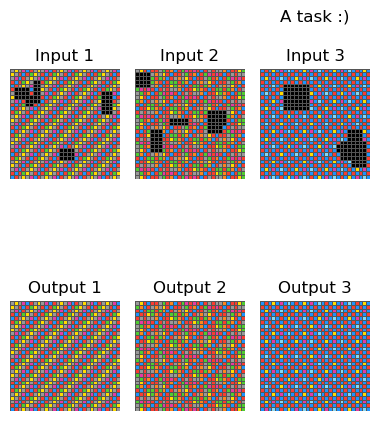

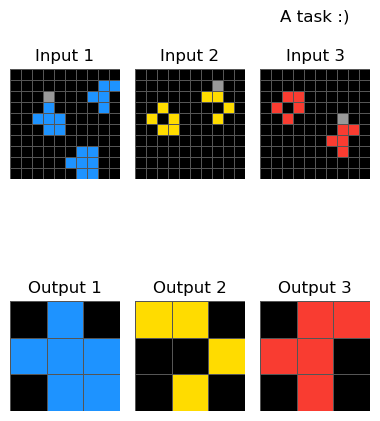

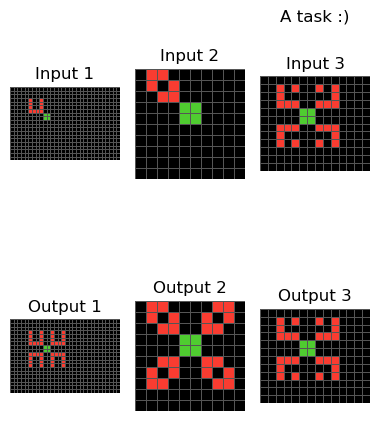

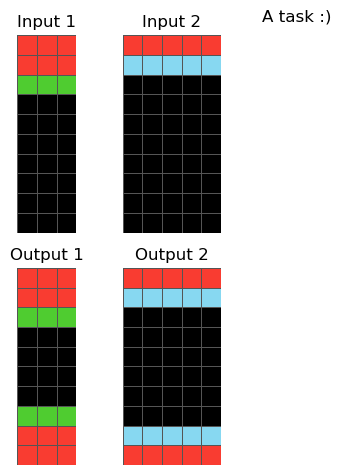

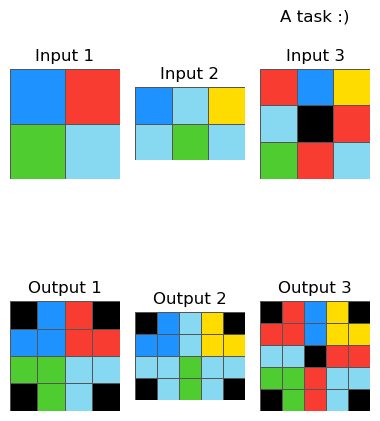

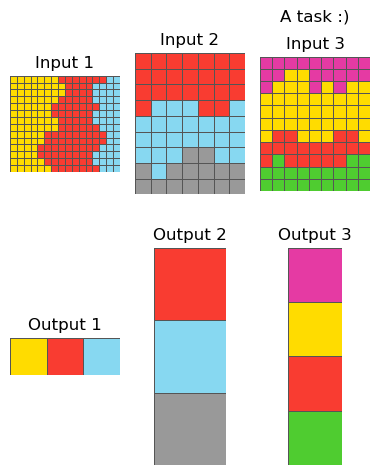

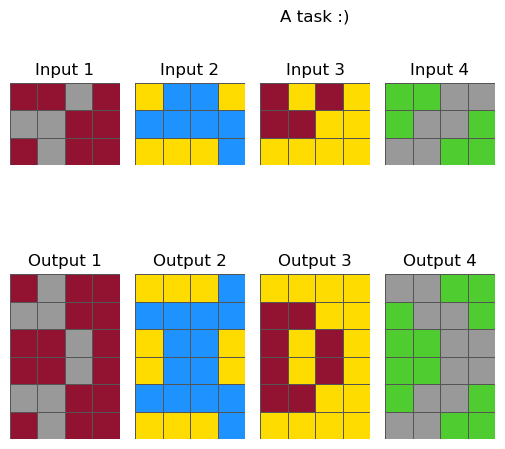

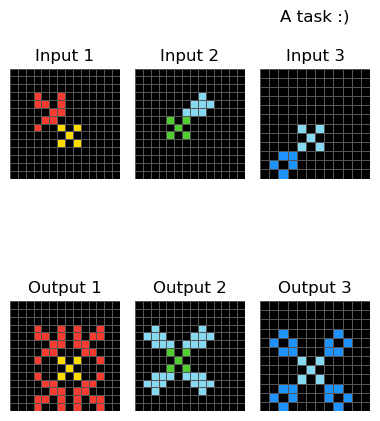

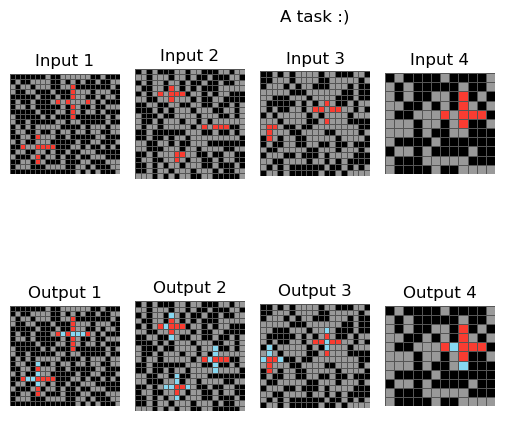

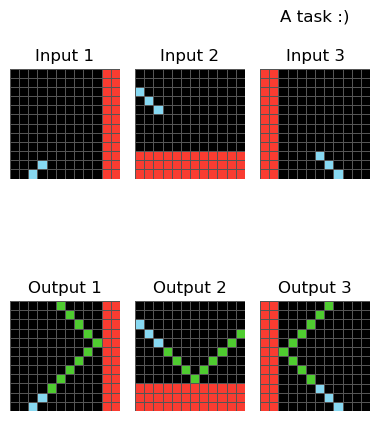

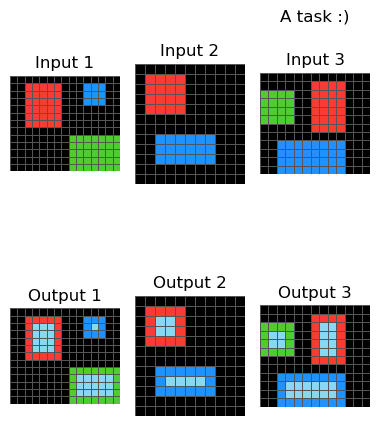

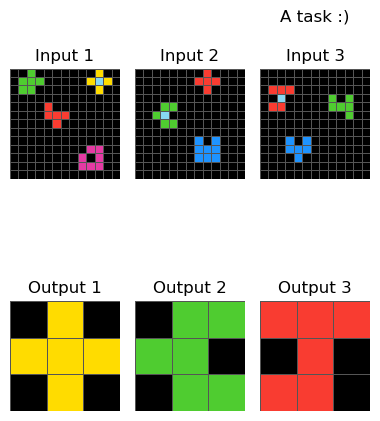

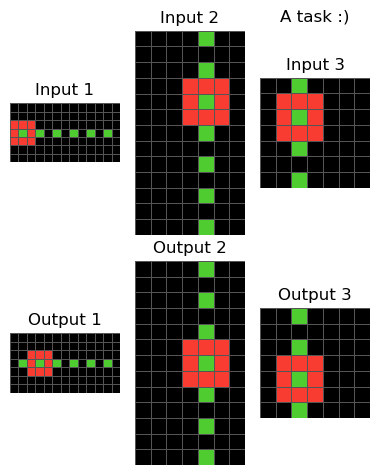

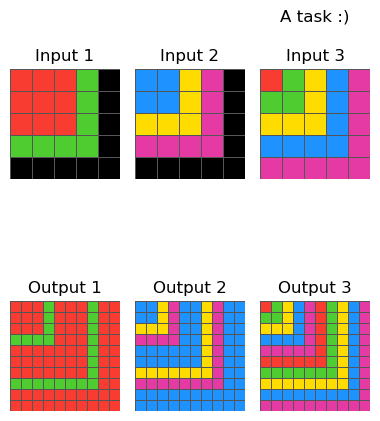

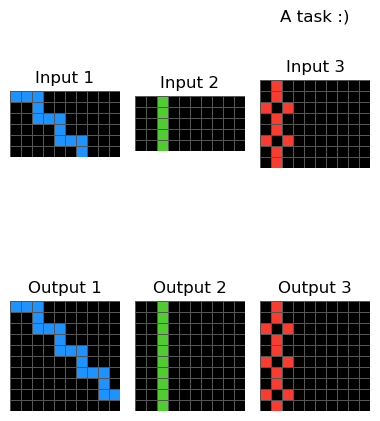

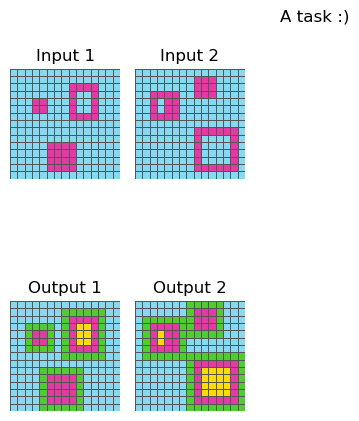

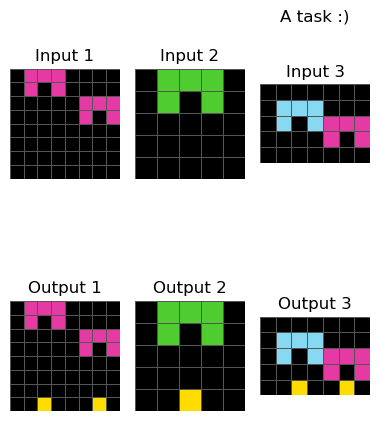

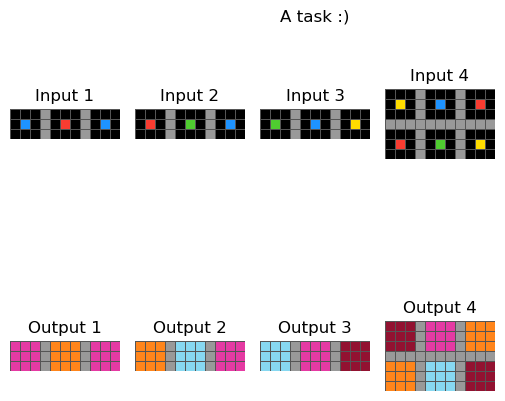

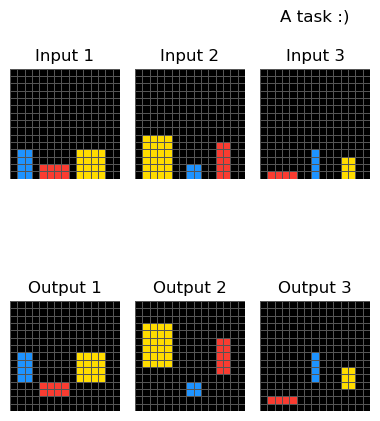

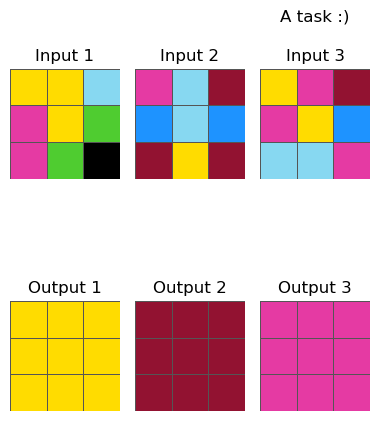

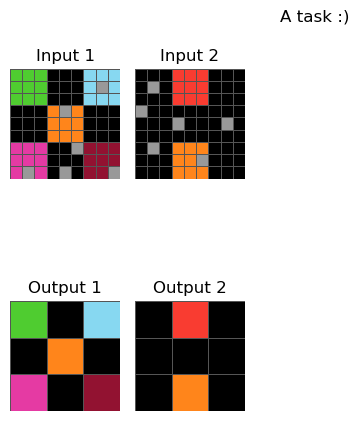

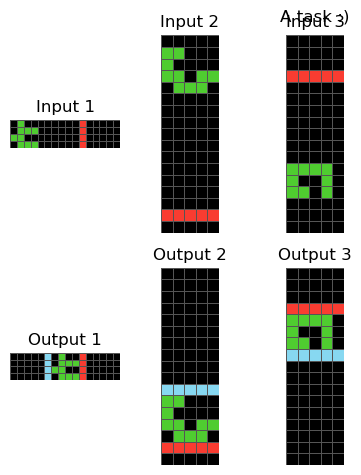

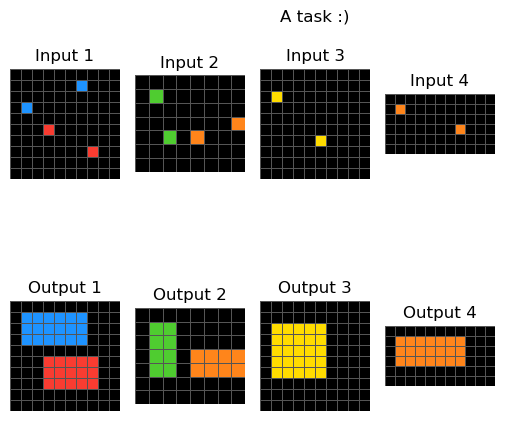

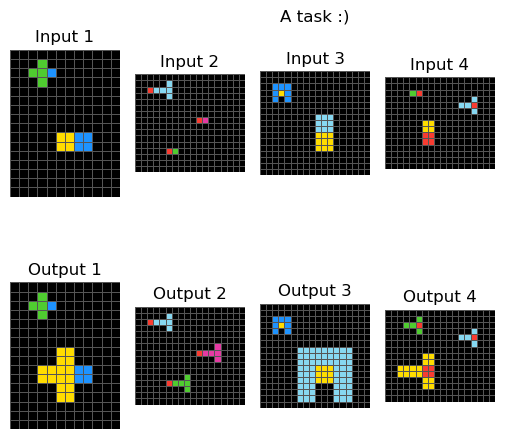

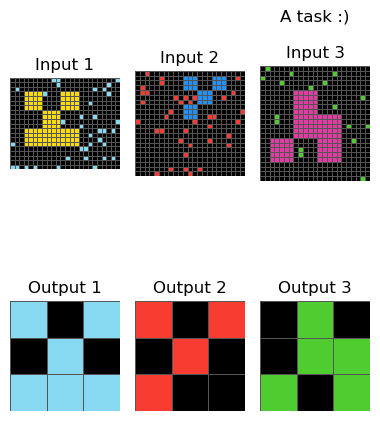

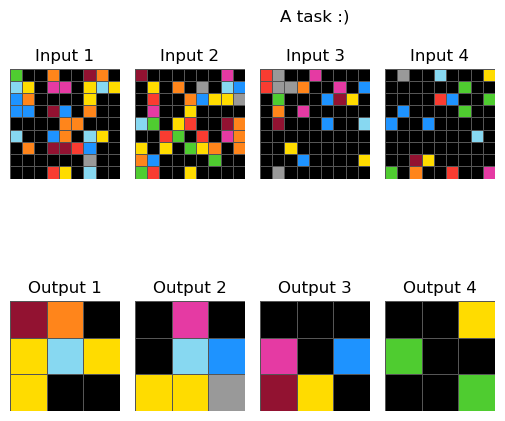

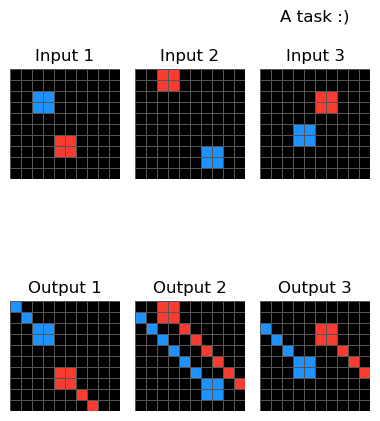

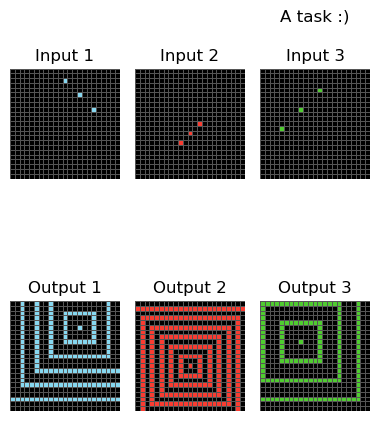

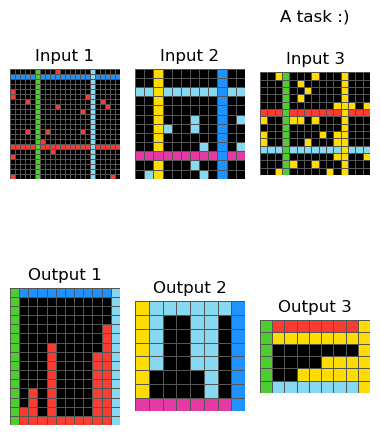

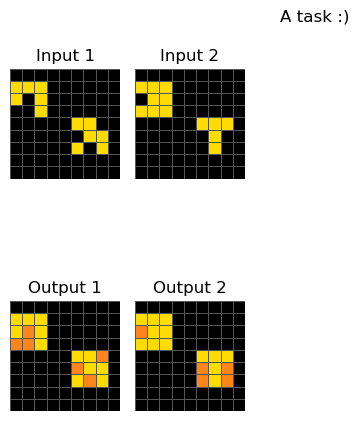

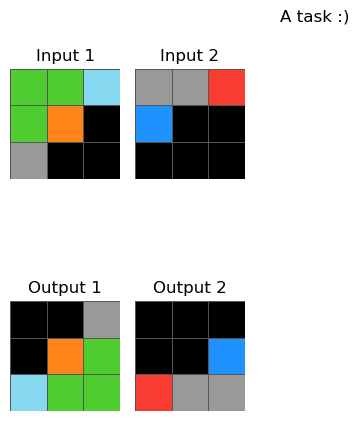

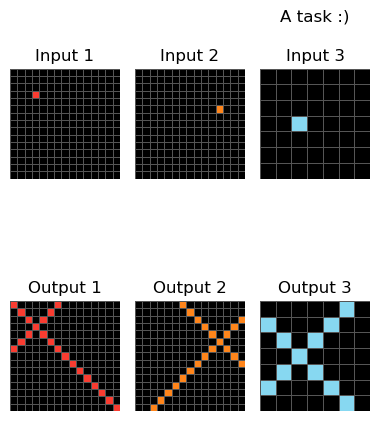

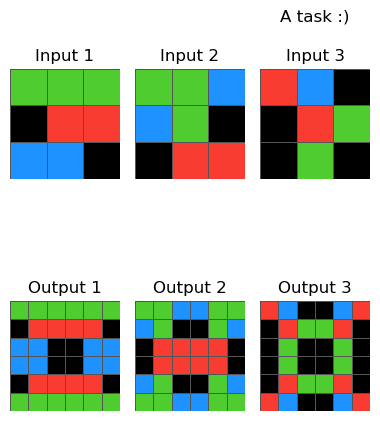

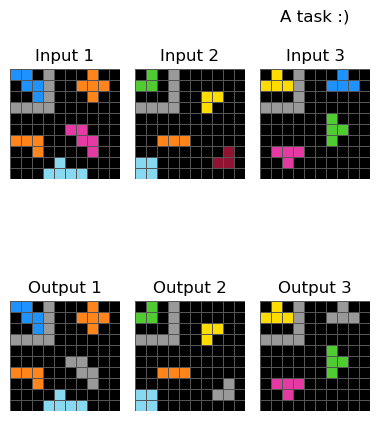

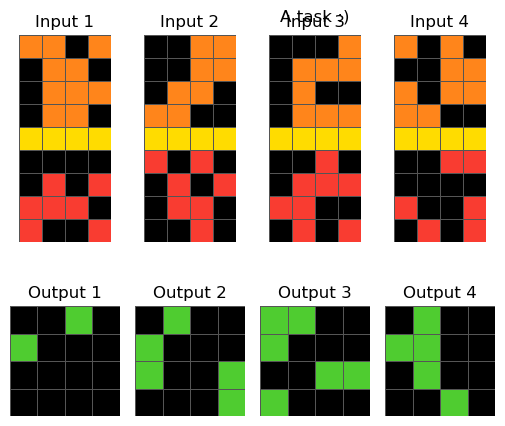

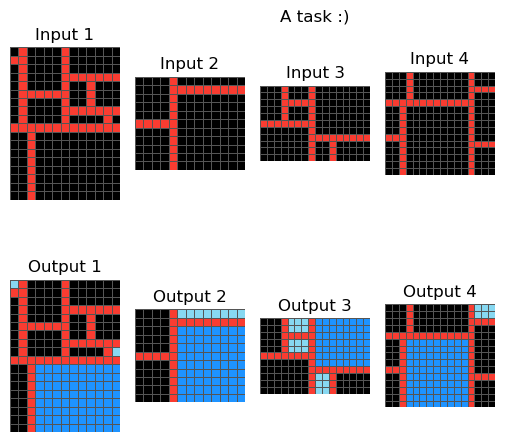

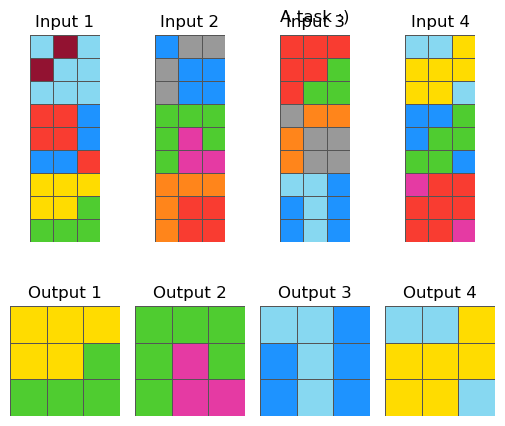

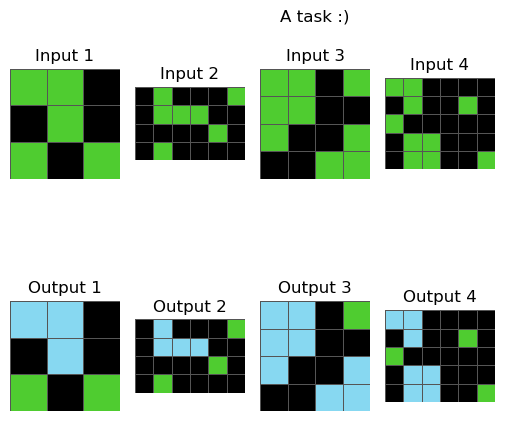

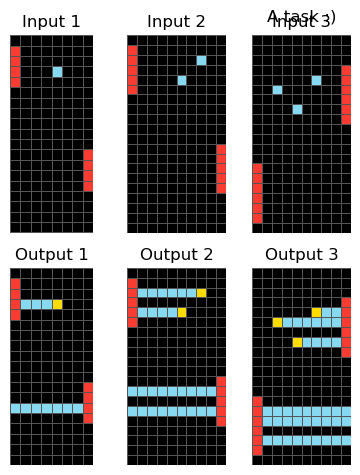

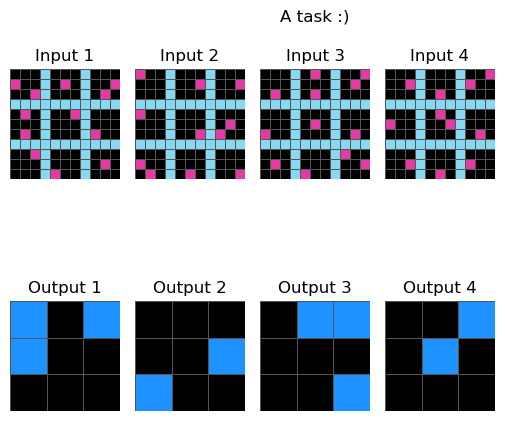

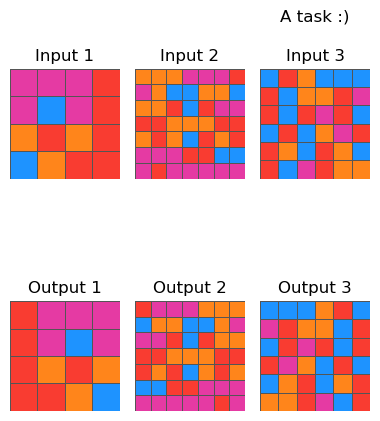

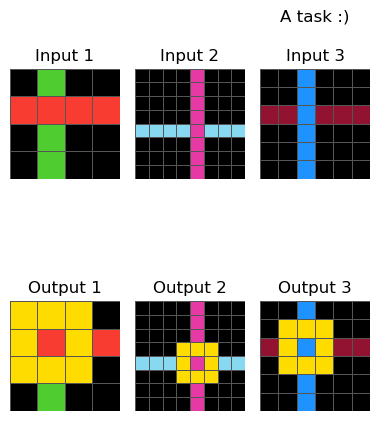

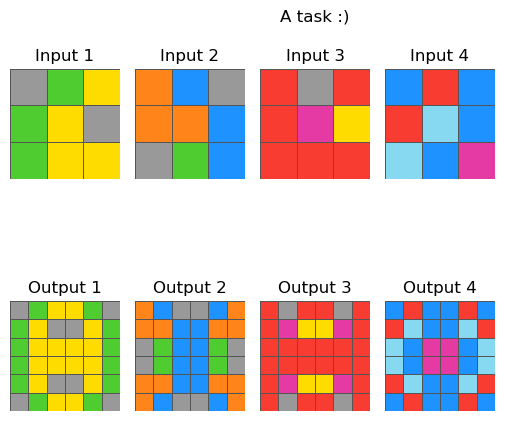

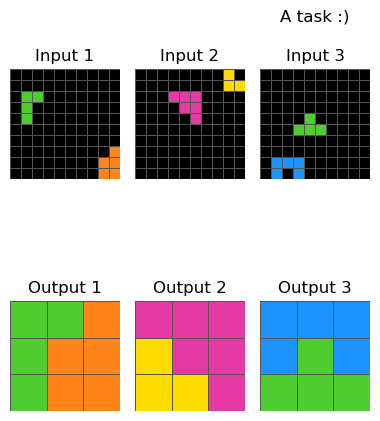

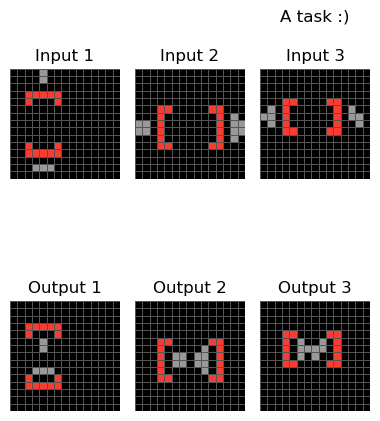

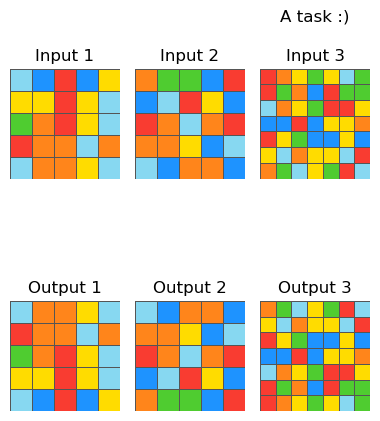

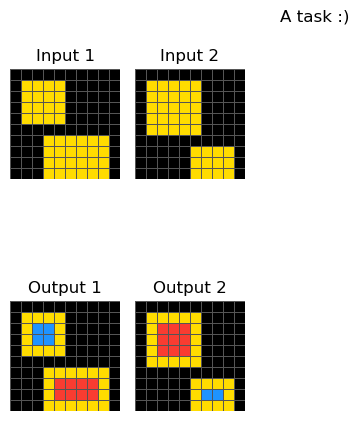

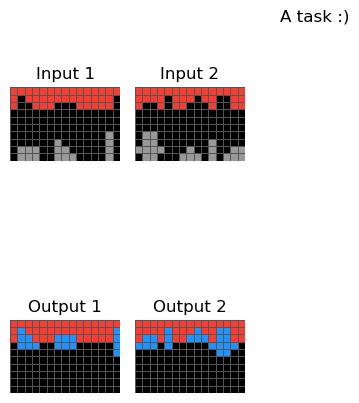

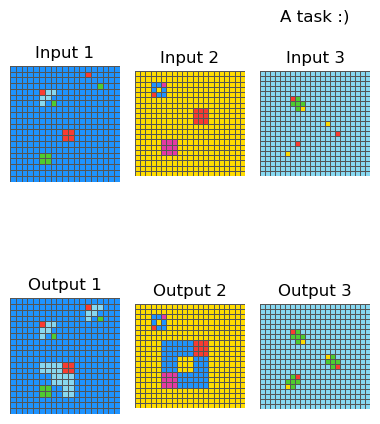

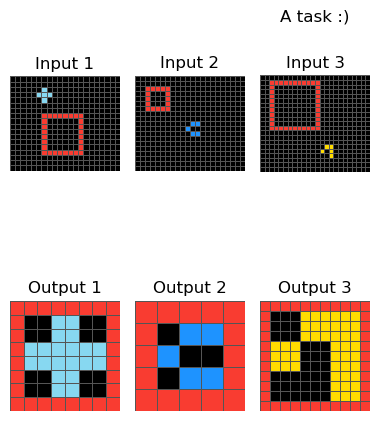

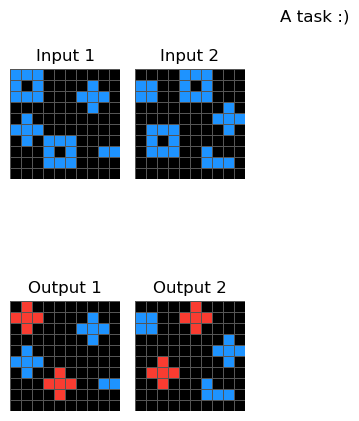

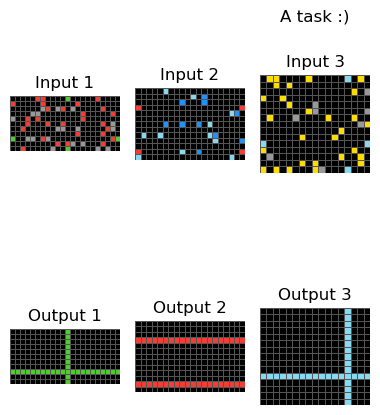

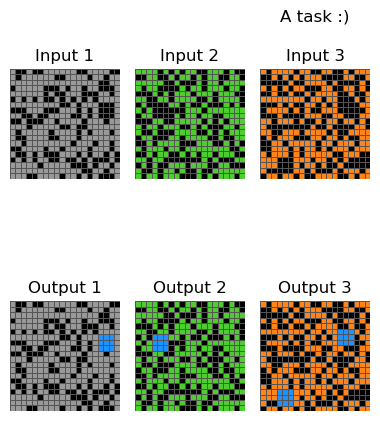

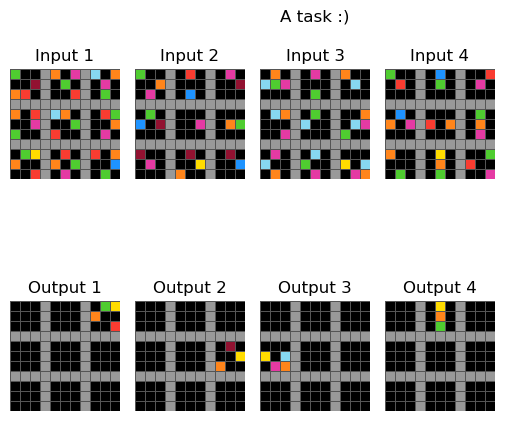

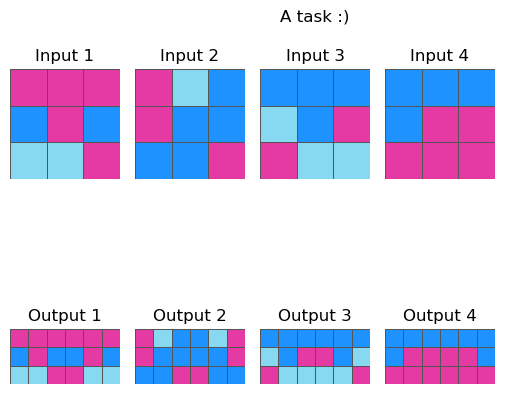

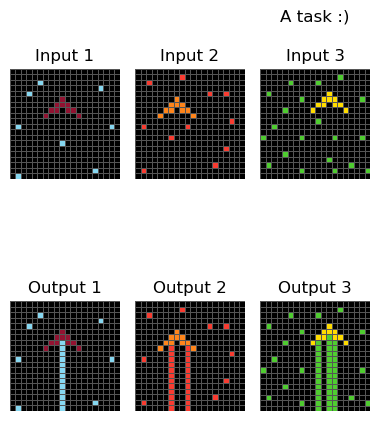

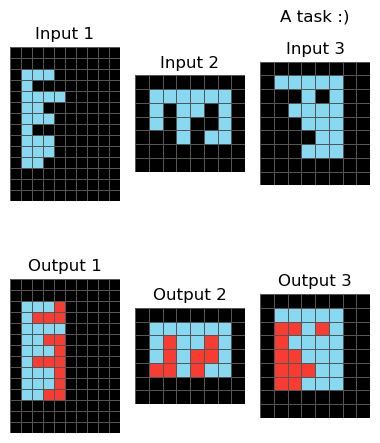

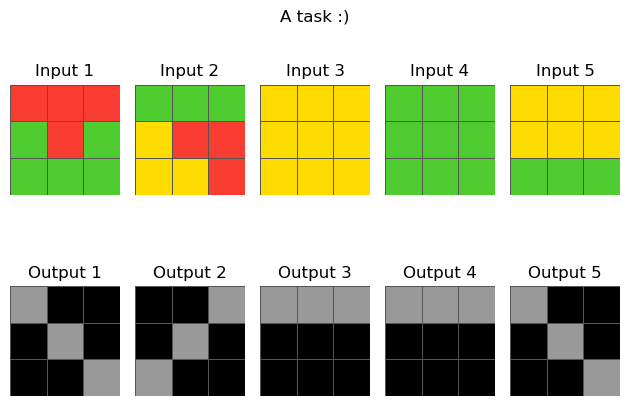

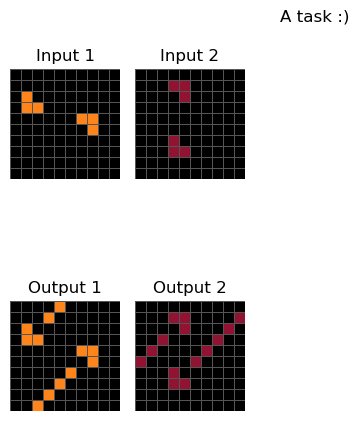

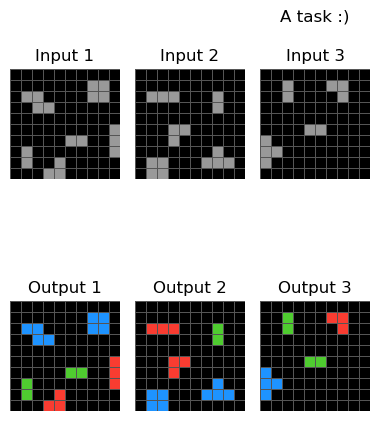

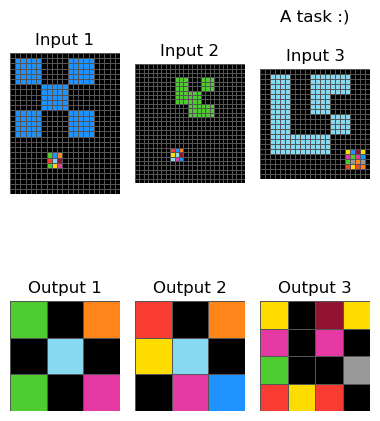

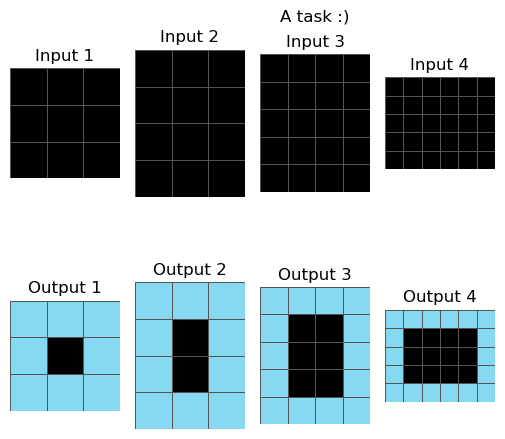

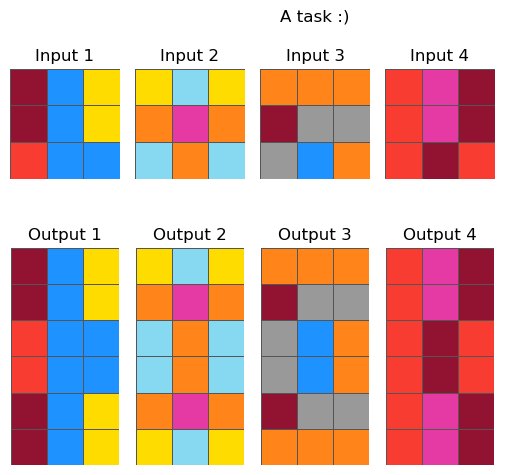

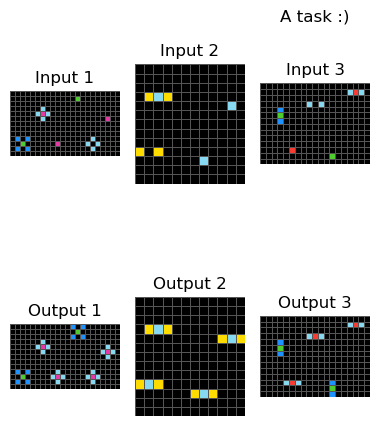

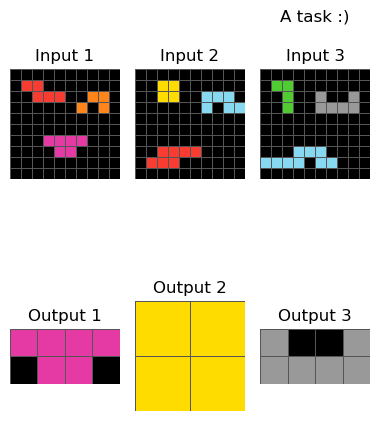

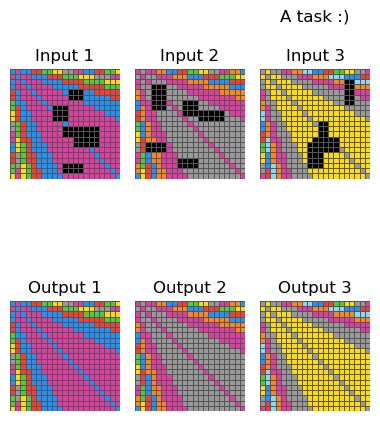

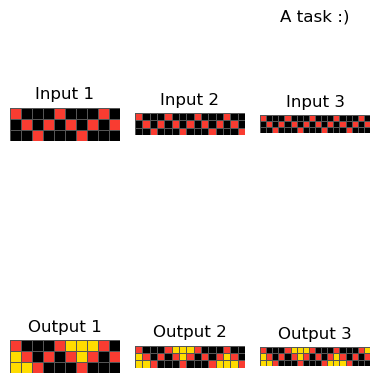

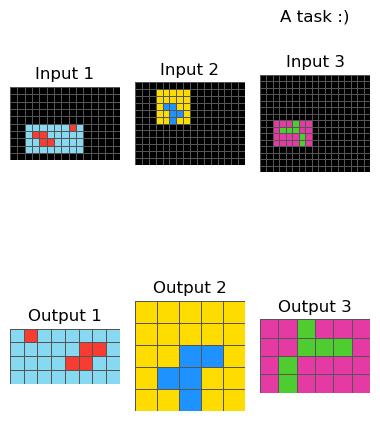

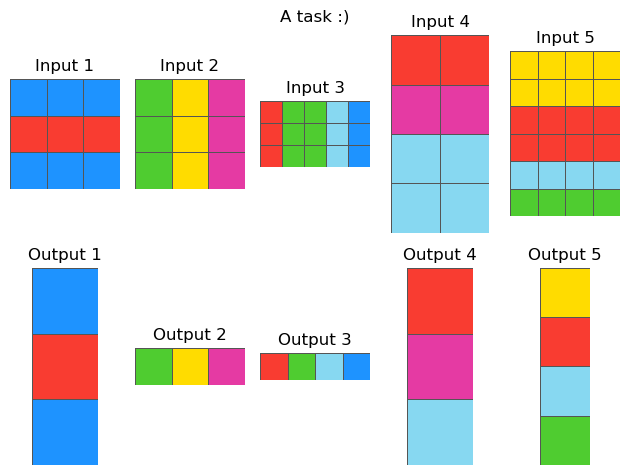

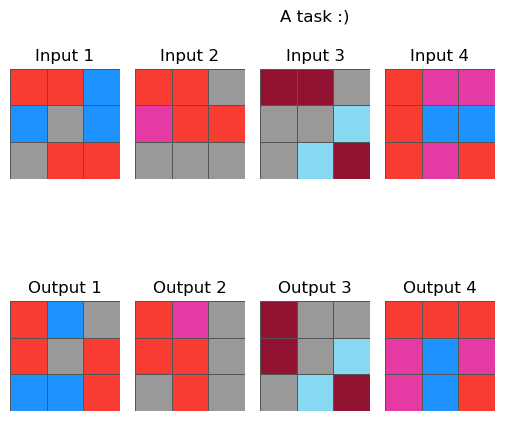

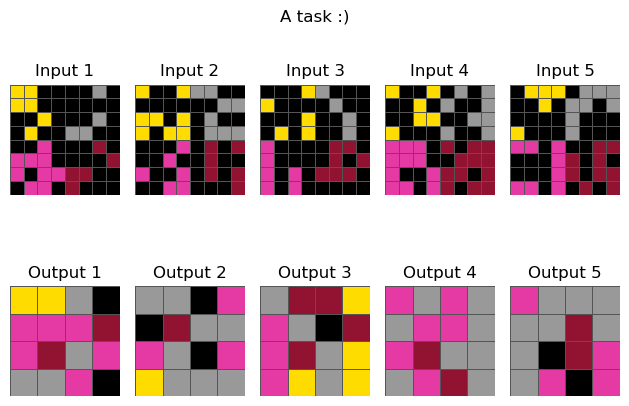

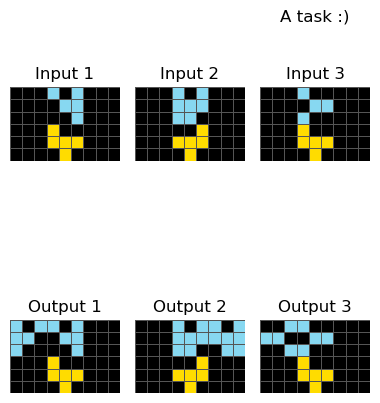

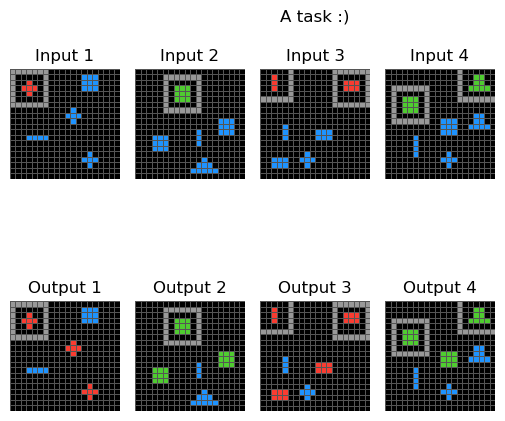

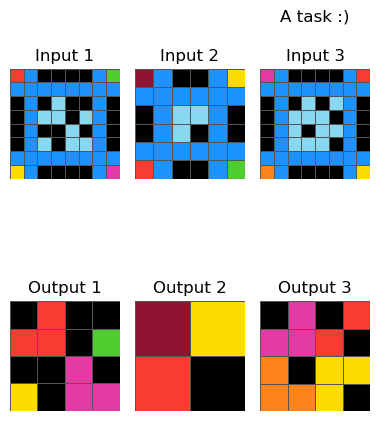

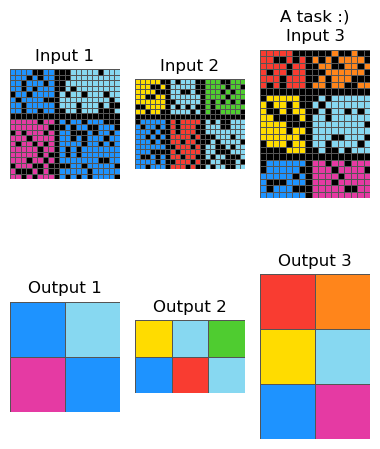

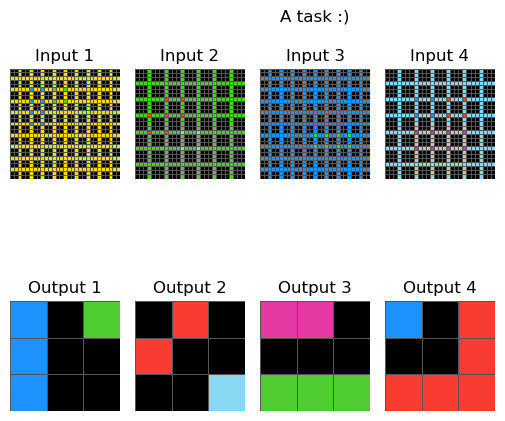

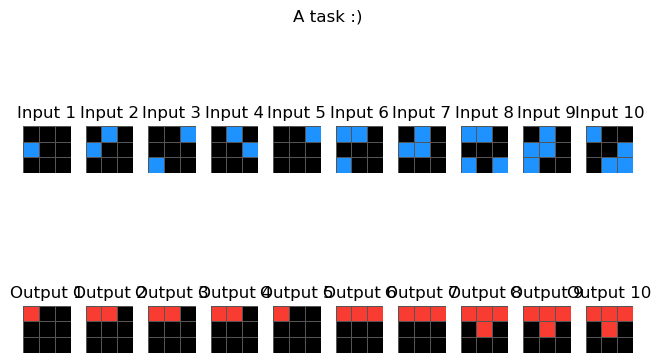

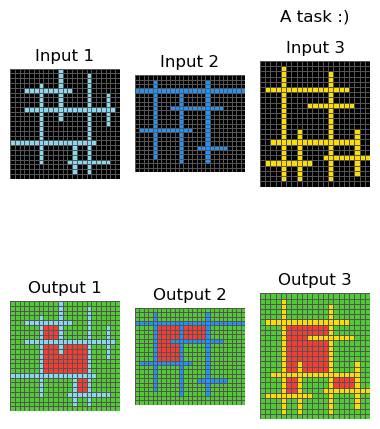

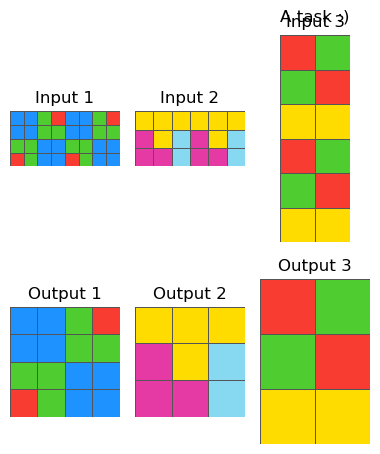

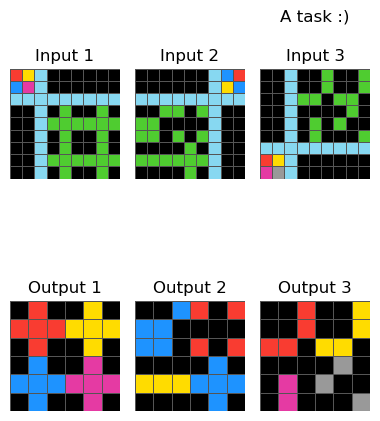

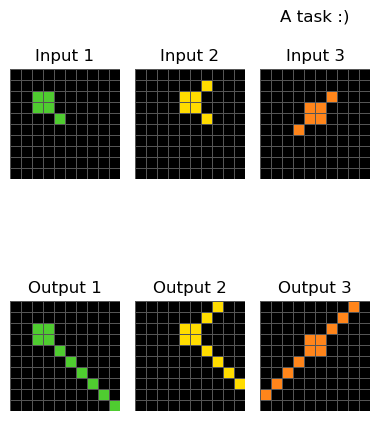

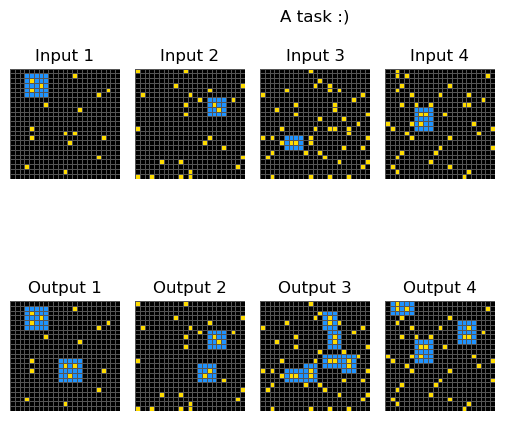

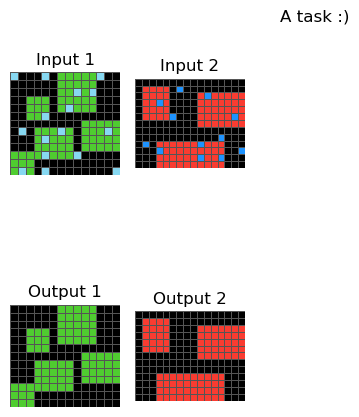

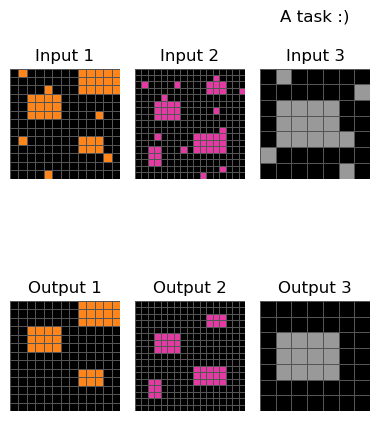

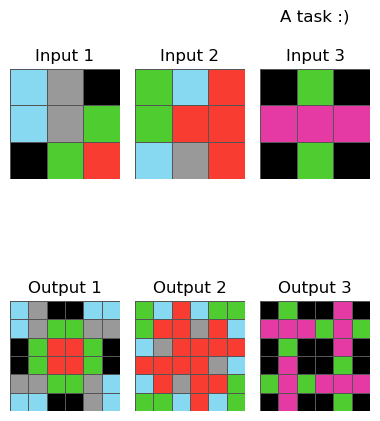

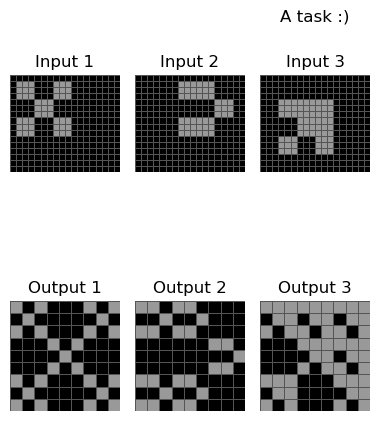

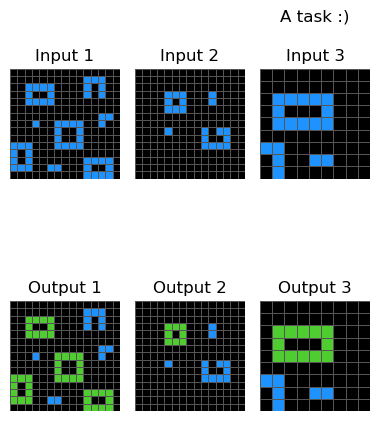

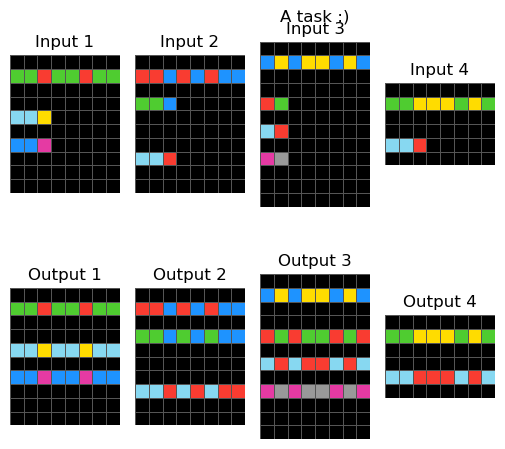

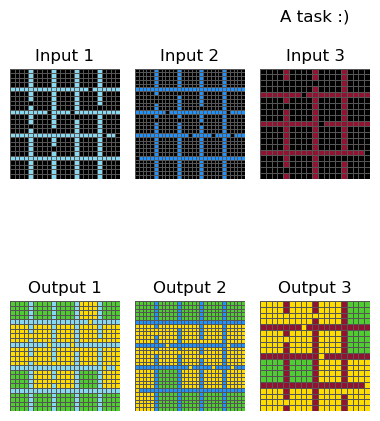

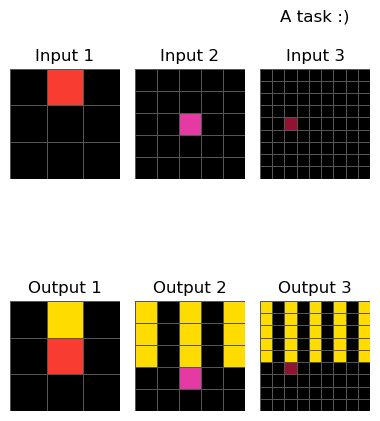

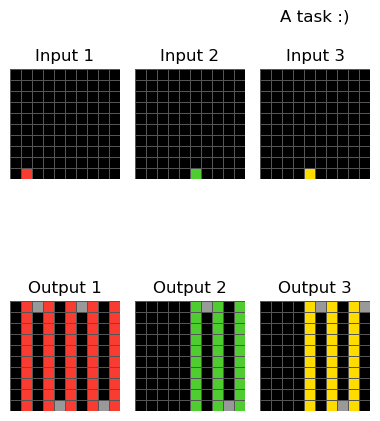

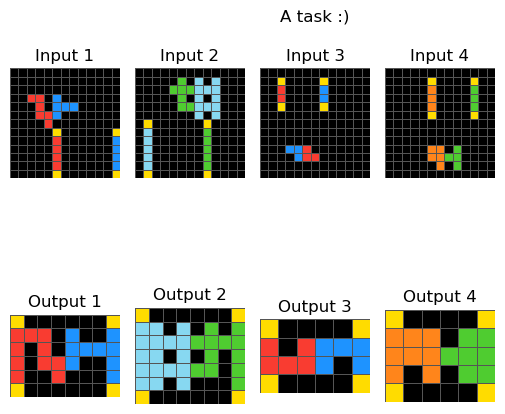

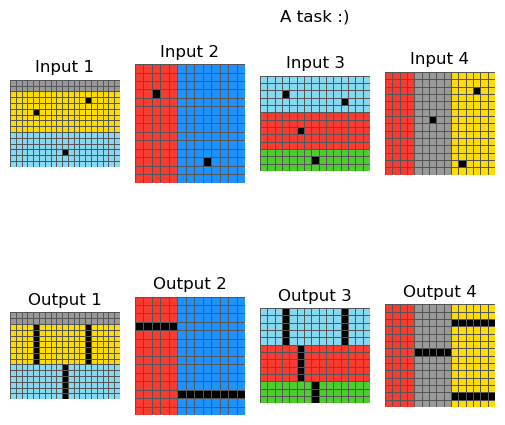

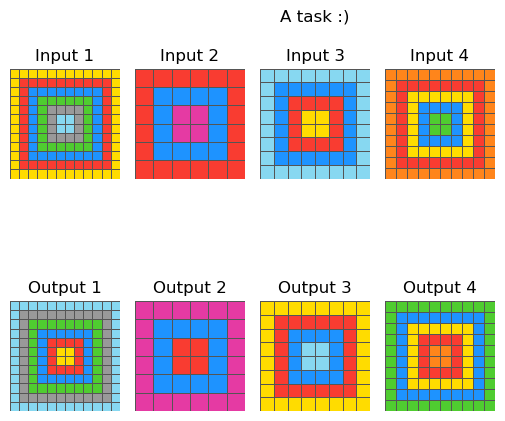

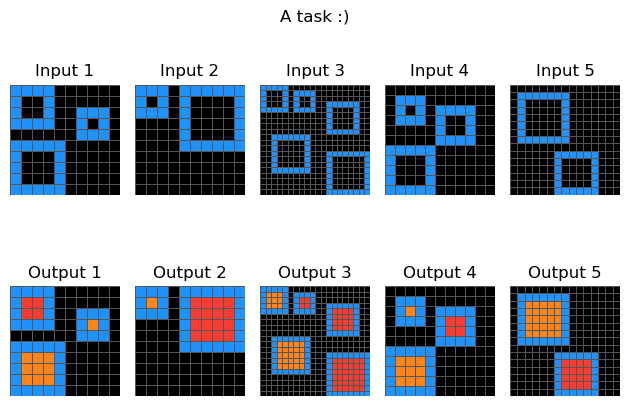

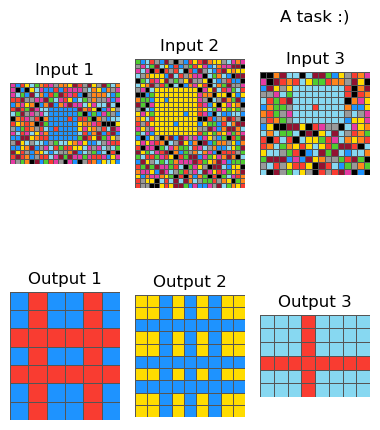

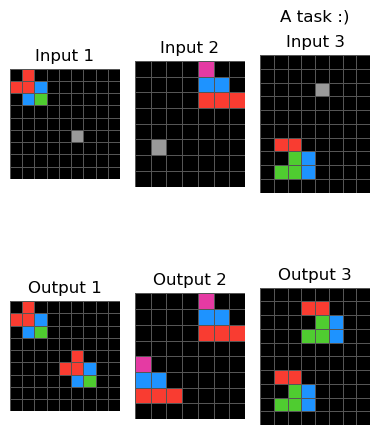

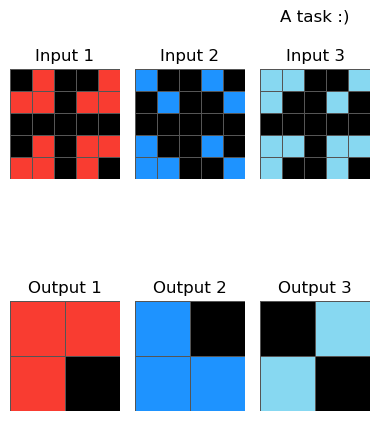

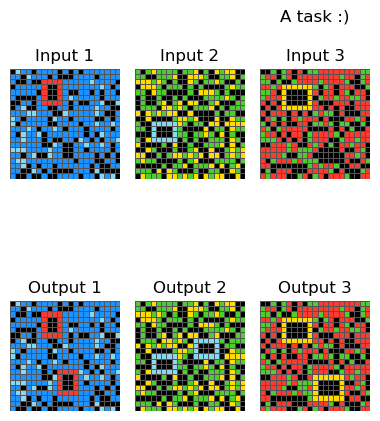

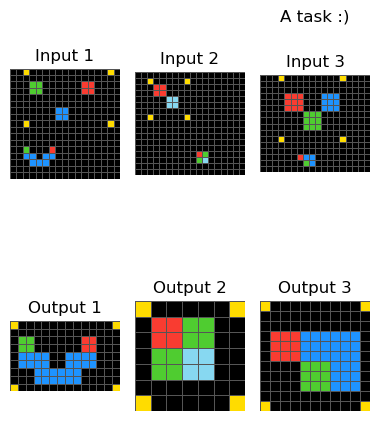

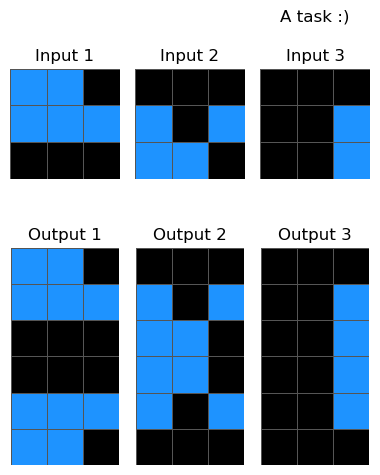

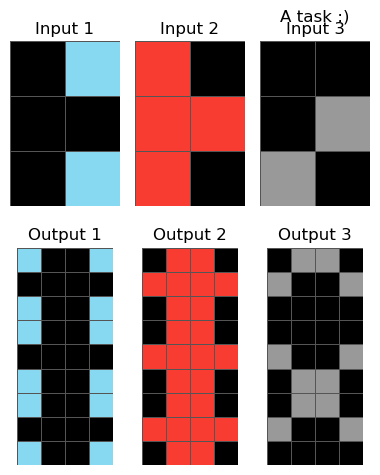

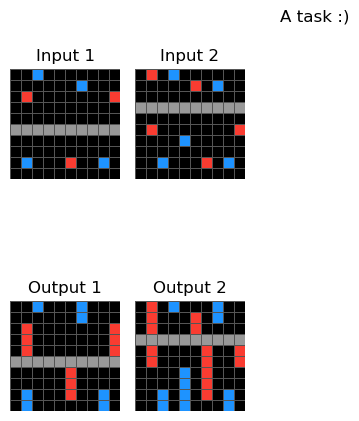

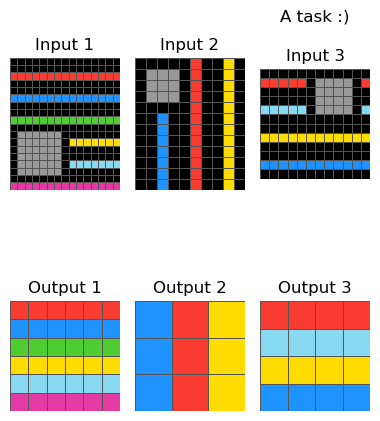

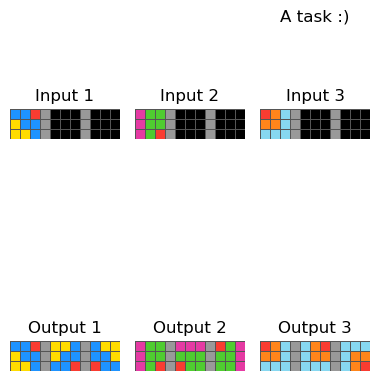

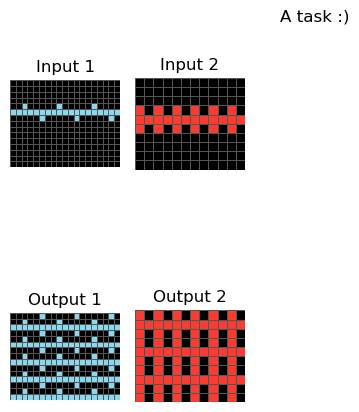

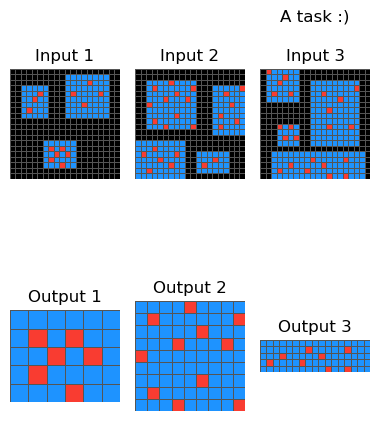

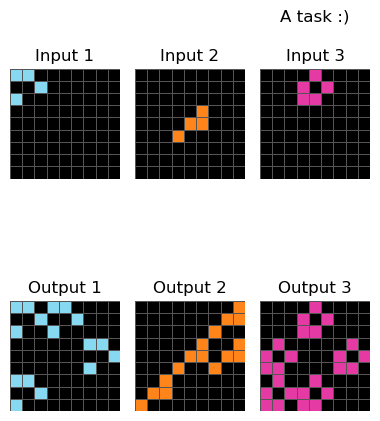

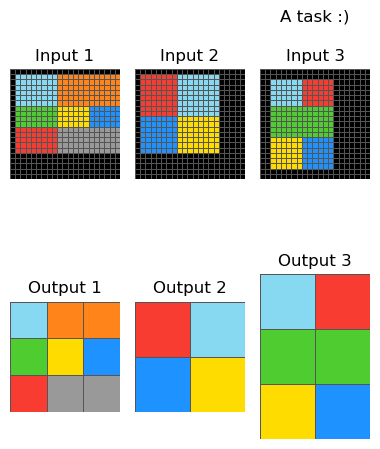

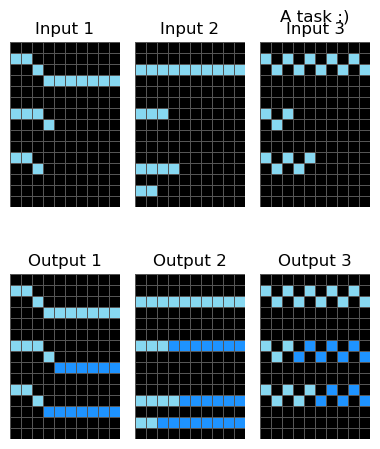

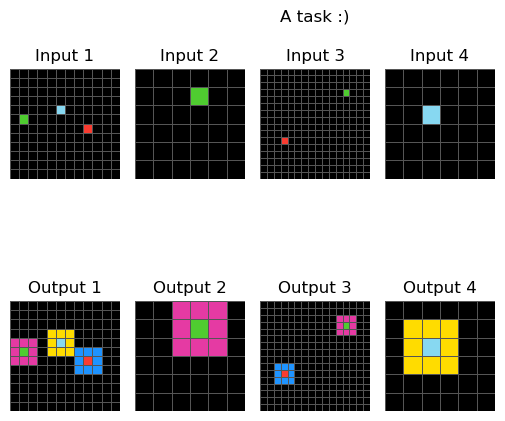

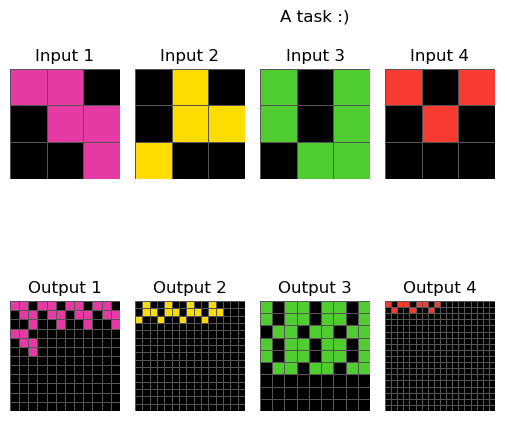

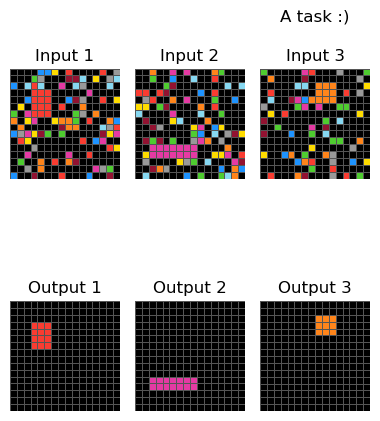

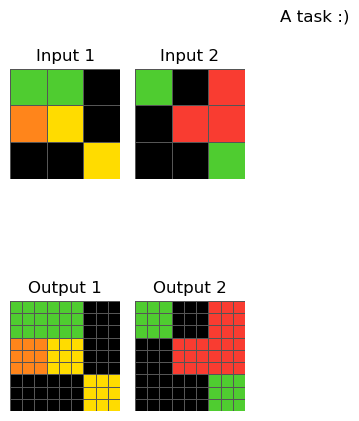

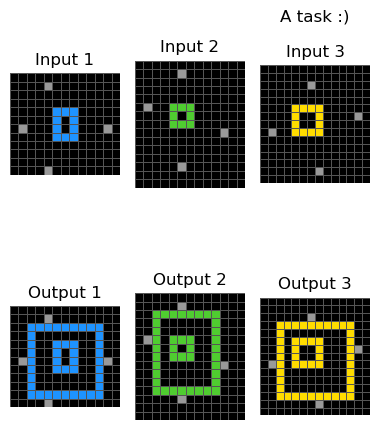

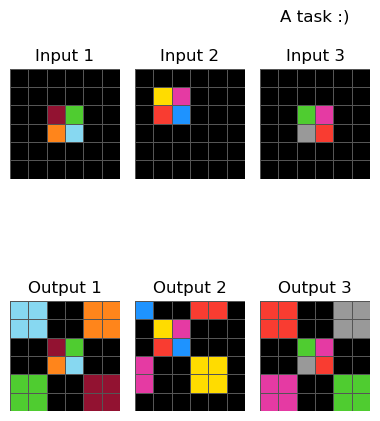

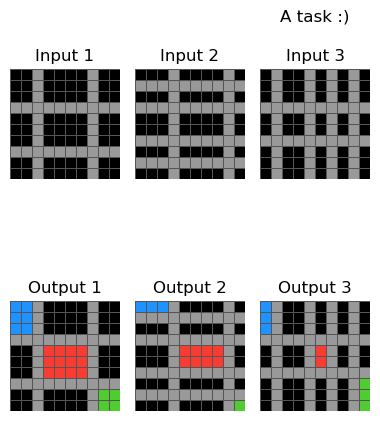

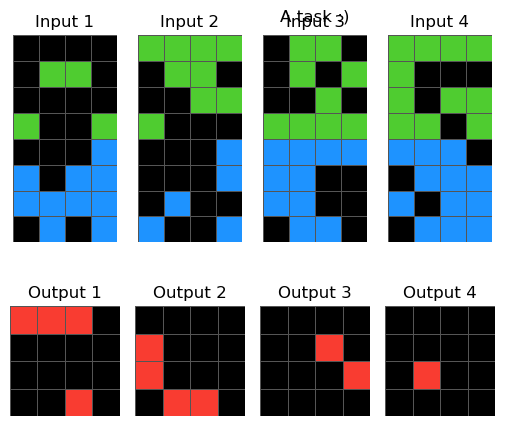

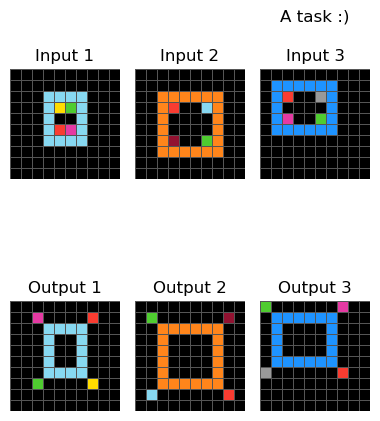

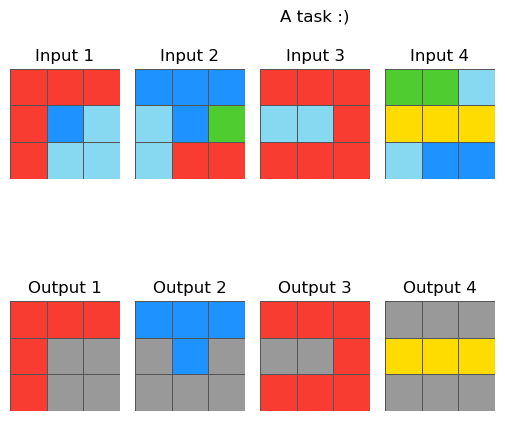

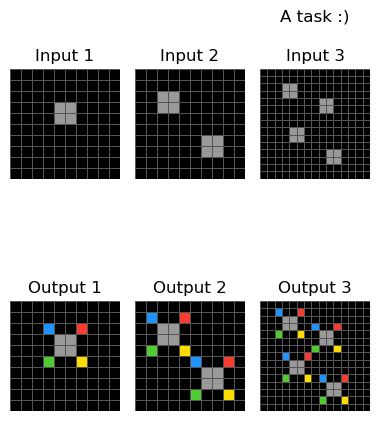

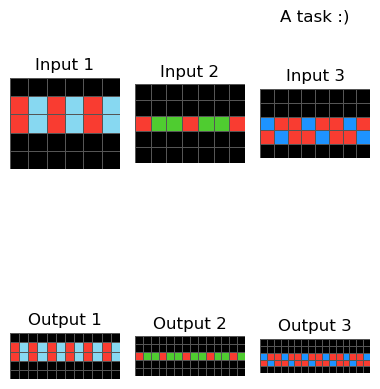

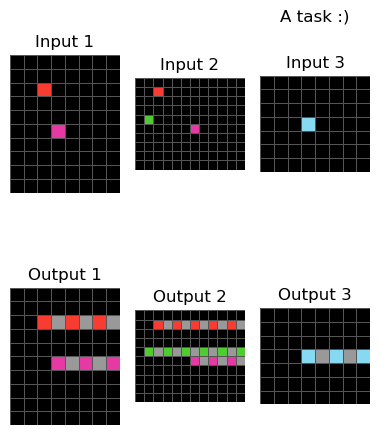

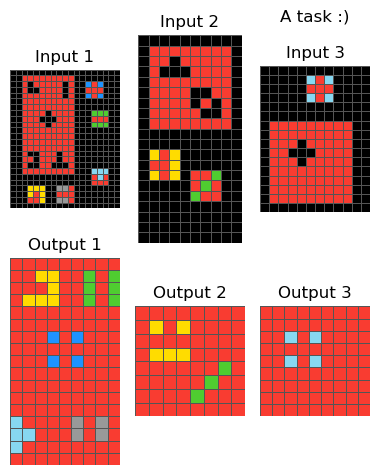

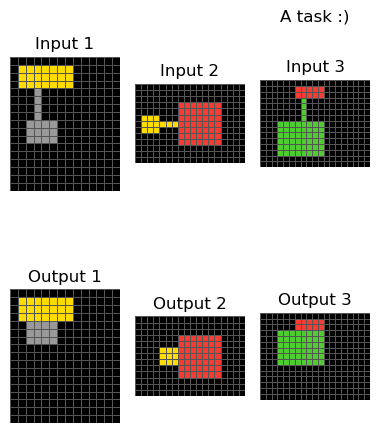

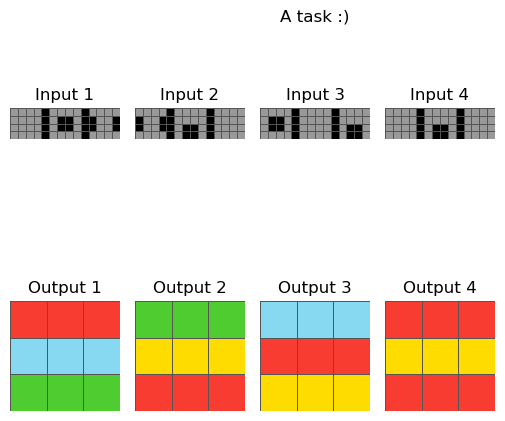

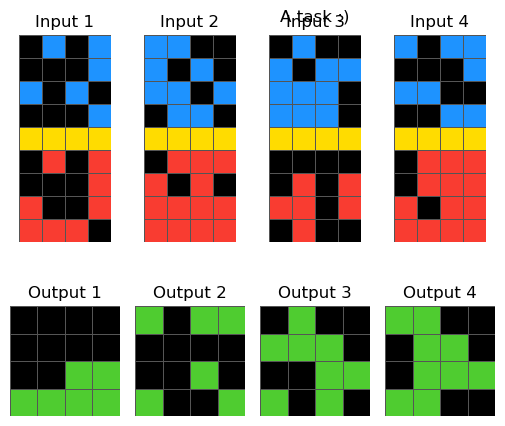

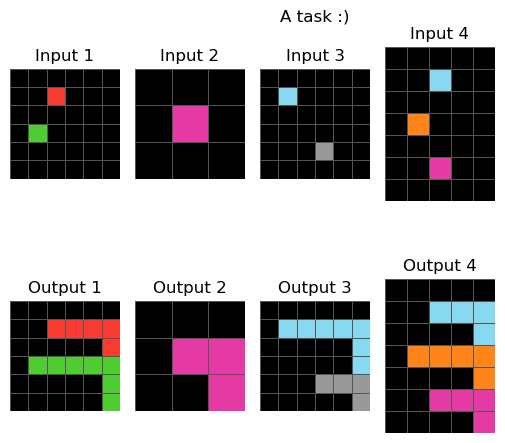

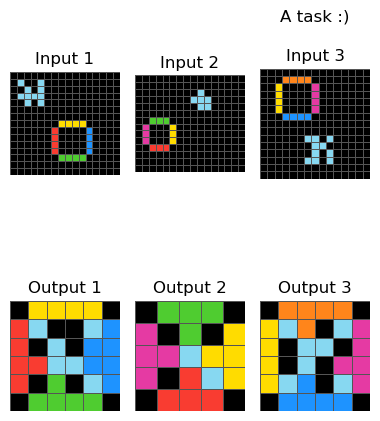

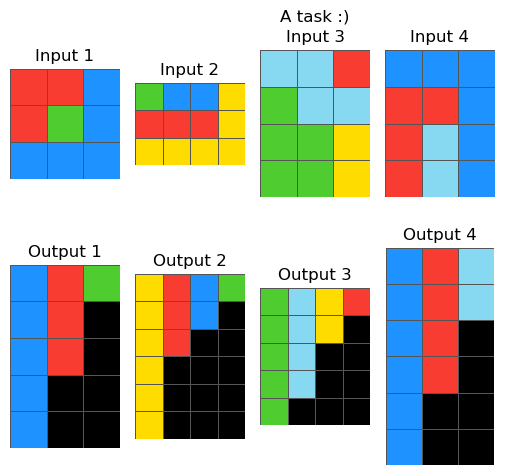

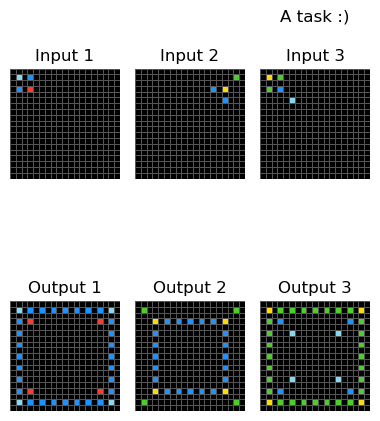

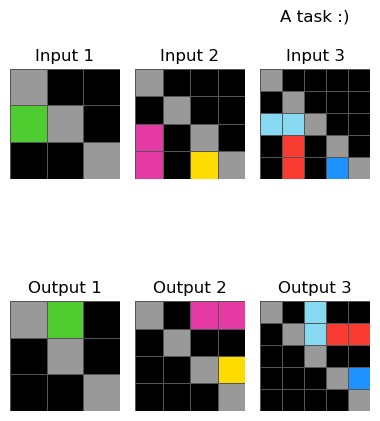

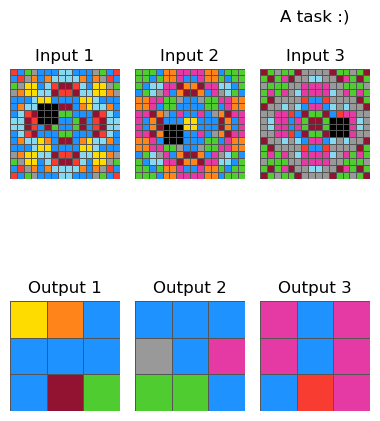

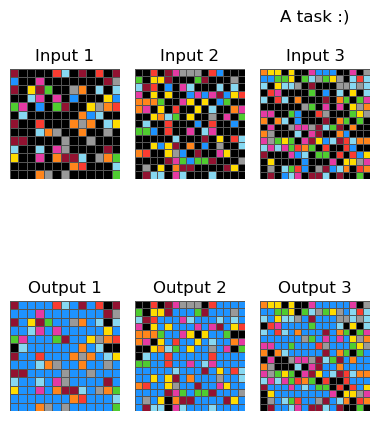

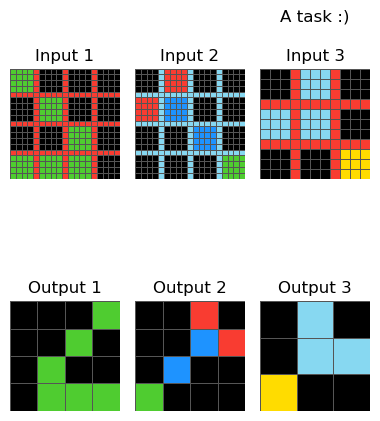

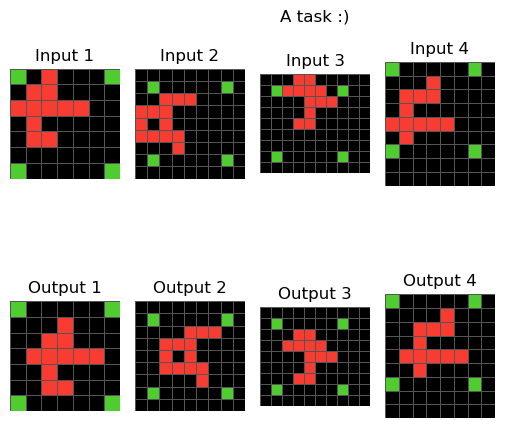

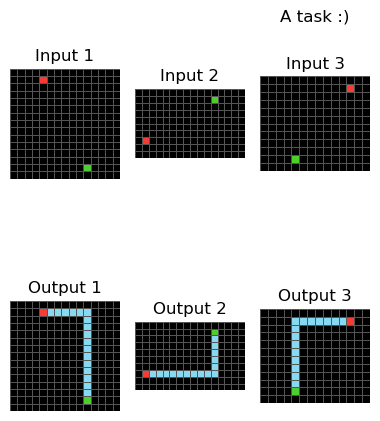

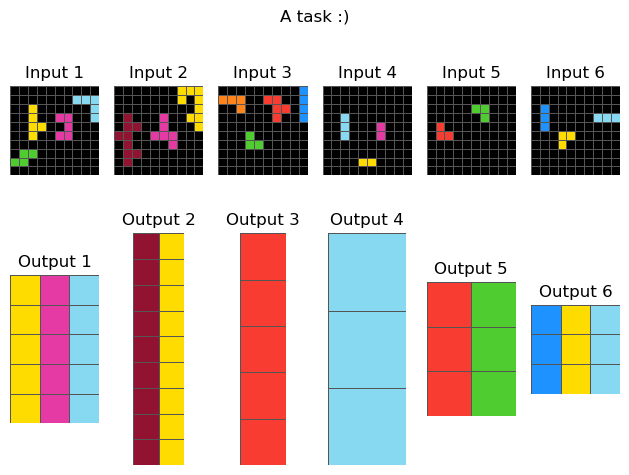

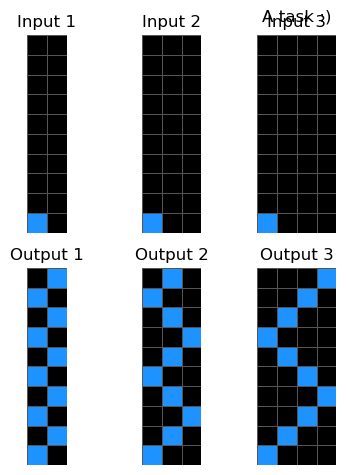

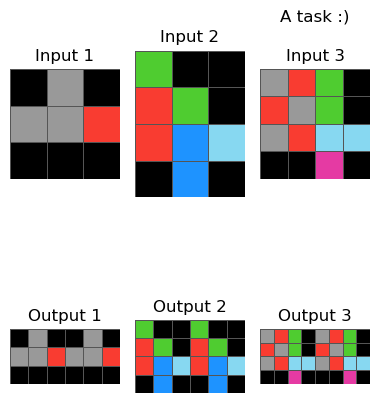

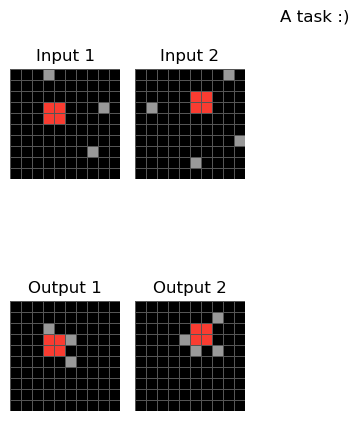

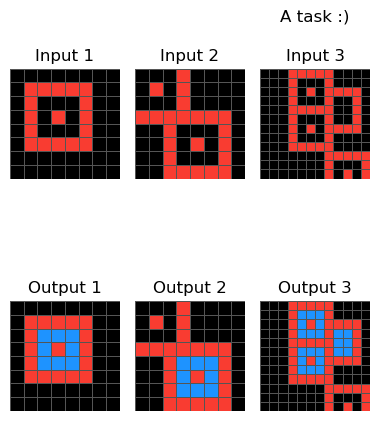

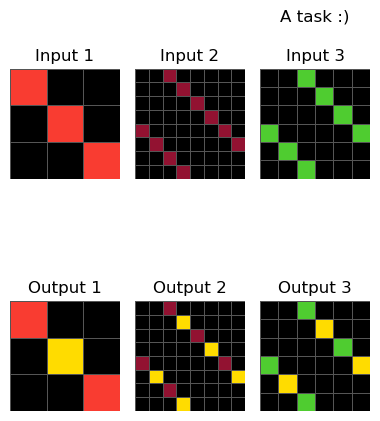

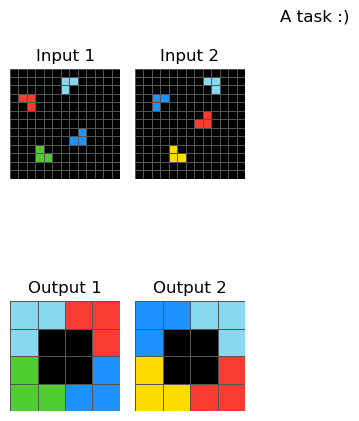

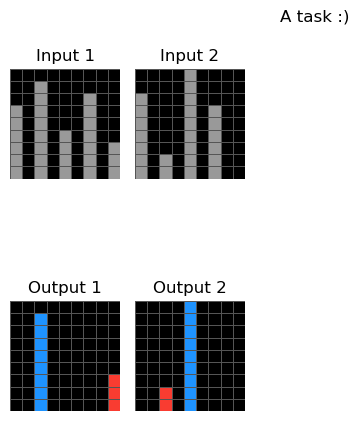

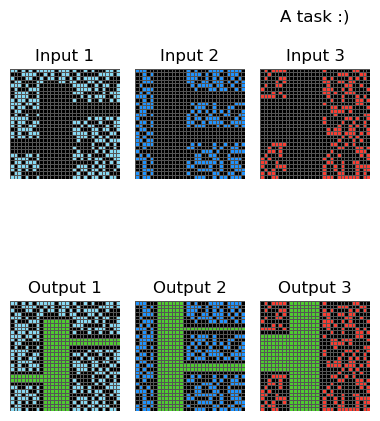

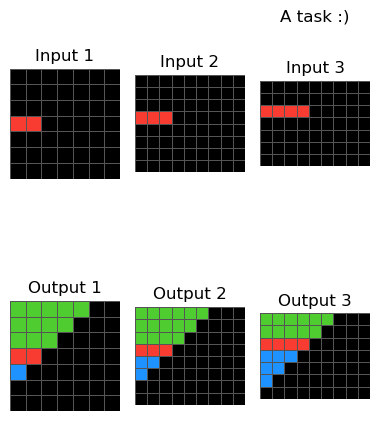

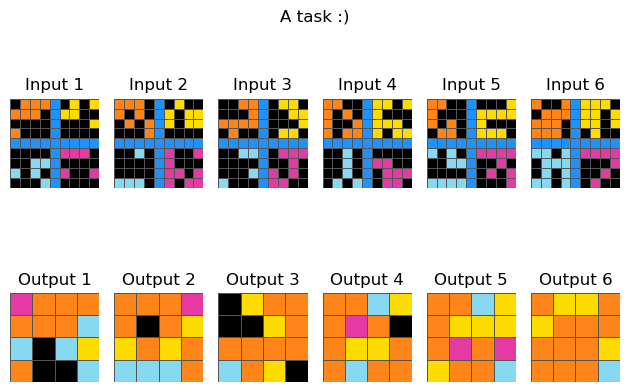

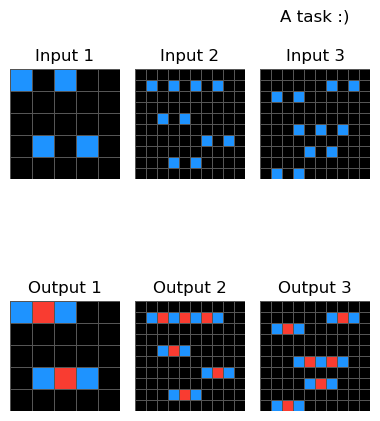

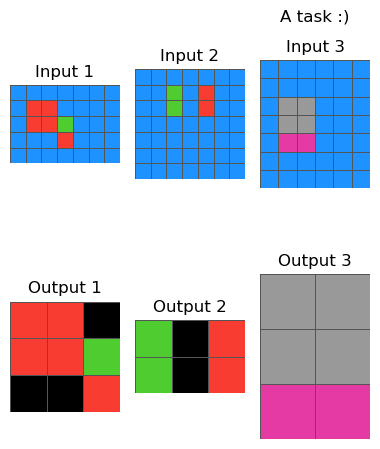

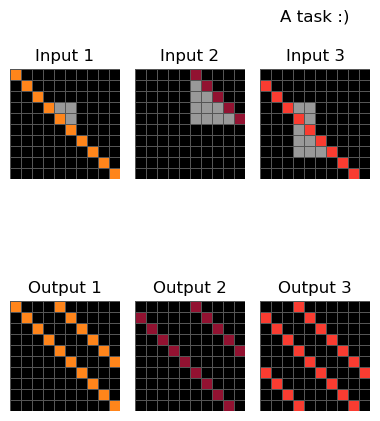

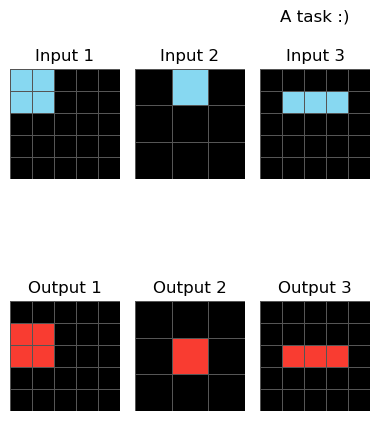

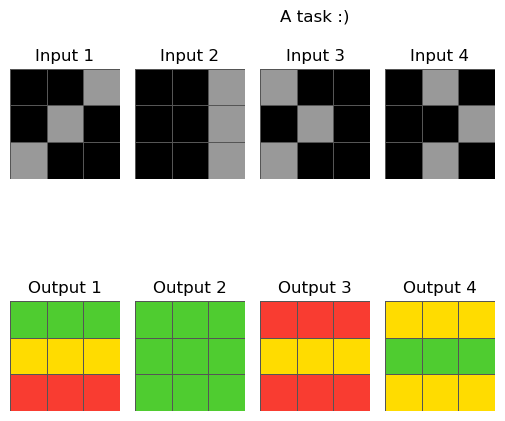

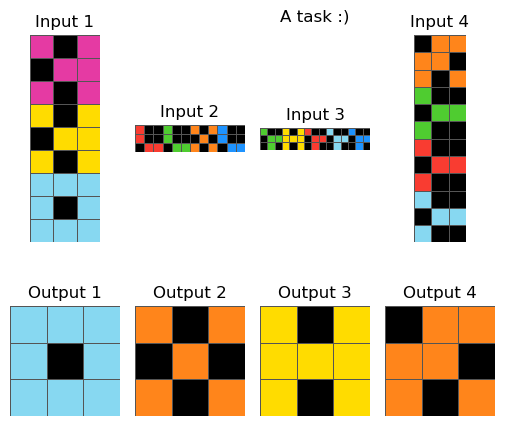

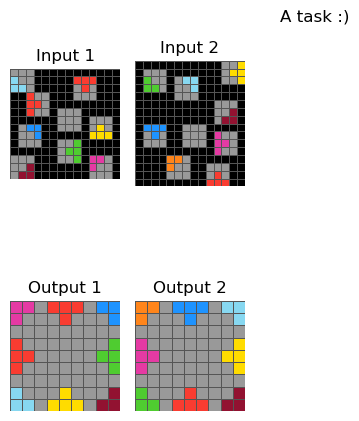

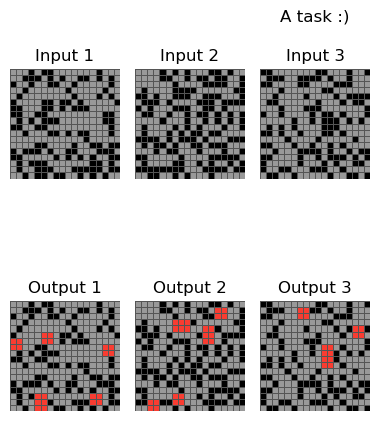

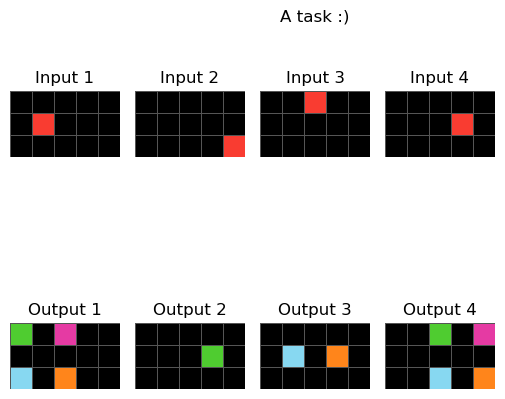

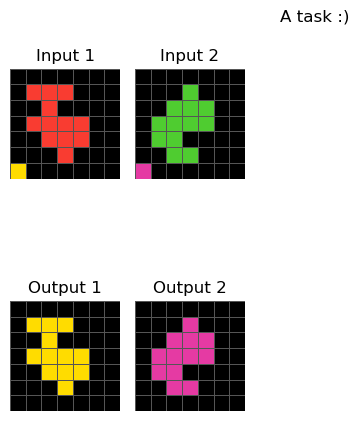

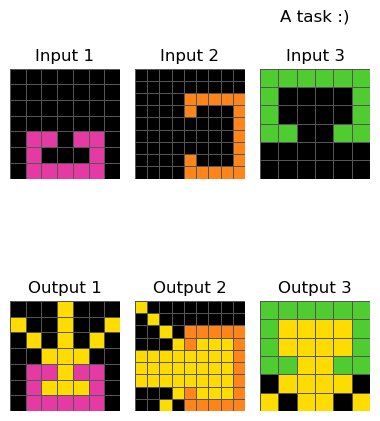

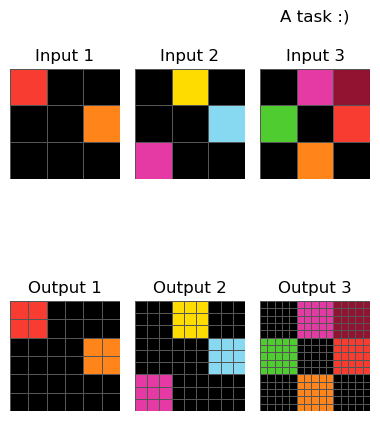

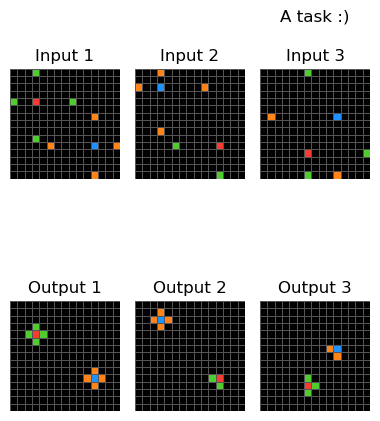

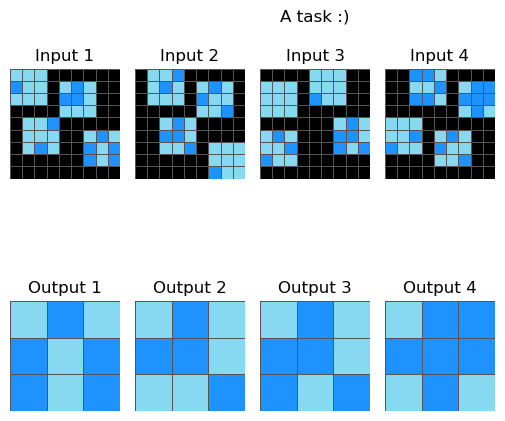

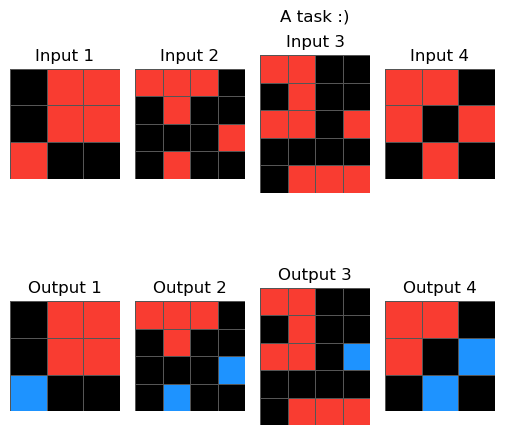

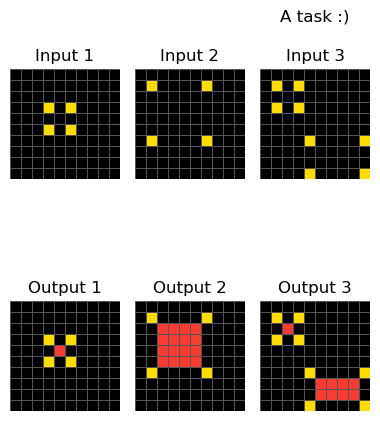

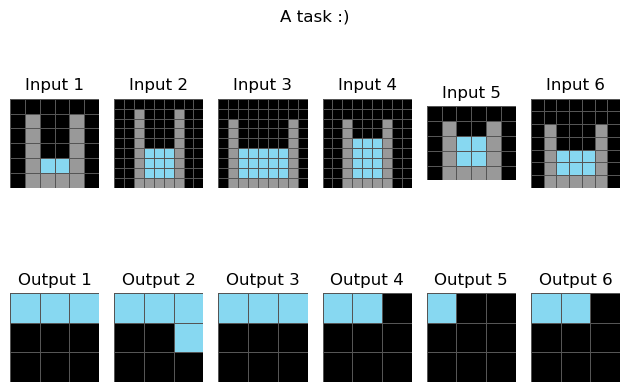

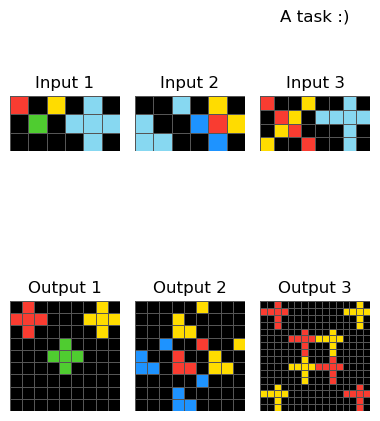

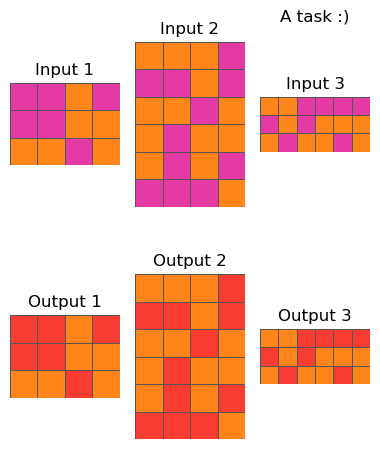

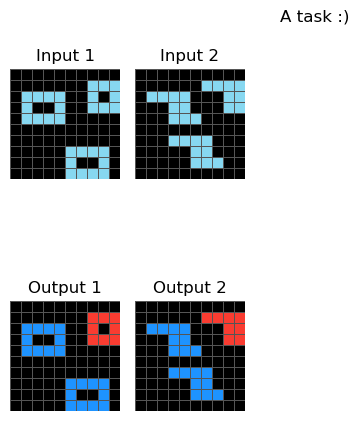

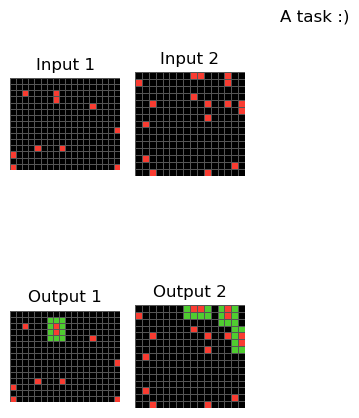

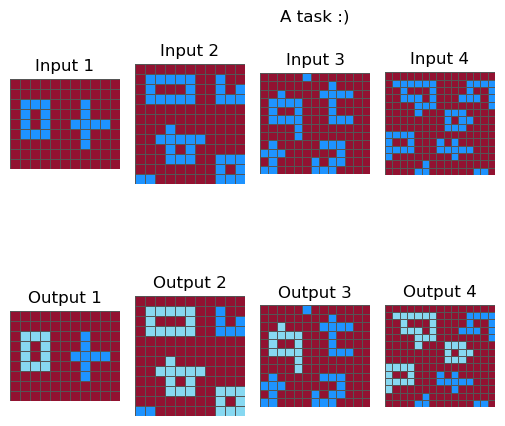

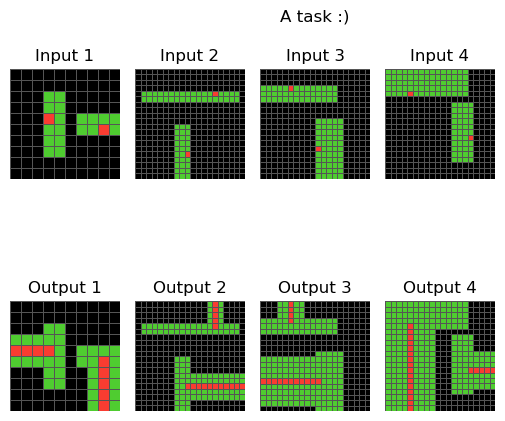

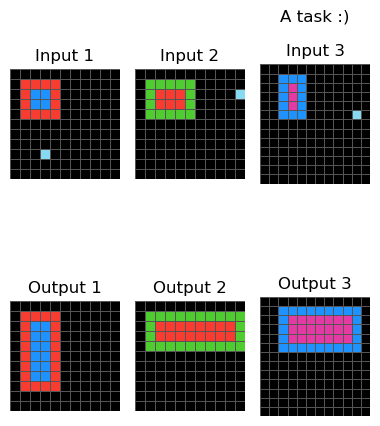

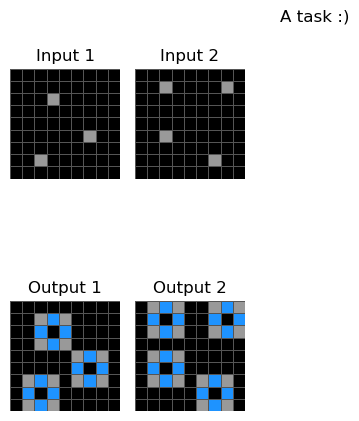

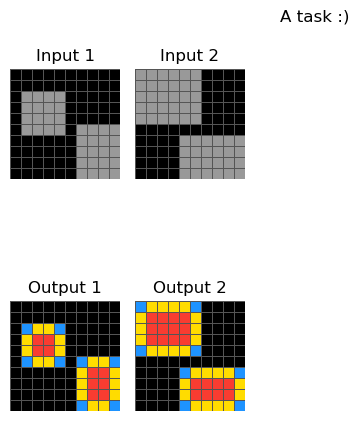

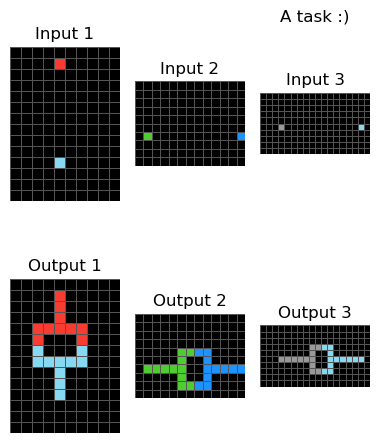

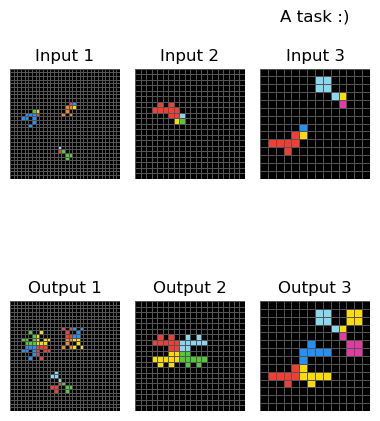

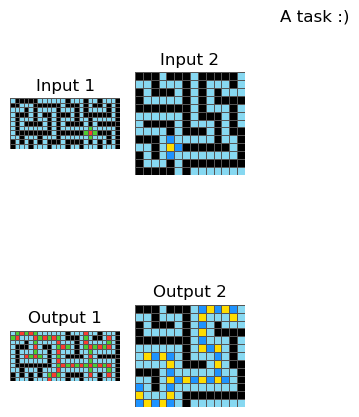

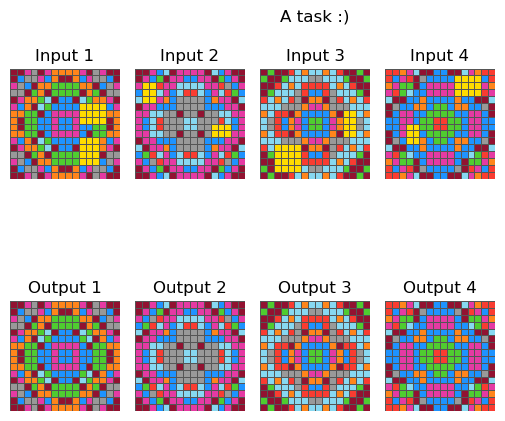

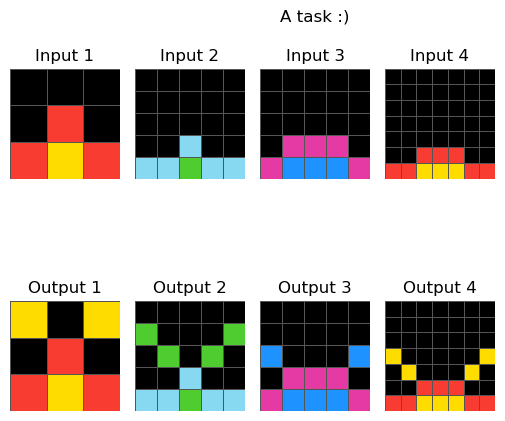

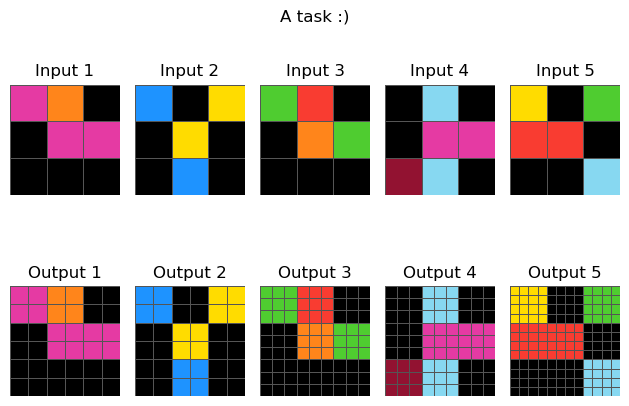

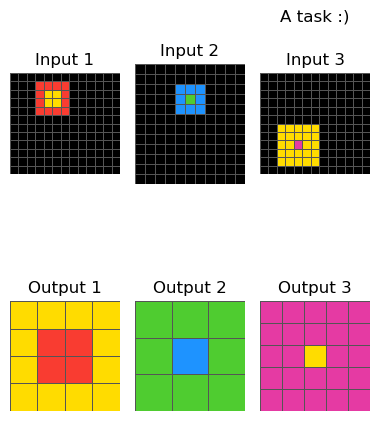

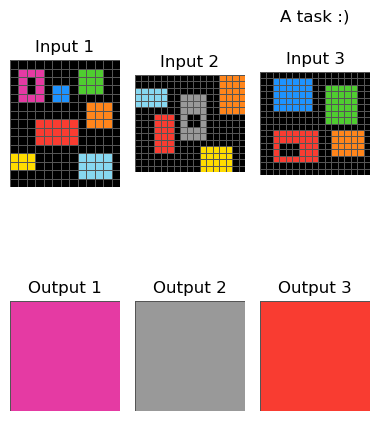

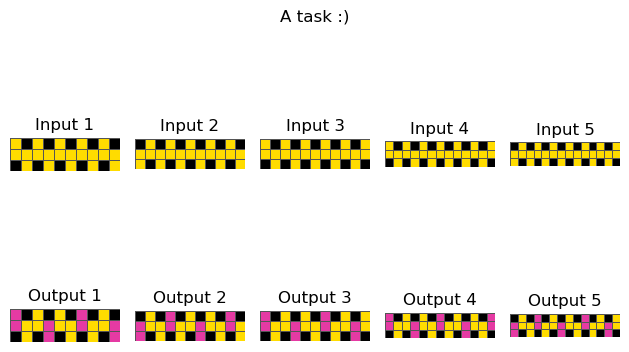

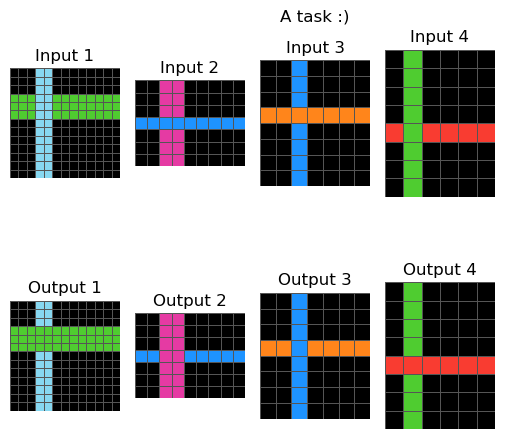

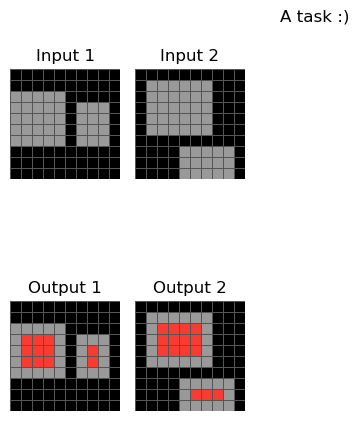

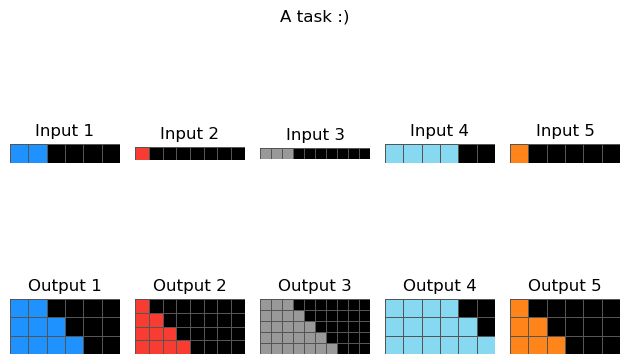

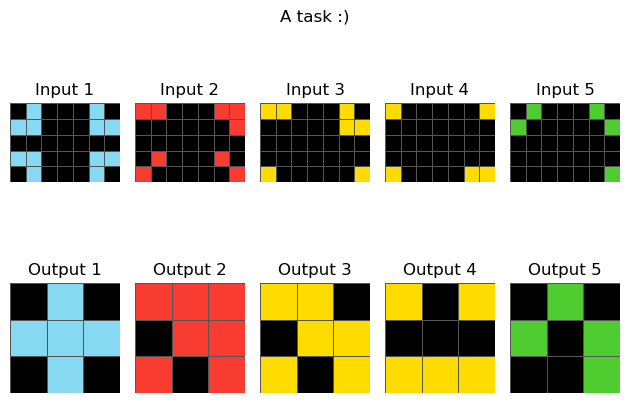

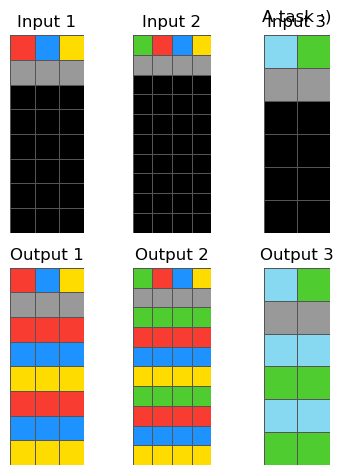

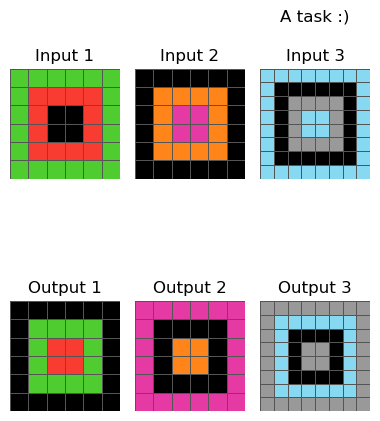

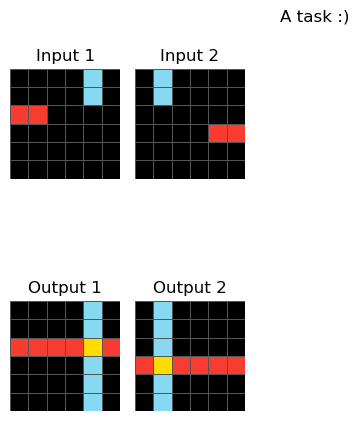

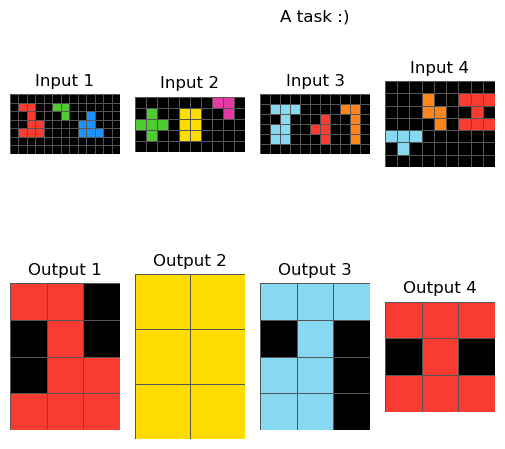

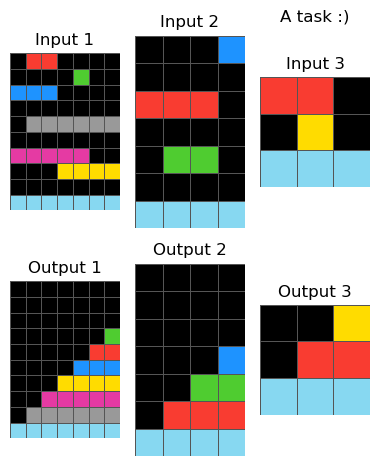

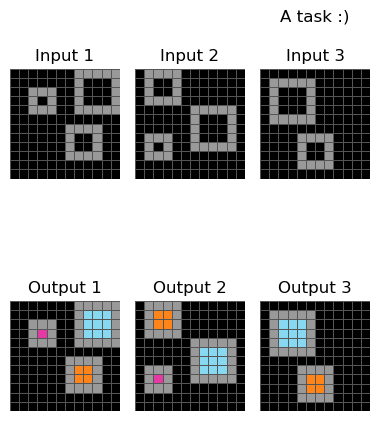

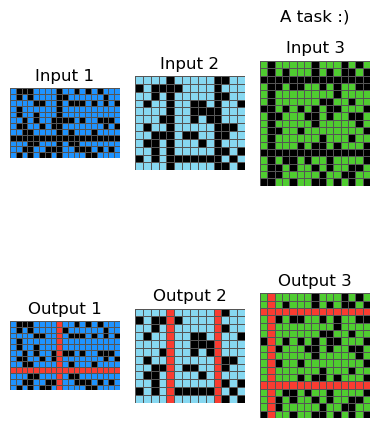

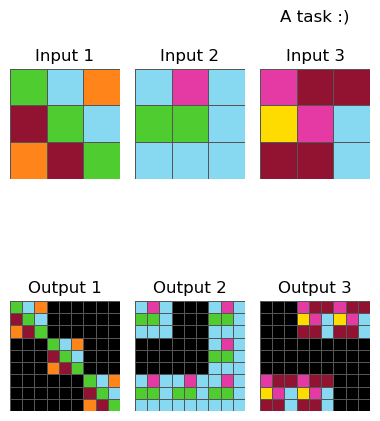

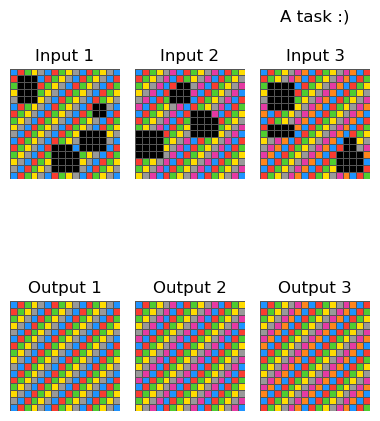

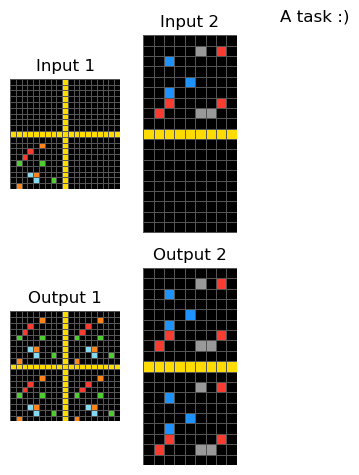

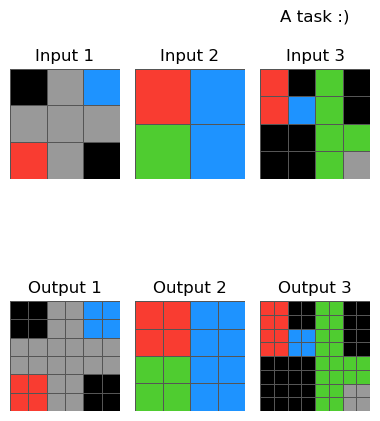

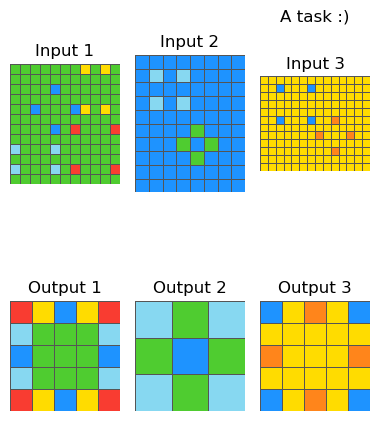

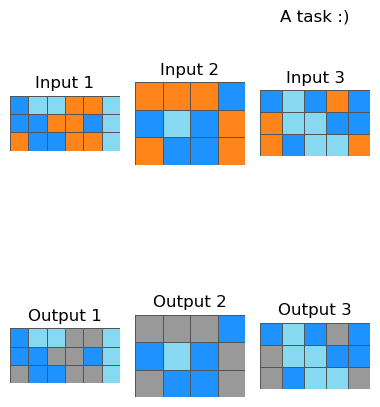

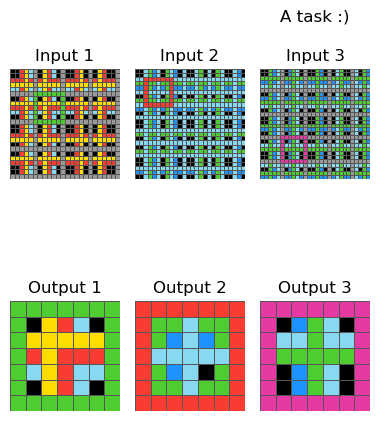

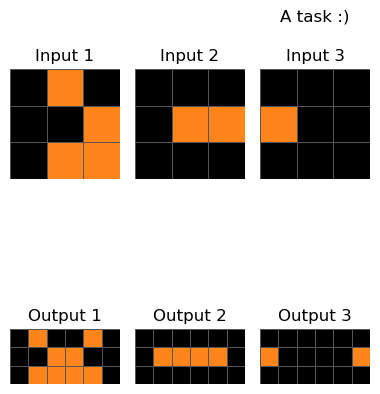

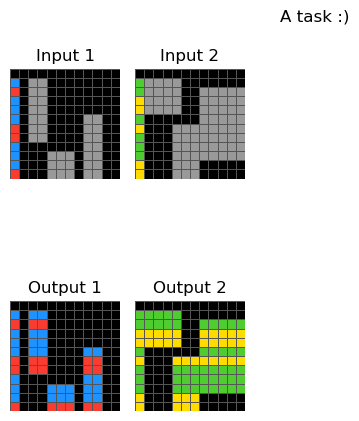

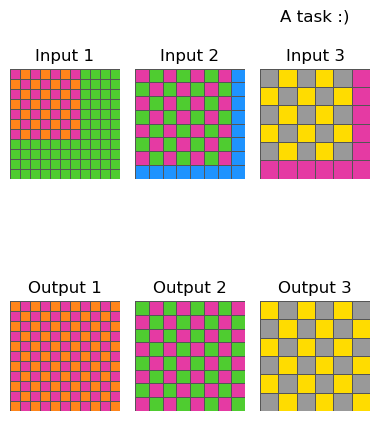

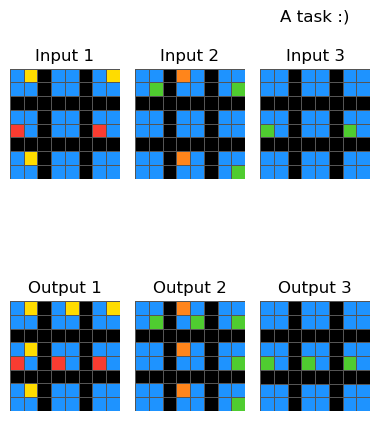

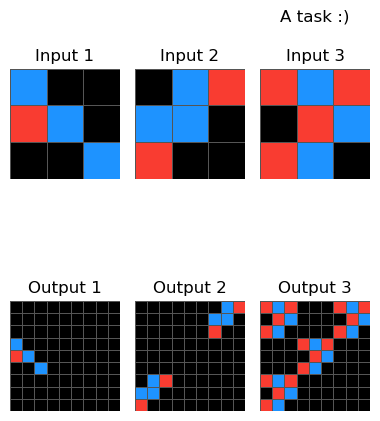

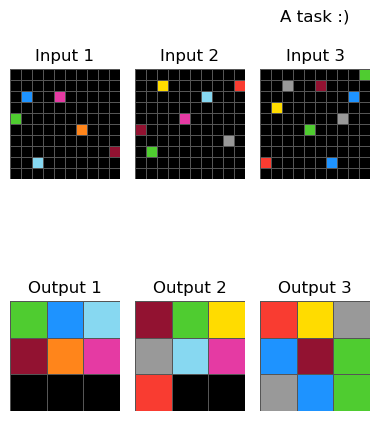

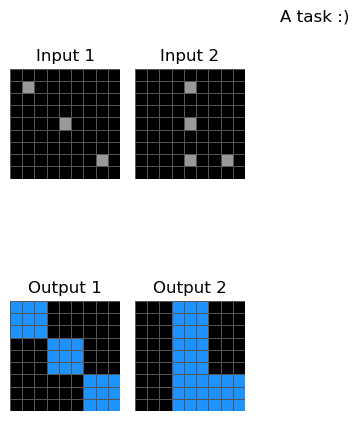

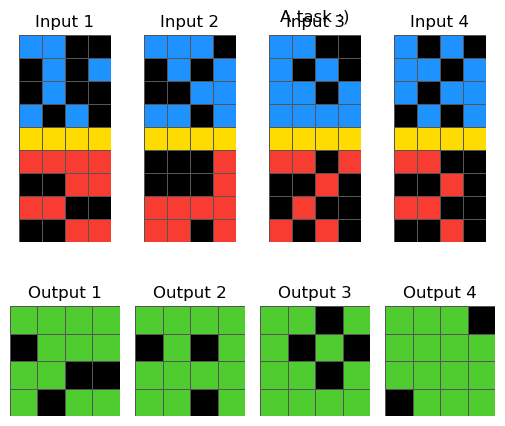

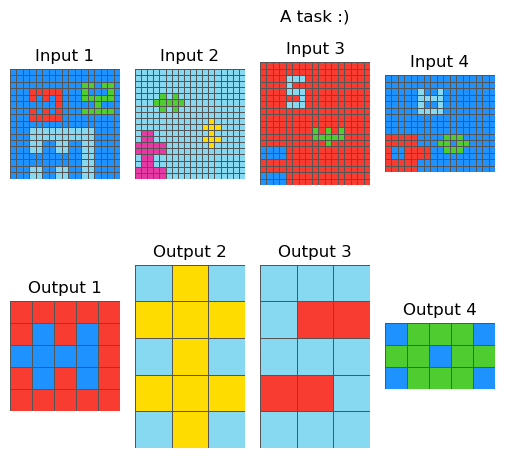

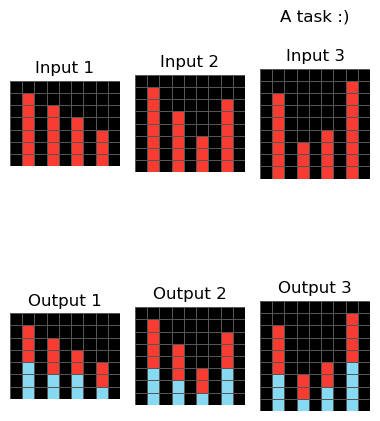

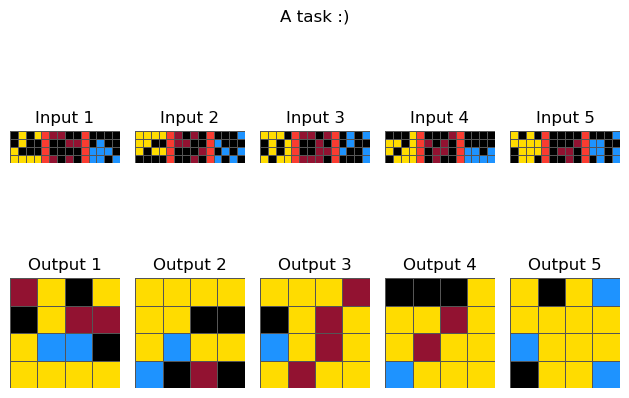

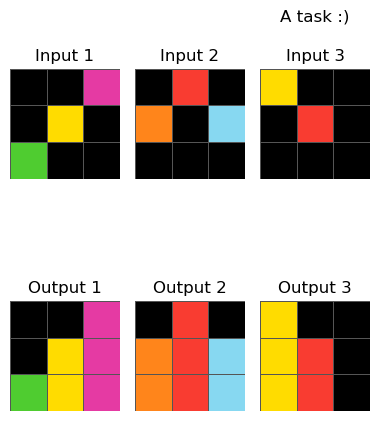

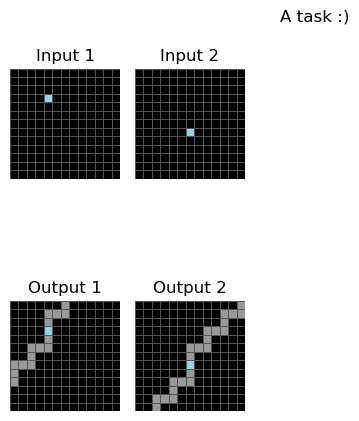

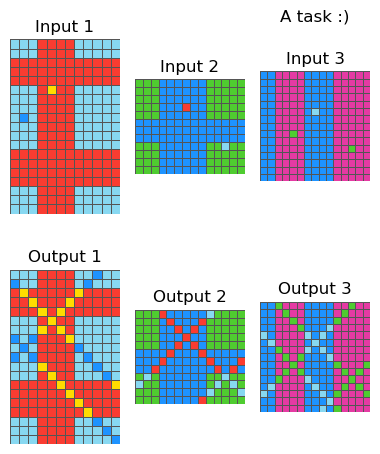

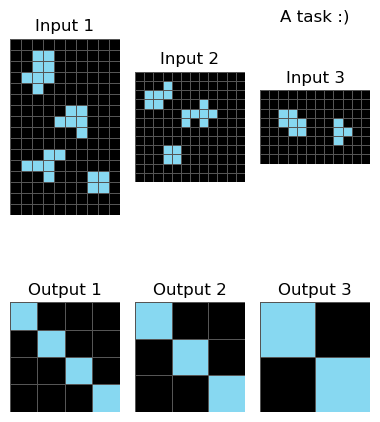

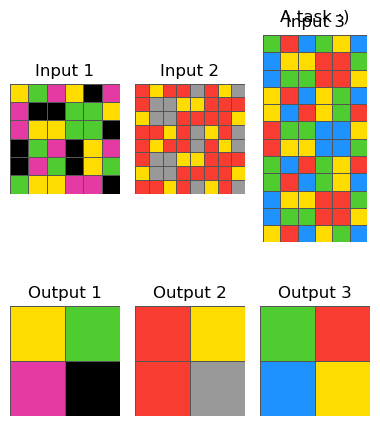

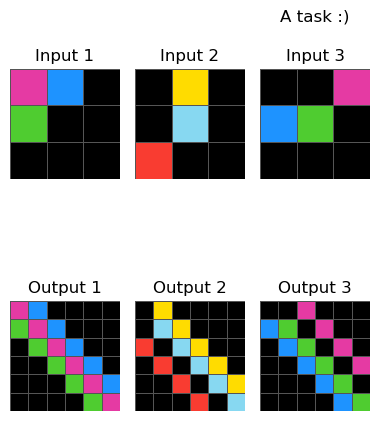

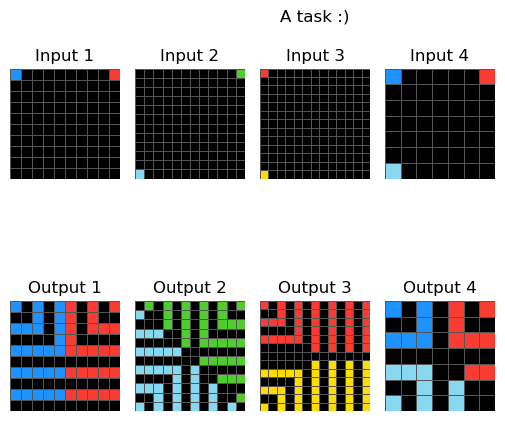

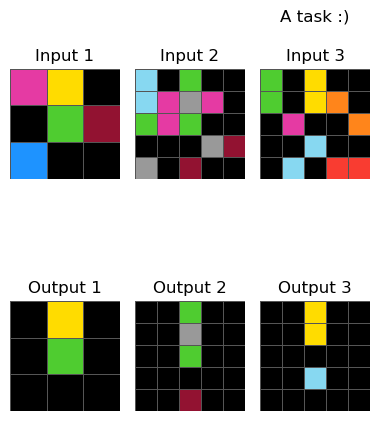

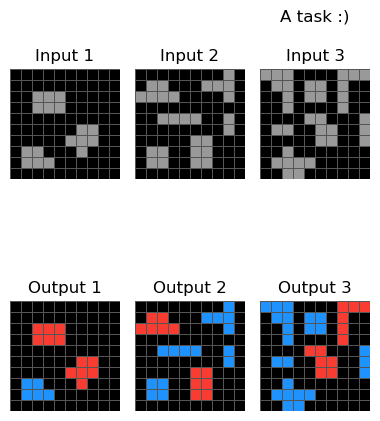

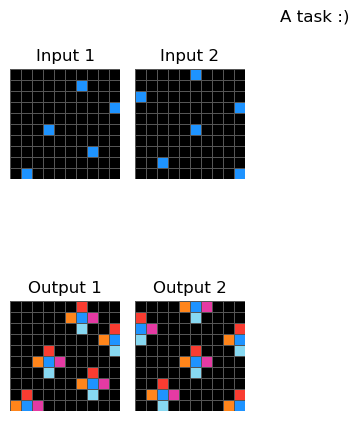

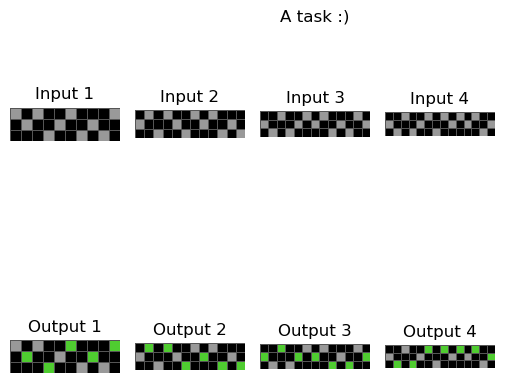

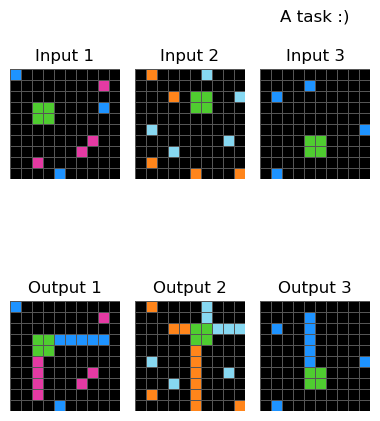

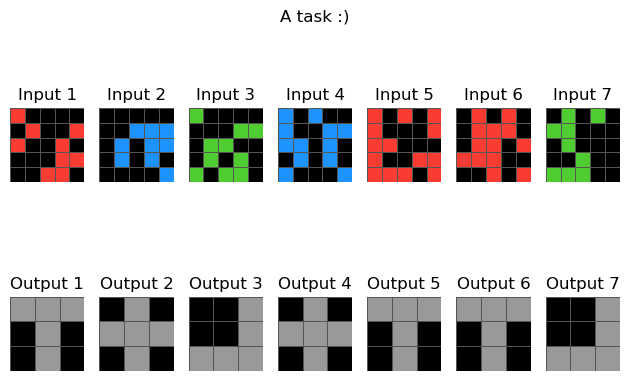

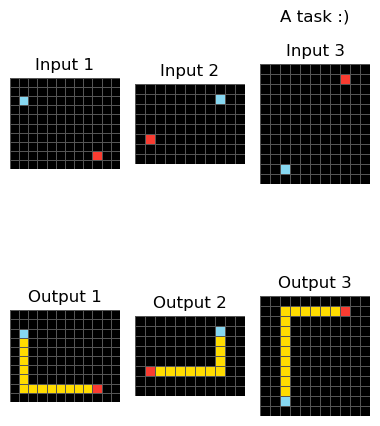

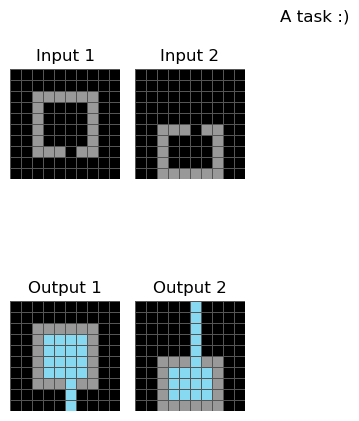

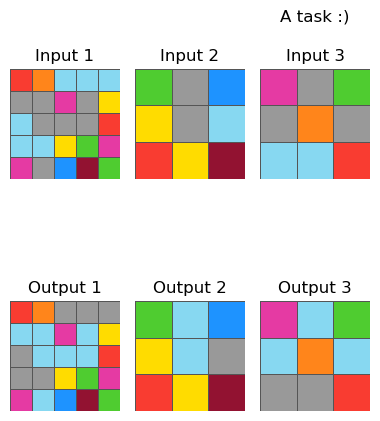

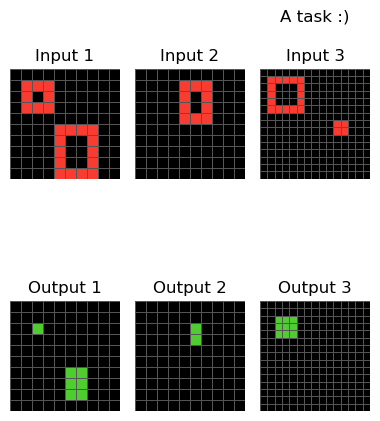

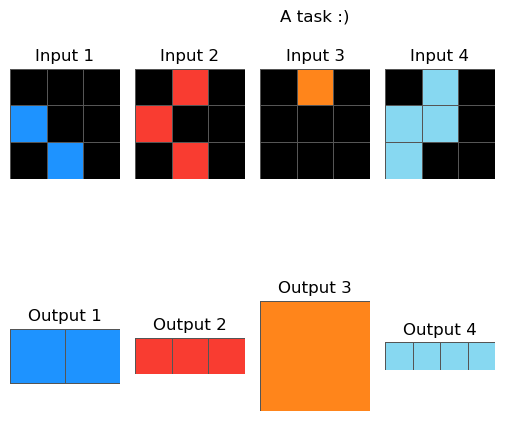

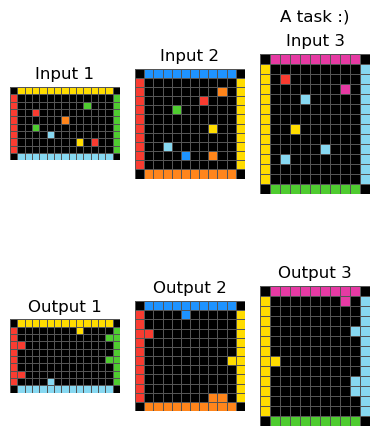

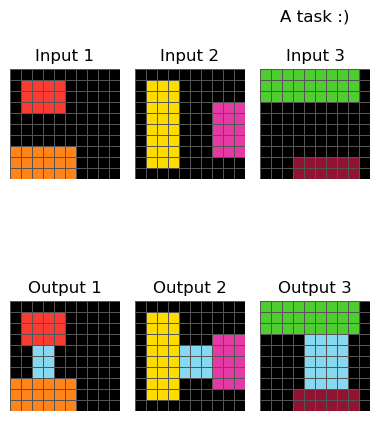

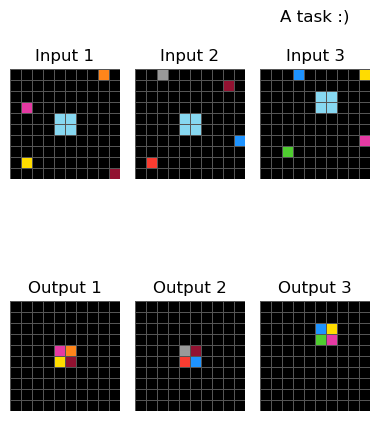

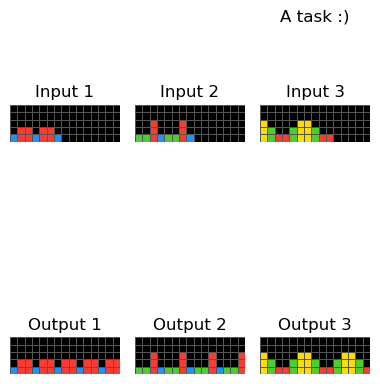

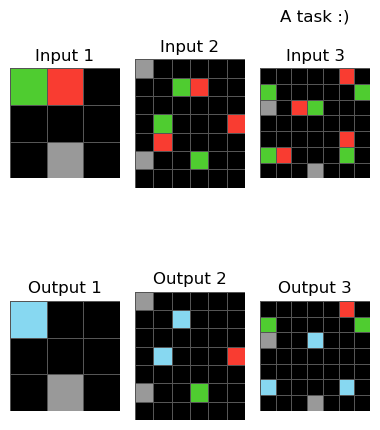

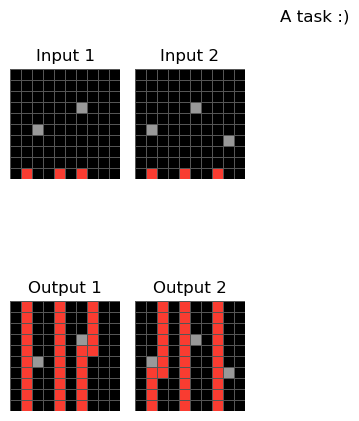

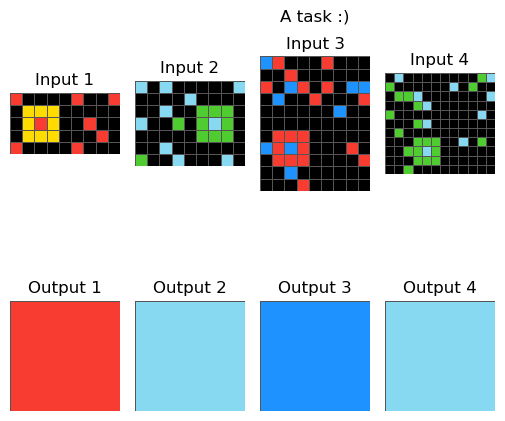

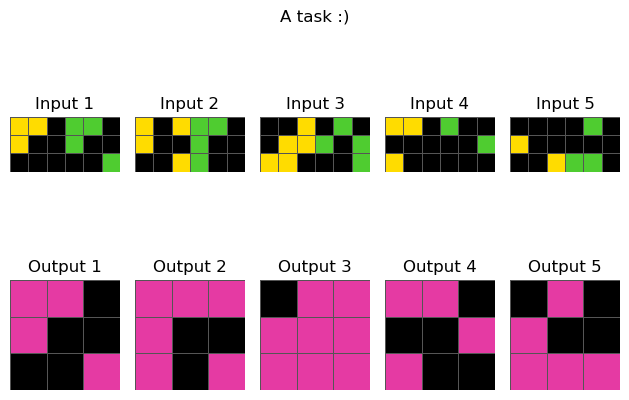

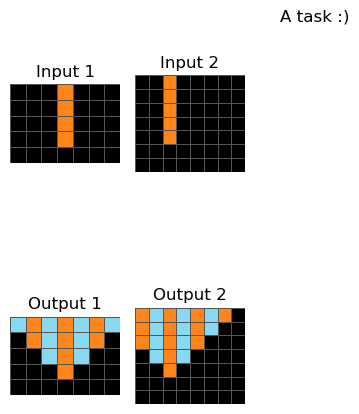

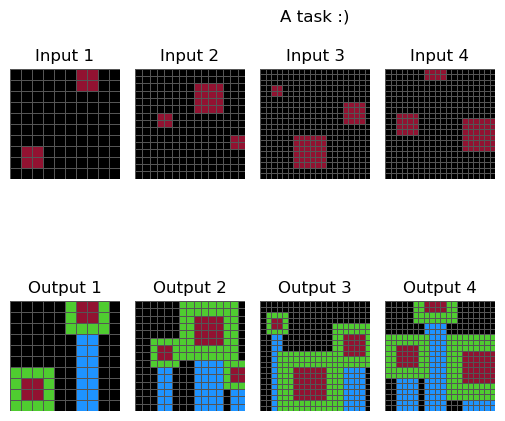

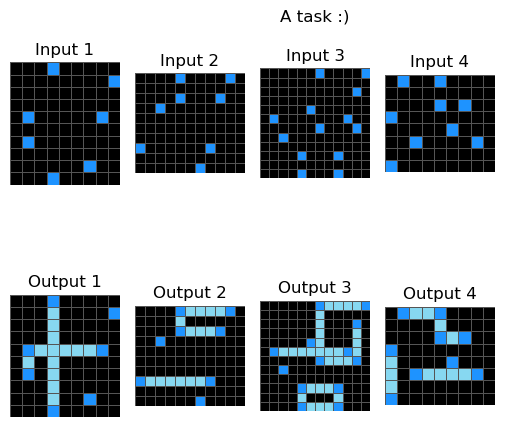

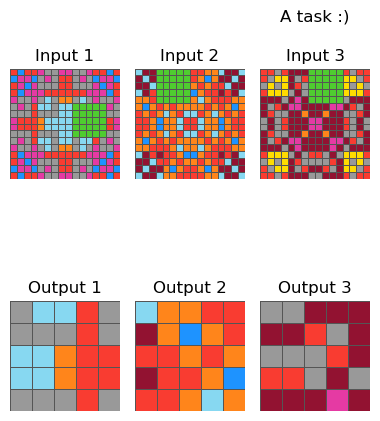

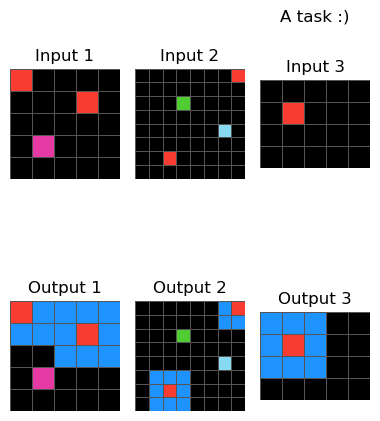

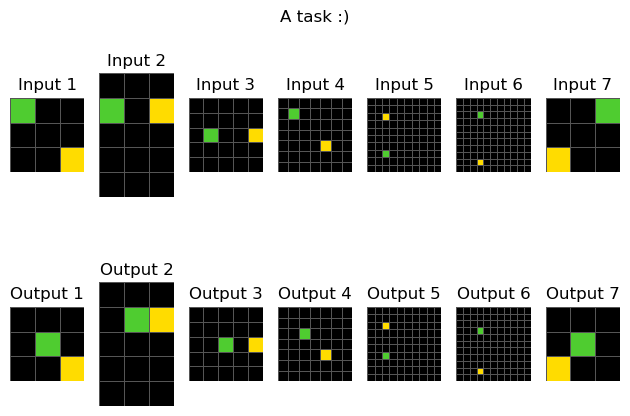

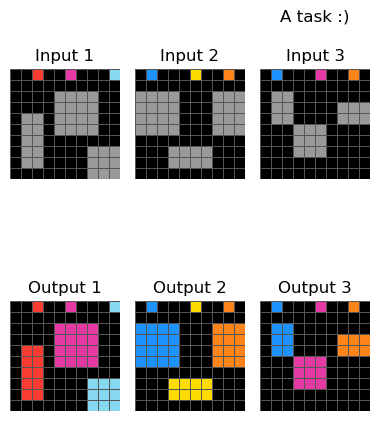

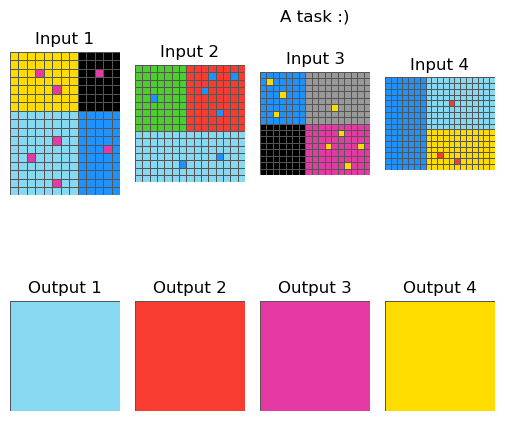

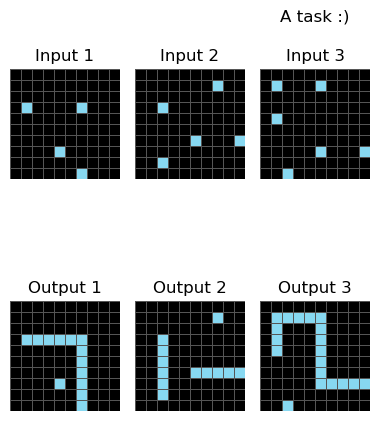

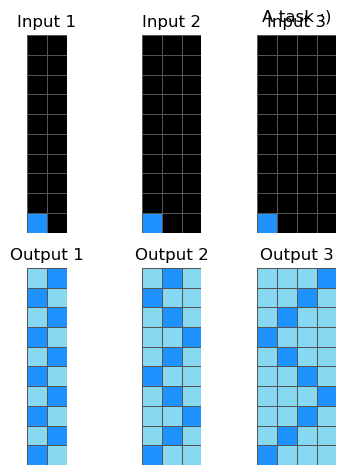

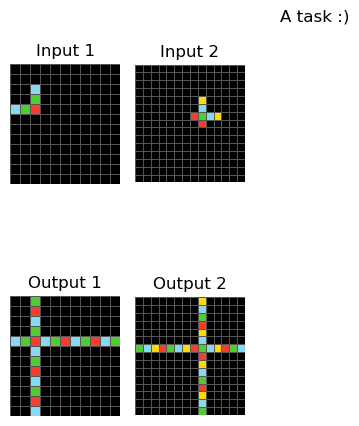

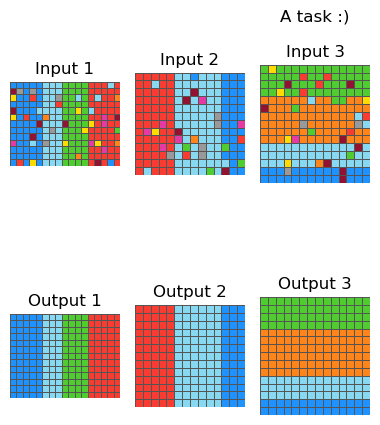

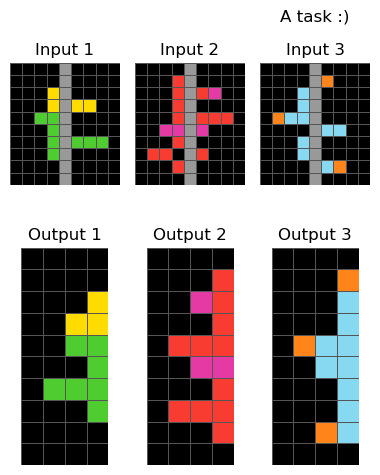

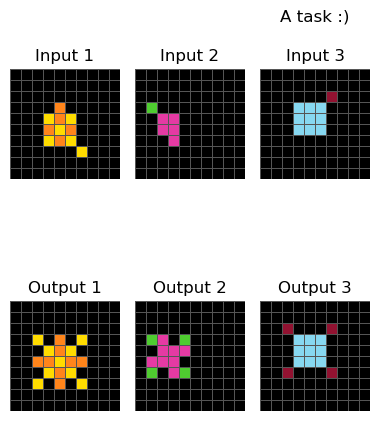

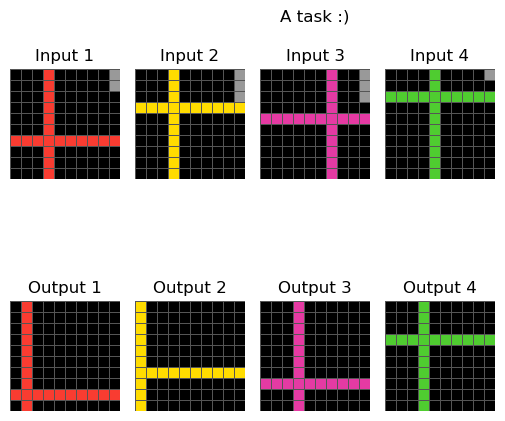

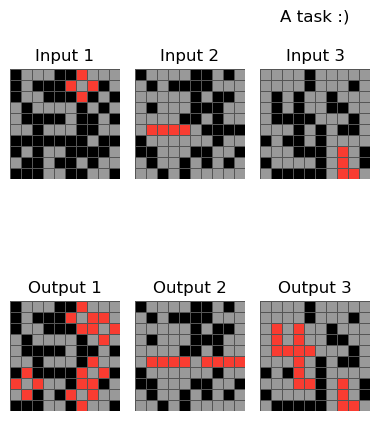

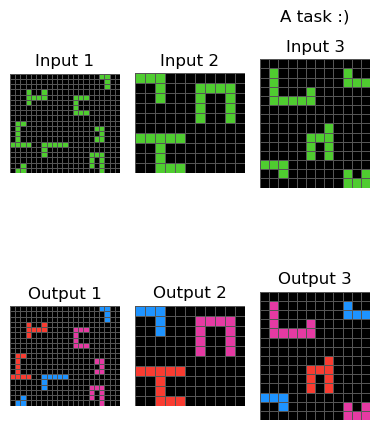

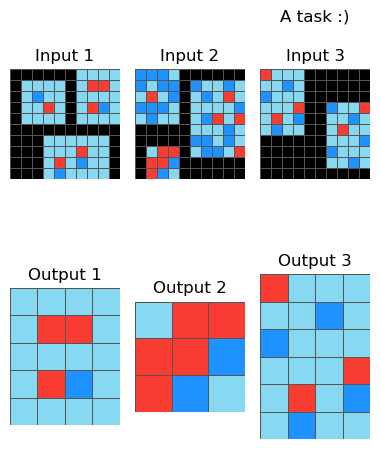

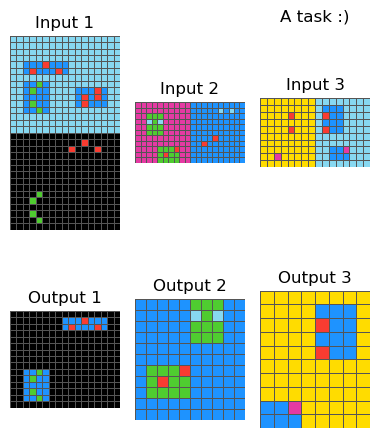

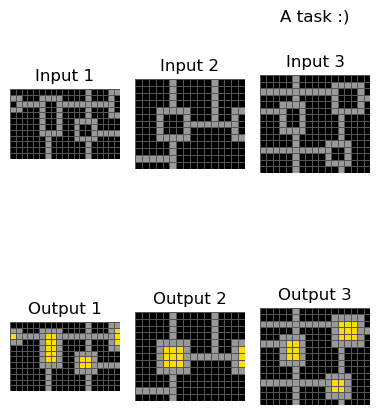

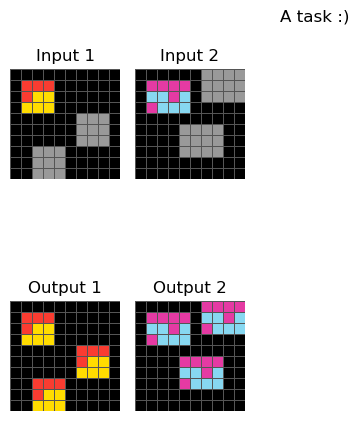

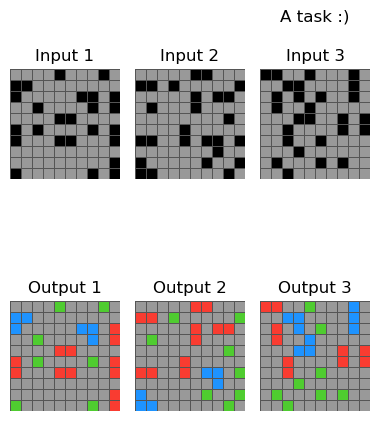

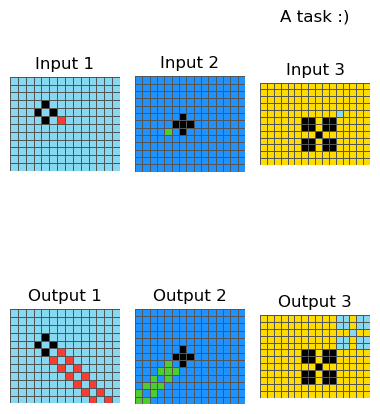

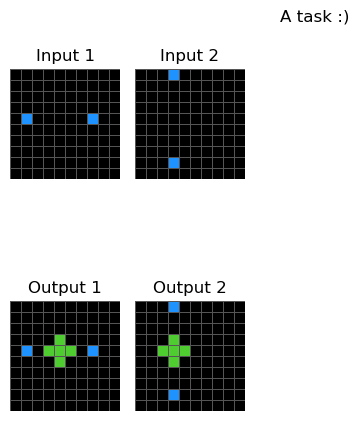

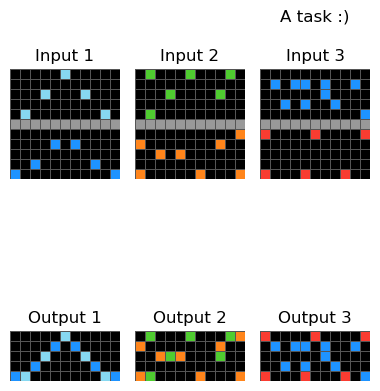

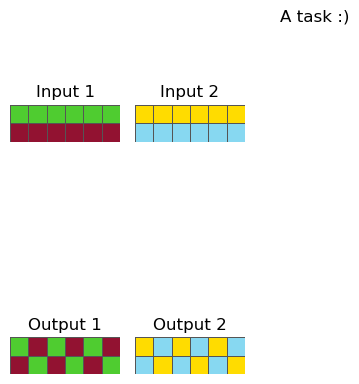

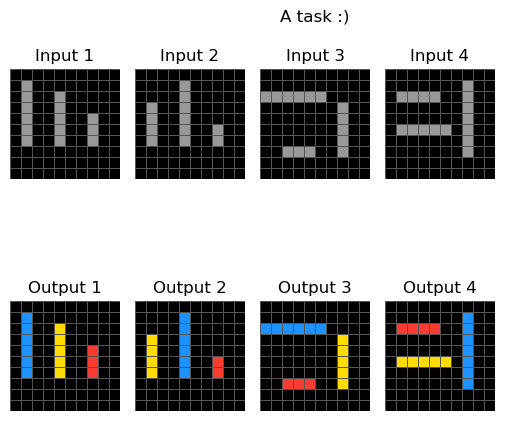

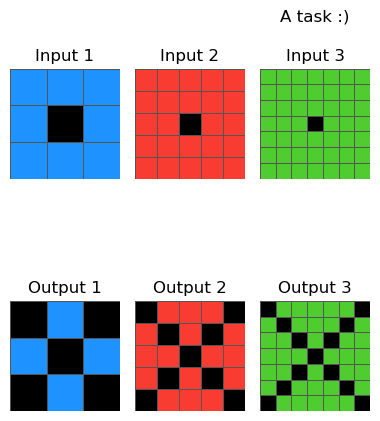

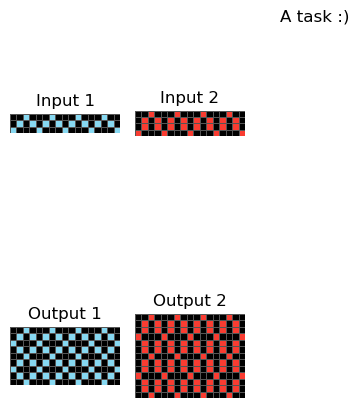

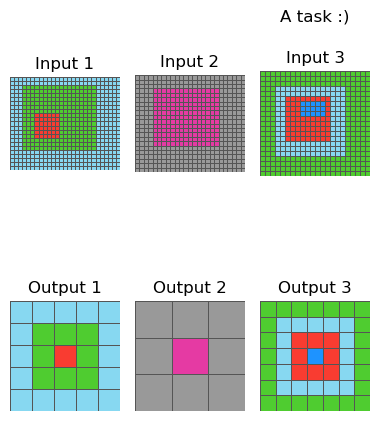

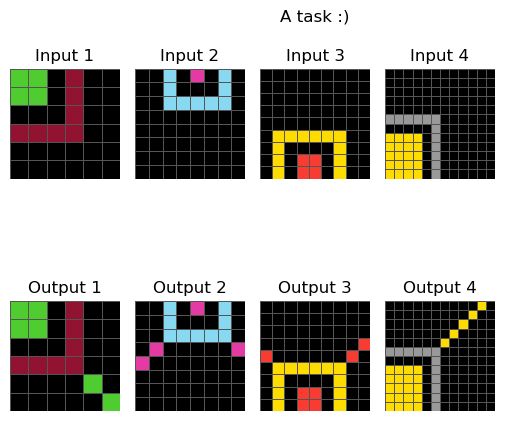

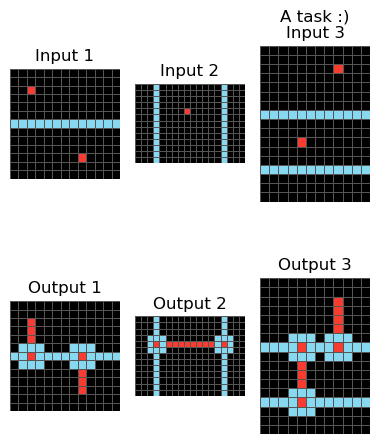

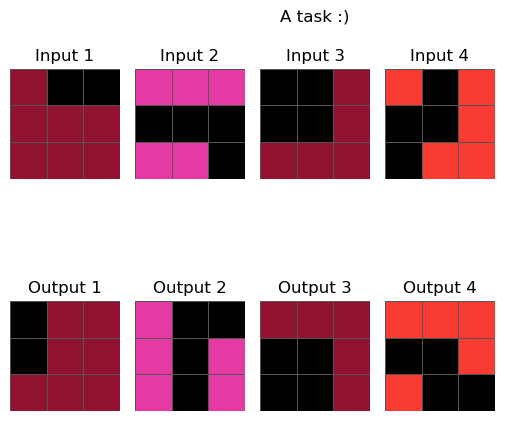

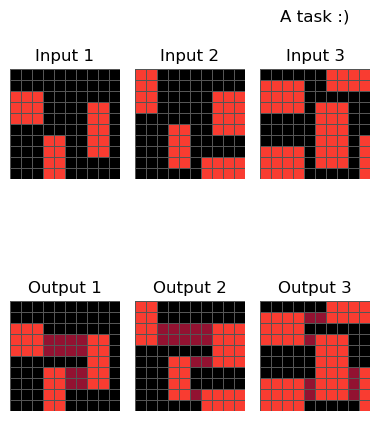

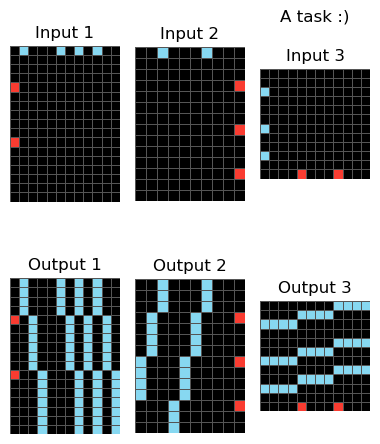

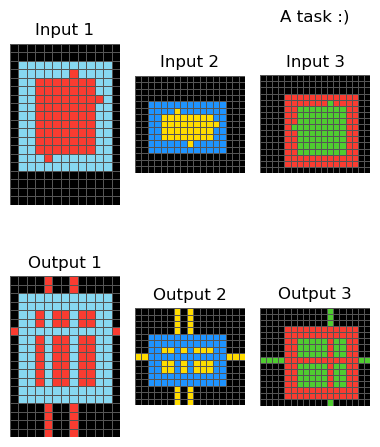

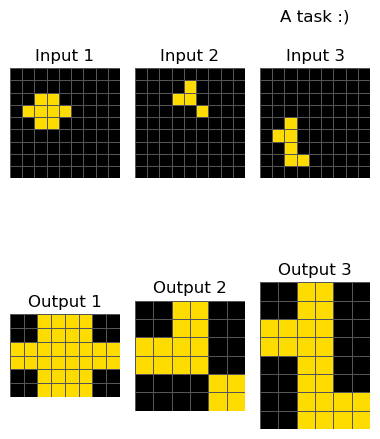

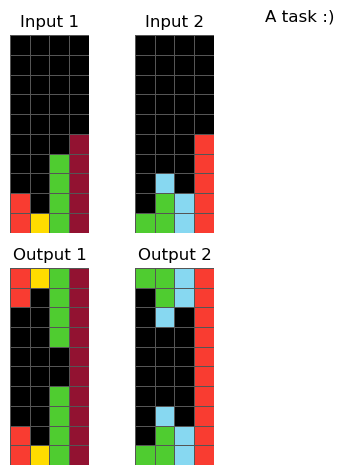

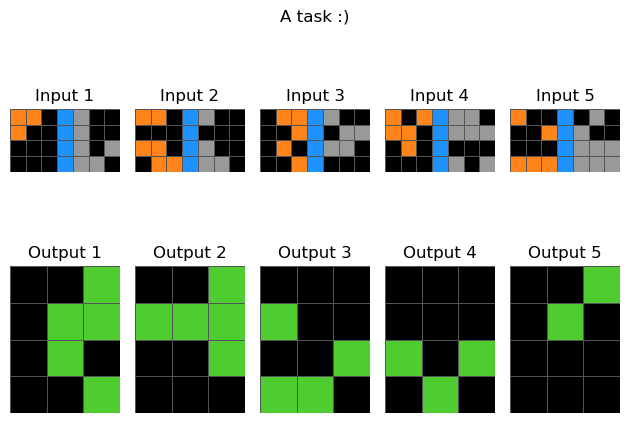

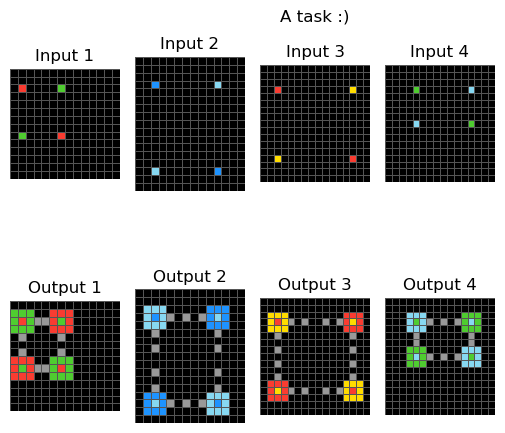

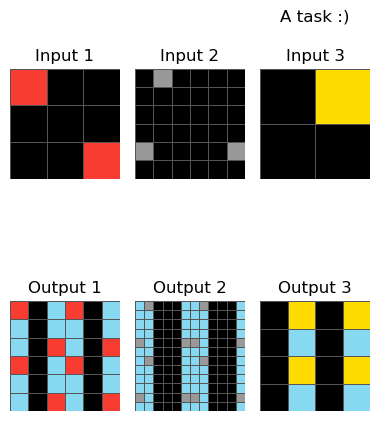

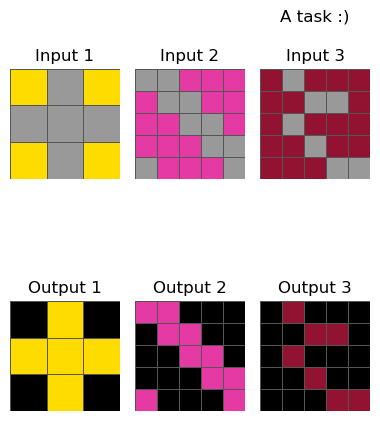

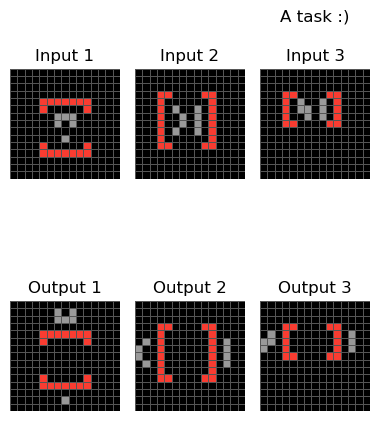

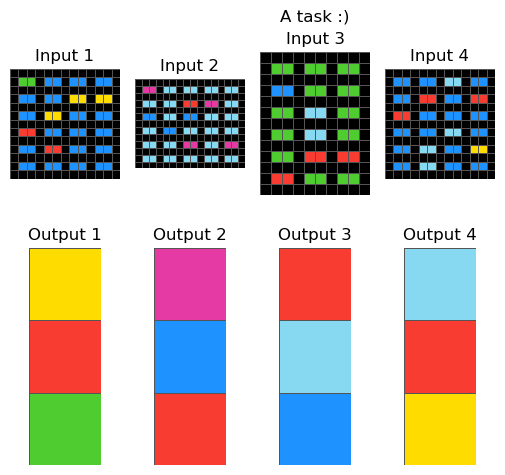

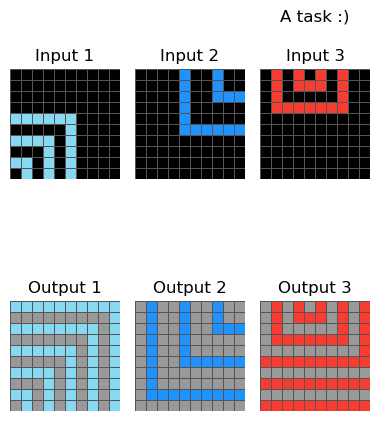

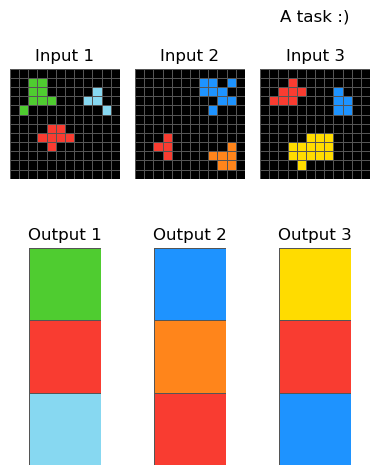

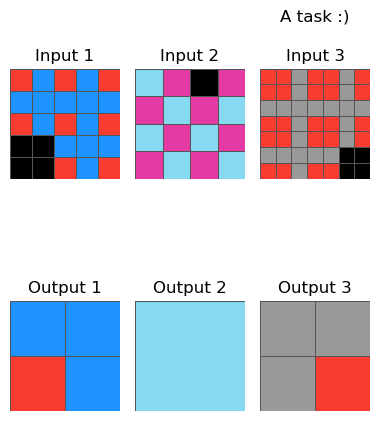

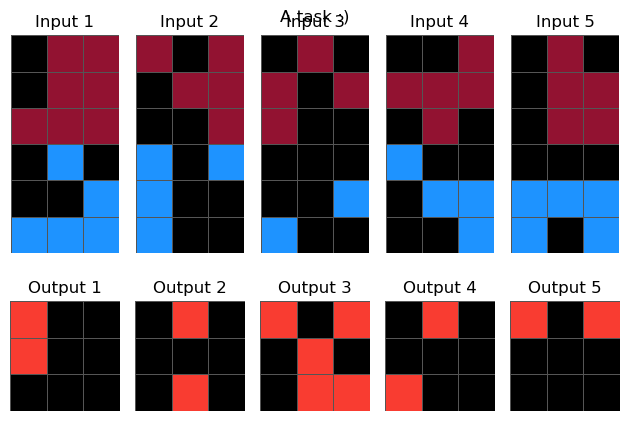

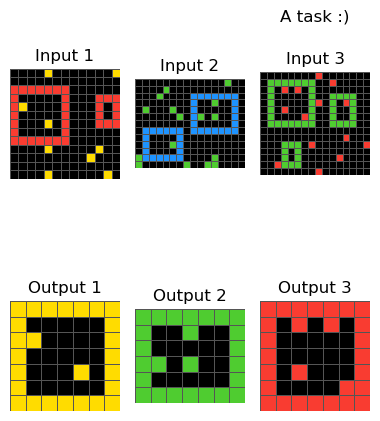

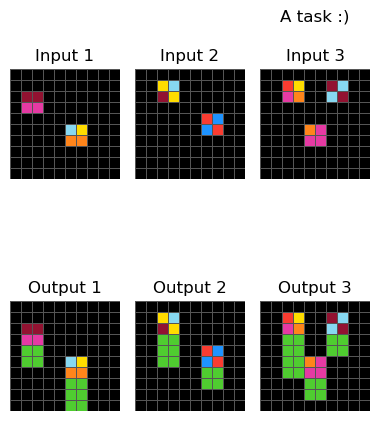

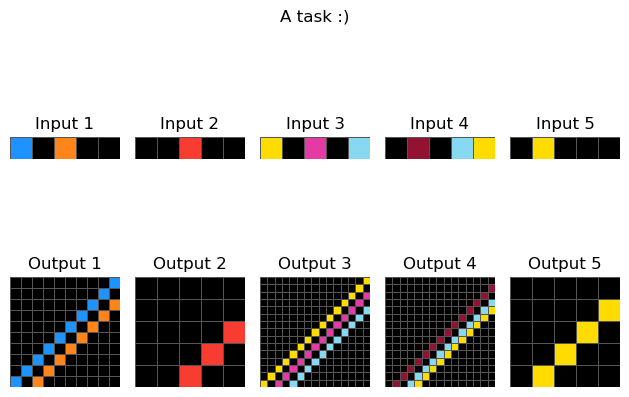

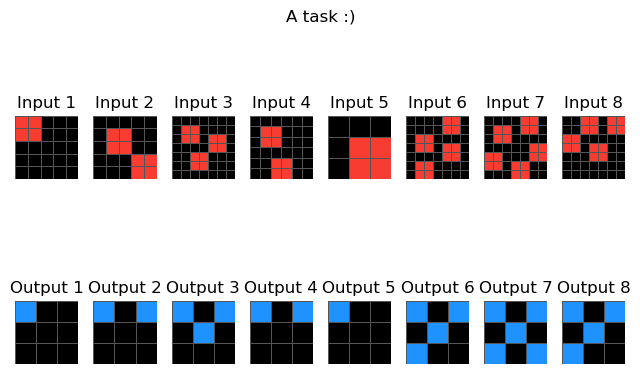

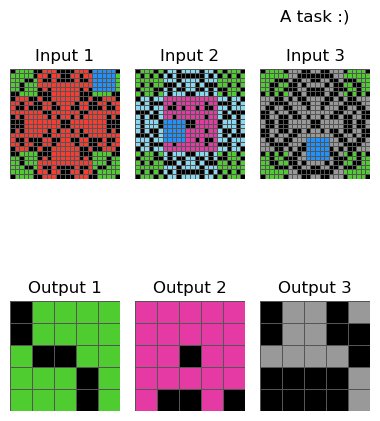

In [98]:
for key in train_challenge.keys():
    show_train_pair(train_challenge[key]['train'])

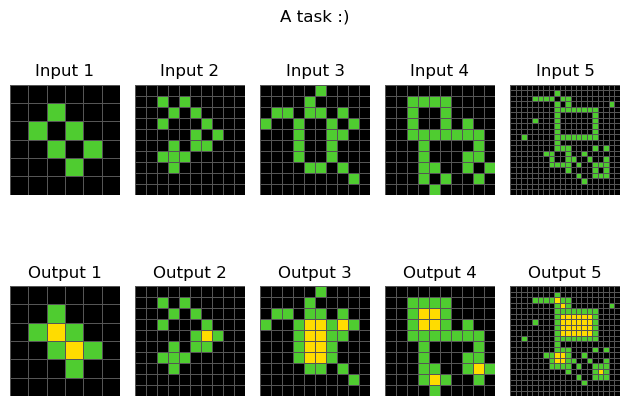

In [91]:
show_train_pair(train_challenge['00d62c1b']['train'])

In [93]:
train_challenge['00d62c1b']['train']

[{'input': [[0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0],
   [0, 3, 0, 3, 0, 0],
   [0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0]],
  'output': [[0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0],
   [0, 3, 4, 3, 0, 0],
   [0, 0, 3, 4, 3, 0],
   [0, 0, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0]]},
 {'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
   [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
   [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
  'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 0, 3, 4, 3, 0, 0],
   [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
   [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0

In [40]:
import numpy as np

def get_matrix_features(matrix):
    """
    Extracts detailed features from a matrix, including its shape, positions of each unique element, 
    and general statistics.

    Args:
    matrix (np.array): The matrix from which to extract features.

    Returns:
    dict: A dictionary containing the matrix features.
    """
    # Get all unique values in the matrix
    unique_values = np.unique(matrix)
    
    # Dictionary to store positions of each unique value
    value_positions = {value: np.argwhere(matrix == value).tolist() for value in unique_values}

    features = {
        'shape': matrix.shape,  # Shape of the matrix
        'unique_values': unique_values.tolist(),  # List of unique values in the matrix
        'value_positions': value_positions,  # Dictionary of positions for each unique value
        'non_zero_count': np.count_nonzero(matrix),  # Number of non-zero elements
        'zero_count': np.size(matrix) - np.count_nonzero(matrix),  # Number of zero elements
        'is_square': matrix.shape[0] == matrix.shape[1],  # Check if the matrix is square
        'sum': np.sum(matrix),  # Sum of all elements
        'mean': np.mean(matrix),  # Mean of all elements
        'min': np.min(matrix),  # Minimum value in the matrix
        'max': np.max(matrix),  # Maximum value in the matrix
    }

    return features

# Example usage
matrix = np.array([
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
   [0, 0, 0, 7, 7, 7, 7, 7, 7],
   [0, 0, 0, 0, 7, 7, 0, 7, 7],
   [0, 7, 7, 0, 7, 7, 0, 7, 7],
   [7, 7, 7, 7, 7, 7, 7, 7, 7],
   [0, 7, 7, 0, 7, 7, 0, 7, 7],
   [0, 0, 0, 0, 7, 7, 0, 7, 7],
   [0, 0, 0, 7, 7, 7, 7, 7, 7],
   [0, 0, 0, 0, 7, 7, 0, 7, 7]
])

# Get features of the matrix
features = get_matrix_features(matrix)
print(features)

{'shape': (9, 9), 'unique_values': [0, 7], 'value_positions': {0: [[0, 0], [0, 1], [0, 2], [0, 3], [0, 6], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2], [2, 3], [2, 6], [3, 0], [3, 3], [3, 6], [5, 0], [5, 3], [5, 6], [6, 0], [6, 1], [6, 2], [6, 3], [6, 6], [7, 0], [7, 1], [7, 2], [8, 0], [8, 1], [8, 2], [8, 3], [8, 6]], 7: [[0, 4], [0, 5], [0, 7], [0, 8], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 4], [2, 5], [2, 7], [2, 8], [3, 1], [3, 2], [3, 4], [3, 5], [3, 7], [3, 8], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [5, 1], [5, 2], [5, 4], [5, 5], [5, 7], [5, 8], [6, 4], [6, 5], [6, 7], [6, 8], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [8, 4], [8, 5], [8, 7], [8, 8]]}, 'non_zero_count': 49, 'zero_count': 32, 'is_square': True, 'sum': 343, 'mean': 4.234567901234568, 'min': 0, 'max': 7}


In [42]:
# Example usage
matrix = np.array([
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
])

# Get features of the matrix
features = get_matrix_features(matrix)
print(features)

{'shape': (3, 3), 'unique_values': [0, 7], 'value_positions': {0: [[0, 0], [2, 0]], 7: [[0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 1], [2, 2]]}, 'non_zero_count': 7, 'zero_count': 2, 'is_square': True, 'sum': 49, 'mean': 5.444444444444445, 'min': 0, 'max': 7}


In [88]:
import numpy as np

def transform_matrix(input_matrix, block_size, value_to_duplicate):
    """
    Transforms a matrix by expanding each element into a larger block within an output matrix.
    Each '0' in the input matrix is replaced by a block_size x block_size zero matrix.
    Each instance of value_to_duplicate in the input matrix is replaced by the input matrix itself.

    Args:
    input_matrix (np.array): The input matrix to be transformed.
    block_size (int): The size of each block in the output matrix.
    value_to_duplicate (int): The value in the input matrix to be duplicated.

    Returns:
    np.array: A new matrix after the transformation.
    """
    n = input_matrix.shape[0]  # Assuming input_matrix is square
    # Initialize an output matrix of appropriate size
    output_matrix = np.zeros((n * block_size, n * block_size), dtype=int)

    # Iterate over the input matrix
    for i in range(n):
        for j in range(n):
            start_row = i * block_size
            end_row = start_row + block_size
            start_col = j * block_size
            end_col = start_col + block_size
            
            # Check the value at the current position in the input matrix
            if input_matrix[i, j] == 0:
                # Place a block_size x block_size zero matrix
                output_matrix[start_row:end_row, start_col:end_col] = np.zeros((block_size, block_size), dtype=int)
            elif input_matrix[i, j] == value_to_duplicate:
                # Place the entire input matrix
                output_matrix[start_row:end_row, start_col:end_col] = input_matrix

    return output_matrix

# Example usage
input_matrix = np.array([
     [4, 0, 4], 
     [0, 0, 0], 
     [0, 4, 0]
])

block_size = 3 
value_to_duplicate = 4  

result_matrix = transform_matrix(input_matrix, block_size, value_to_duplicate)

[[4 0 4 0 0 0 4 0 4]
 [0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0]]


In [97]:
import numpy as np

def find_potential_rectangle_corners(matrix):
    """
    Identifies locations of the number 3 that could be considered as corners of rectangles or squares.
    
    Args:
    matrix (np.array): The input matrix.
    
    Returns:
    list: A list of tuples indicating the row and column indices of 3s considered as rectangle corners.
    """
    potential_corners = []
    rows, cols = matrix.shape

    # Check for every element if it is a 3 and can form a rectangle with other 3s
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] == 3:
                # Check all four possible directions to form at least a 1x1 rectangle
                # Right, Down-Right (diagonal), Down, and Down-Left (diagonal)
                # More directions can be added to cover other rectangle orientations
                directions = [(0, 1), (1, 1), (1, 0), (1, -1)]
                for di, dj in directions:
                    ni, nj = i + di, j + dj
                    # Check if the neighbor is within bounds and is also a 3
                    if 0 <= ni < rows and 0 <= nj < cols and matrix[ni, nj] == 3:
                        # Both the current position and the neighboring position can be considered corners
                        potential_corners.append((i, j))
                        potential_corners.append((ni, nj))

    # Remove duplicates by converting list of tuples to set of tuples and back to list
    potential_corners = list(set(potential_corners))

    return potential_corners

# Example usage
matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 3, 0, 3, 0, 0],
    [0, 0, 3, 0, 3, 0],
    [0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

# Find potential rectangle corners
corners = find_potential_rectangle_corners(matrix)
print("Corners of potential rectangles:", corners)


Corners of potential rectangles: [(1, 2), (2, 1), (3, 4), (4, 3), (2, 3), (3, 2)]


In [96]:
[[0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0],
   [0, 3, 0, 3, 0, 0],
   [0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]